# Imports and data 

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import datetime as dt
import os
import matplotlib.pyplot as plt
import phonecalls as pc
import scipy.stats as stats
import scipy.interpolate as interpol
import statsmodels.api as sm
import time
import copy
import math
import pickle


plt.rcParams['figure.figsize'] = (20, 10)
markers = ['o', 'v', 's', 'P', '*', 'X', 'd', 'x', 'D', '2', '+']
colors = ['#348ABD', '#A60628', '#7A68A6', '#467821', '#D55E00', '#CC79A7', '#56B4E9', '#009E73', '#F0E442', '#0072B2']

with open('unfiltered.pkl', 'rb') as handle:
    unfiltered = pickle.load(handle)
handle.close()

with open('../itdata/mtl_dffa15.pickle', 'rb') as handle:
    itdffa15 = pickle.load(handle)
    handle.close()
    
with open('../itdata/mtl_dffa30.pickle', 'rb') as handle:
    itdffa30 = pickle.load(handle)
    handle.close()
    
with open('../itdata/mtl_livesd.pickle', 'rb') as handle:
    itlives = pickle.load(handle)
    handle.close()
    
calls = {}
for c in ['uk', 'uk2', 'mit']:
    calls[c] = pc.apply_filters(unfiltered[c], 60)

globalt0 = dt.datetime.now()

# New Fig 1

In [2]:
# limits = {}
# limits['uk'] = [(0, 60), (100, 160), (220, 280)]
# limits['uk2'] = [(0, 60), (100, 160), (220, 280)]
# limits['it'] = [(0, 100), (150, 250), (250, 350)]
# limits['mit'] = [(0, 50), (100, 150), (200, 250)]

In [74]:
limits = {}
limits['uk'] = [(0, 50), (80, 130), (220, 270)]
limits['uk2'] = [(0, 50), (100, 150), (220, 270)]
limits['it'] = [(0, 50), (210, 260), (320, 370)]
limits['mit'] = [(0, 50), (100, 150), (210, 260)]

In [4]:
fig1 = {}
for c in ['uk', 'uk2', 'mit']:
    fig1[c] = {}
    for i in range(3):
        fig1[c][i] = pc.get_fal(calls[c], limits[c][i][0], limits[c][i][1], 15)

In [5]:
t0 = dt.datetime.now()

fig1['it'] = {}
for i in range(3):
    fig1['it'][i] = {}
    fig1['it'][i]['f'] = pc.get_avgfa(itdffa15[60], itlives[60], limits['it'][i][0], limits['it'][i][1])
    fig1['it'][i]['fi'] = {}
    for ego in itdffa15[60].keys():
        tmp = {ego: itdffa15[60][ego]}
        fig1['it'][i]['fi'][ego] = pc.get_avgfa(tmp, itlives[60], limits['it'][i][0], limits['it'][i][1])
        
print(f'Took {dt.datetime.now() - t0}')

Took 0:00:00.383661


In [7]:
dashed = {}
for c in ['uk', 'uk2', 'it', 'mit']:
    dashed[c] = {}
    print(f'======================={c}=====================')
    for lamb in fig1[c].keys():
        if lamb > 0:
            points = pc.get_plateau(fig1[c][lamb]['f'], pstar=0.01)
#             points = get_b_slopes(fig1[c][lamb]['f'])
            dashed[c][lamb] = [[x[0] for x in points], [y[1] for y in points]]
#             dashed[c][lamb] = points
            print(f'\draw[dashed, {["charmander", "squirtle", "ekans"][lamb]}, ultra thick] (axis cs: {points[0][0]}, {points[1][0]}) -- (axis cs: {points[0][1]}, {points[1][1]});')

=======================uk=====================
\draw[dashed, squirtle, ultra thick] (axis cs: 2, 6) -- (axis cs: 1.462291237644662, 1.462291237644662);
\draw[dashed, ekans, ultra thick] (axis cs: 1, 17) -- (axis cs: 2.0219047095078384, 2.0219047095078384);
=======================uk2=====================
\draw[dashed, squirtle, ultra thick] (axis cs: 2, 8) -- (axis cs: 1.5882631855789955, 1.5882631855789955);
\draw[dashed, ekans, ultra thick] (axis cs: 2, 15) -- (axis cs: 2.498256164374309, 2.498256164374309);
=======================it=====================
\draw[dashed, squirtle, ultra thick] (axis cs: 2, 15) -- (axis cs: 0.9046407051746576, 0.9046407051746576);
\draw[dashed, ekans, ultra thick] (axis cs: 1, 23) -- (axis cs: 2.433893940451833, 2.433893940451833);
=======================mit=====================
\draw[dashed, squirtle, ultra thick] (axis cs: 3, 7) -- (axis cs: 1.990001693503304, 1.990001693503304);
\draw[dashed, ekans, ultra thick] (axis cs: 2, 15) -- (axis cs: 4.16624883

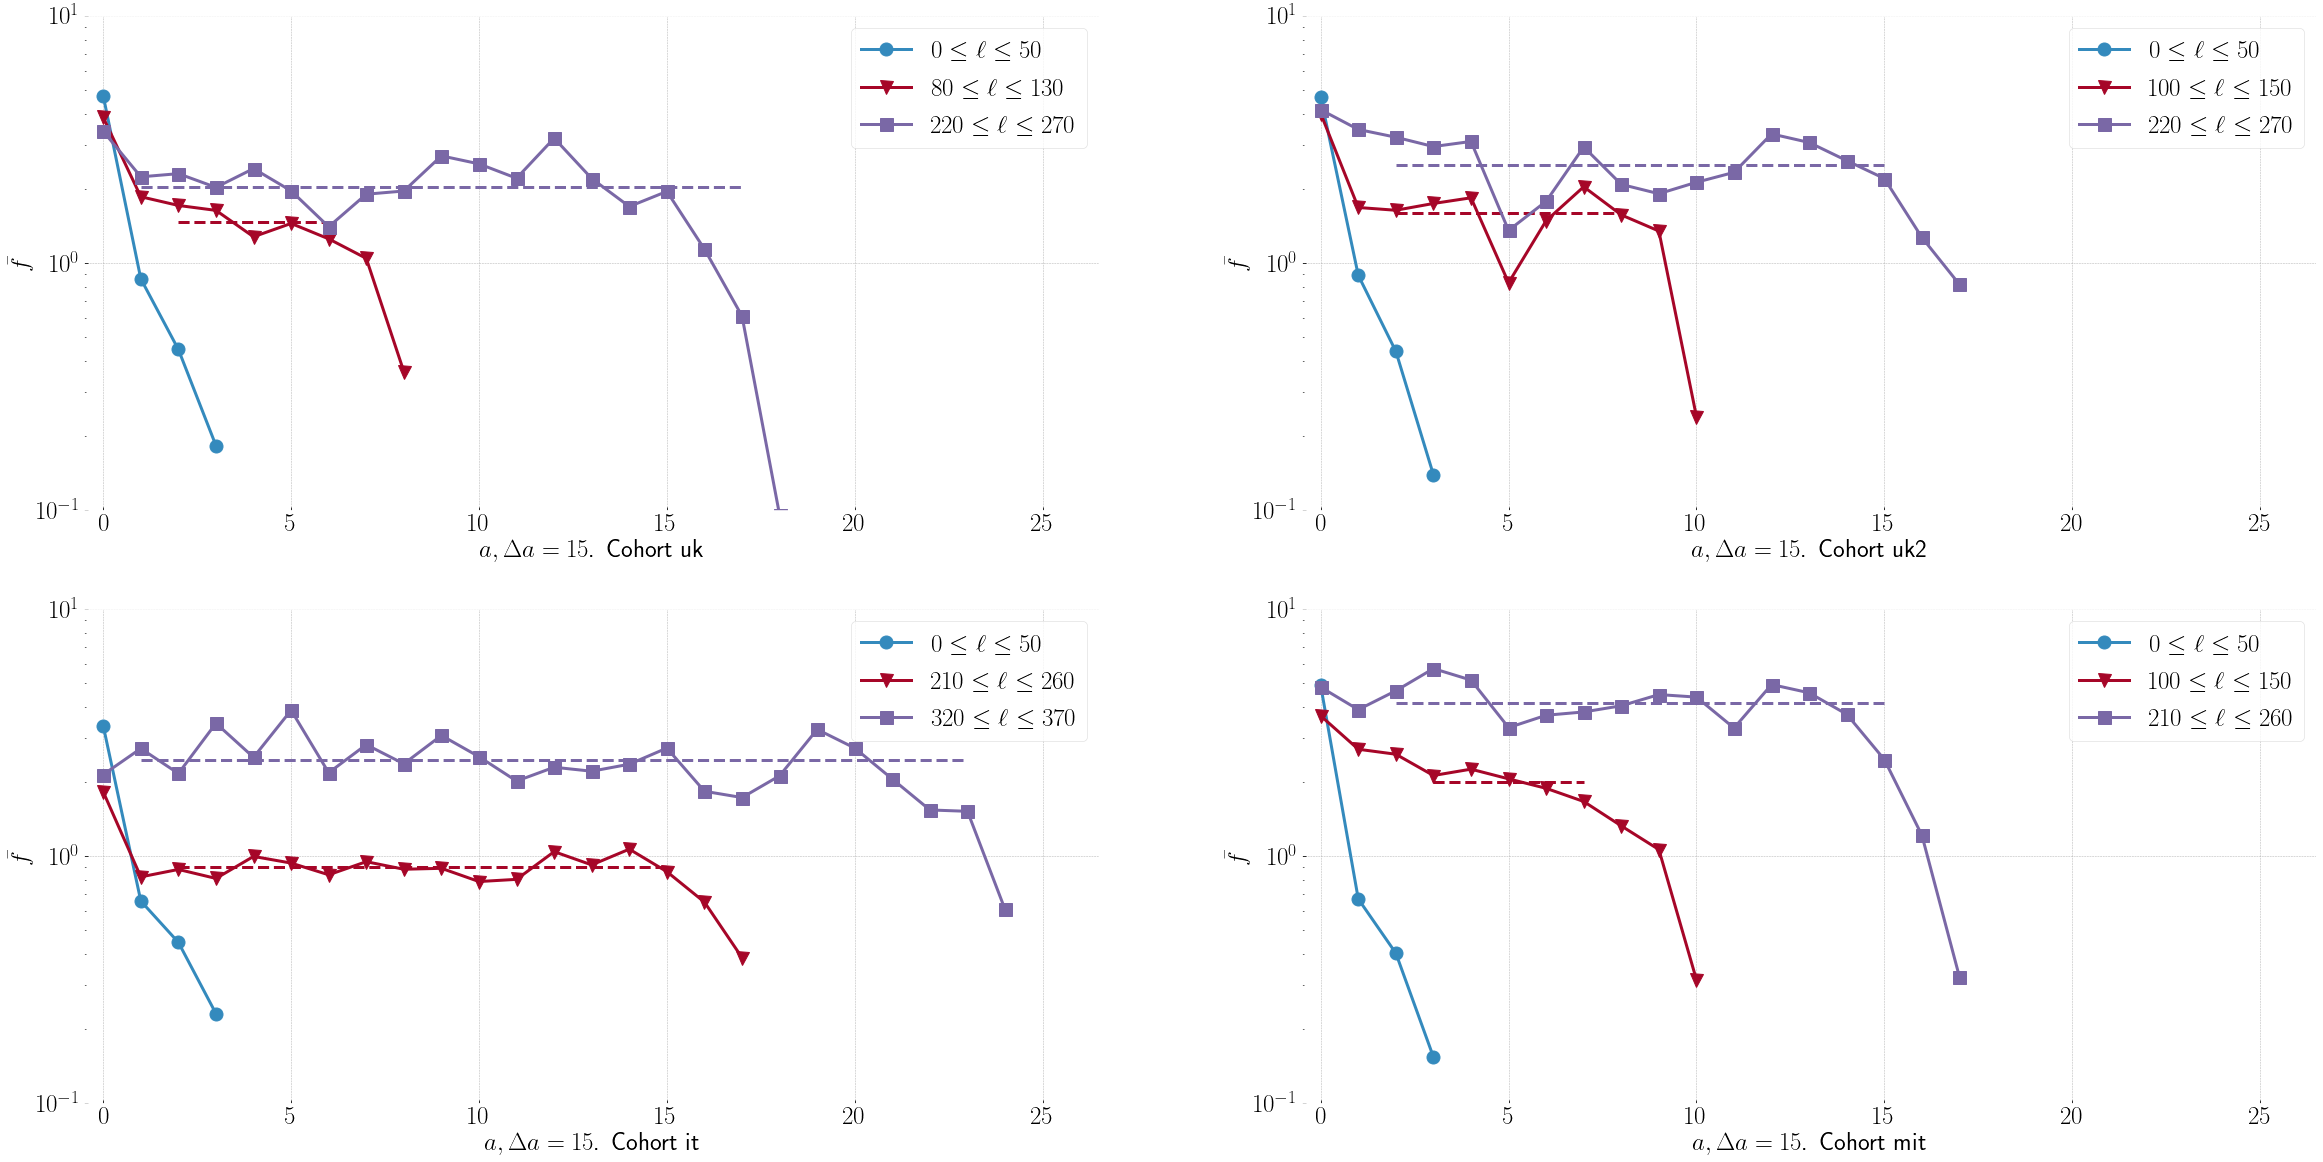

In [8]:
plt.figure(figsize=(20*2, 10*2))
p = 1
for c in ['uk', 'uk2', 'it', 'mit']:
    plt.subplot(2, 2, p)
    plt.ylim(10**(-1), 10**1)
    plt.semilogy()
    plt.xlim(-0.5, 26.5)
    plt.xlabel(fr'$a, \Delta a  = 15$. Cohort {c}')
    plt.ylabel(r'$\bar{f}$')
    for i in range(3):
        plt.plot(fig1[c][i]['f'].index, fig1[c][i]['f']['f'], marker=markers[i], ls="solid", lw=3, markersize=13, c=colors[i], label=fr'${limits[c][i][0]}\leq \ell \leq {limits[c][i][1]}$')
        if i > 0:
            plt.plot(dashed[c][i][0], dashed[c][i][1], marker="", ls="--", lw=3, c=colors[i])
    plt.legend()
    p += 1
# plt.savefig("/home/vsvh/Desktop/B.png", dpi=200, pad_inches=2)

In [9]:
# for c in fig1.keys():
#     tmp = pd.DataFrame()
#     for l in fig1[c].keys():
#         df = fig1[c][l]['f']
#         df.columns = [f'l{int(l)}']
#         if len(tmp) == 0:
#             tmp = tmp.append(df)
#         else:
#             tmp = tmp.merge(df, left_index=True, right_index=True, how='outer')
#     tmp.index.rename('a', inplace=True)
#     tmp.fillna('nan', inplace=True)
#     #tmp = tmp.loc[tmp.index < 13]
#     tmp.to_csv(f"../commpatterns/PNAS_paper/figs/fig1_{c}.dat", header=True, sep="\t")

## Fig 1b

30 egos randomly chosen

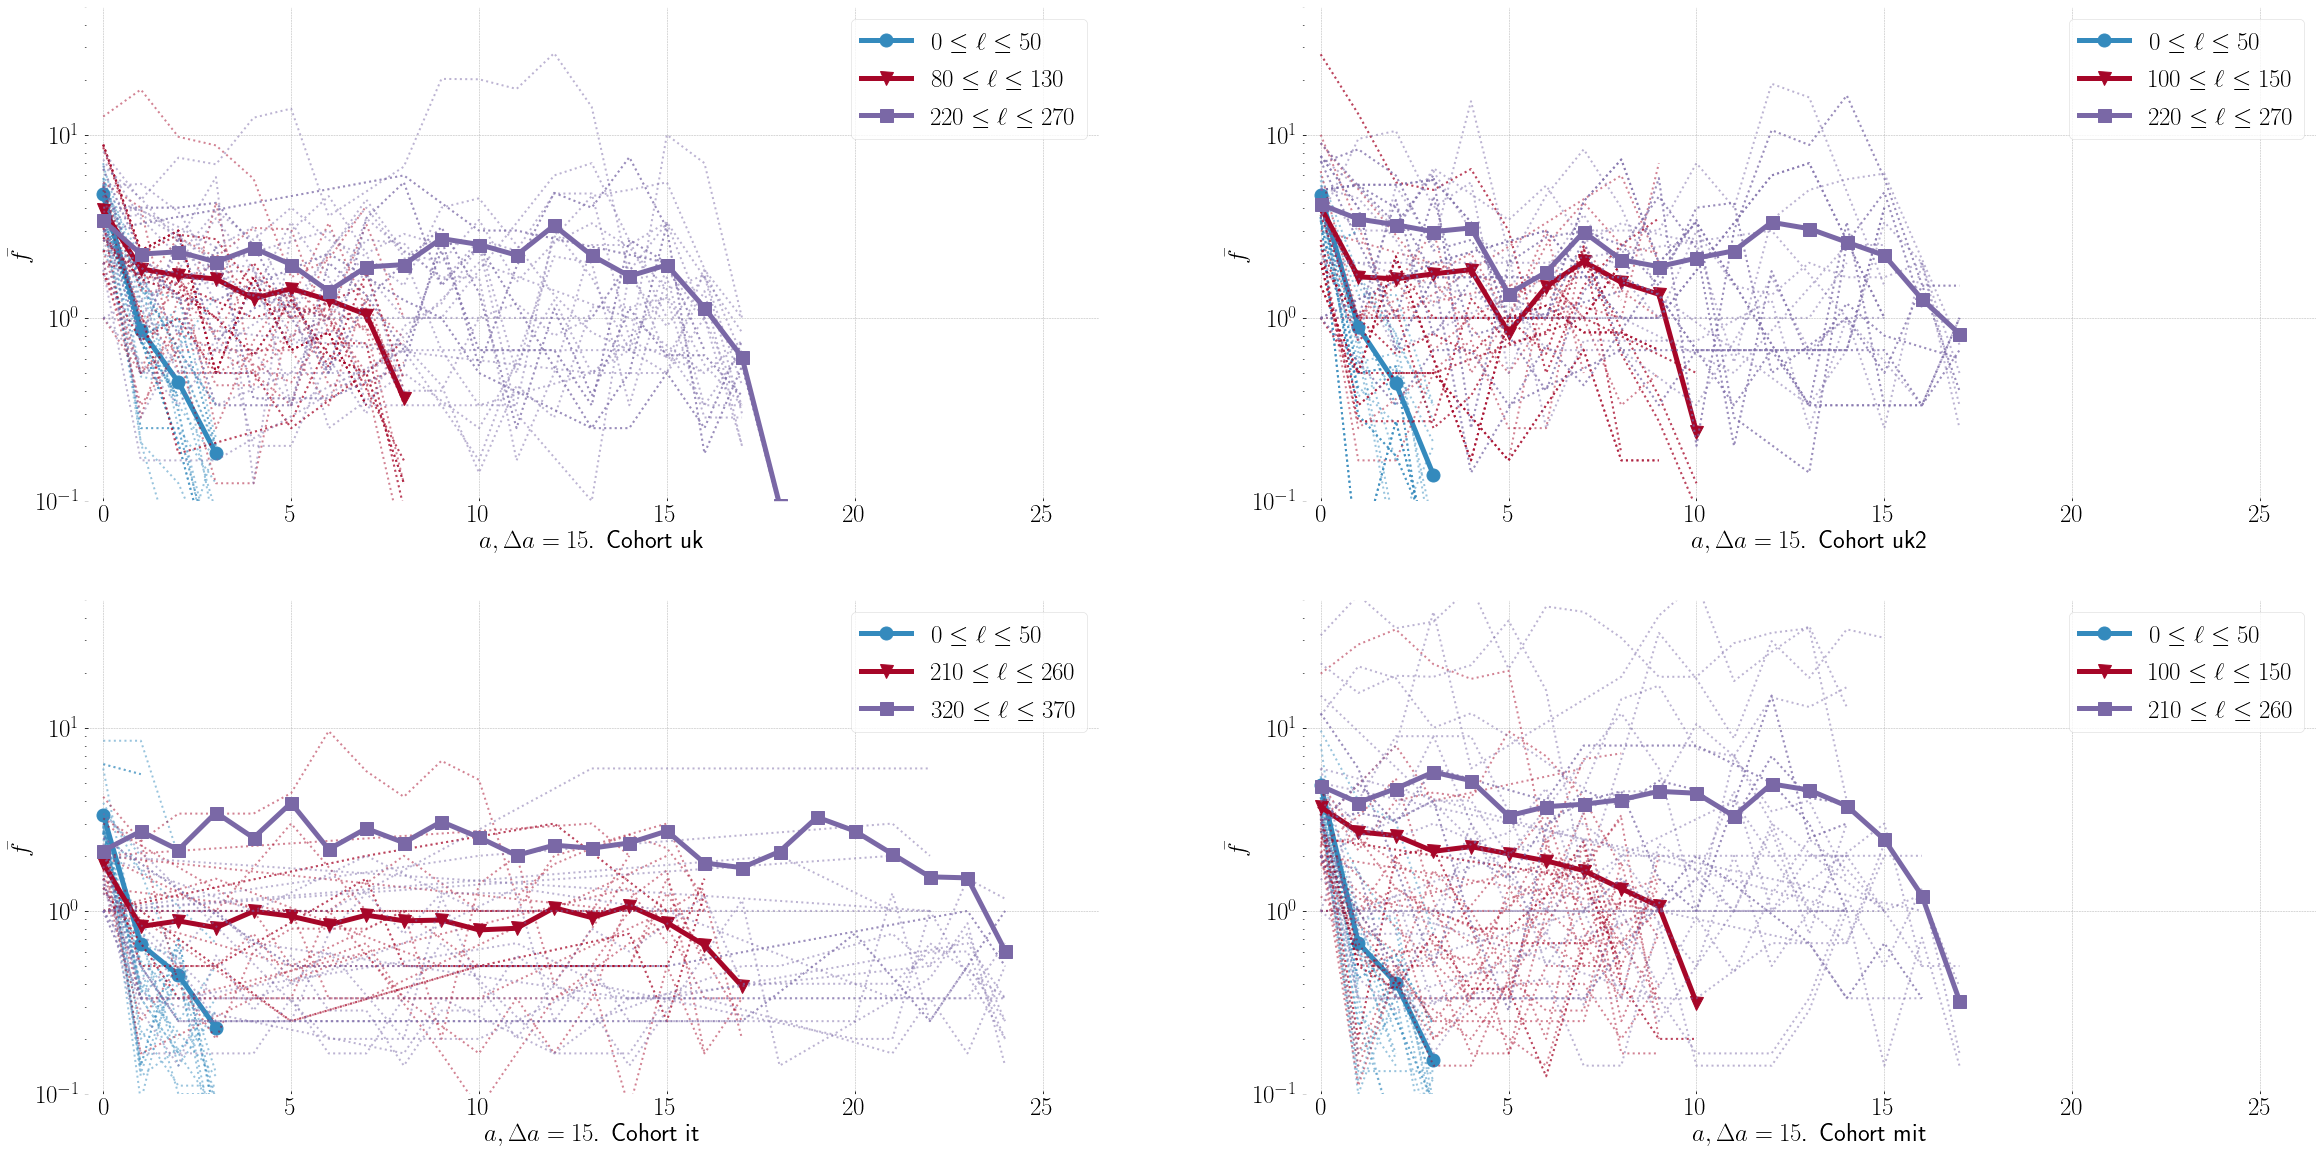

In [10]:
np.random.seed(0)
plt.figure(figsize=(20*2, 10*2))
p = 1
for c in ['uk', 'uk2', 'it', 'mit']:
    plt.subplot(2, 2, p)
    plt.ylim(10**(-1), 5*10**1)
    plt.semilogy()
    plt.xlim(-0.5, 26.5)
    plt.xlabel(fr'$a, \Delta a  = 15$. Cohort {c}')
    plt.ylabel(r'$\bar{f}$')
    for i in range(3):
        plt.plot(fig1[c][i]['f'].index, fig1[c][i]['f']['f'], marker=markers[i], ls="solid", lw=5, markersize=13, c=colors[i], label=fr'${limits[c][i][0]}\leq \ell \leq {limits[c][i][1]}$')
        egos = np.random.choice(list(fig1[c][i]['fi'].keys()), size=30)
        for e in egos:
            plt.plot(fig1[c][i]['fi'][e].index, fig1[c][i]['fi'][e]['f'], marker="", ls="dotted", lw=2, c=colors[i], alpha=0.5)
    plt.legend()
    p += 1
# plt.savefig("/home/vsvh/Desktop/A.png", dpi=200, pad_inches=2)

# Fig 3 (survival curves)

In [11]:
dff = {}
dff['all'] = {}
for c in calls.keys():
    dff[c] = pc.get_f(calls[c], 'all', 30, 10)
    dff['all'].update(dff[c])
    
dff['it'] = itdffa30[60]
dff['all'].update(dff['it'])

In [12]:
survival = {}
for c in dff.keys():
    survival[c] = pc.get_survival(dff[c], lambdamax=25)

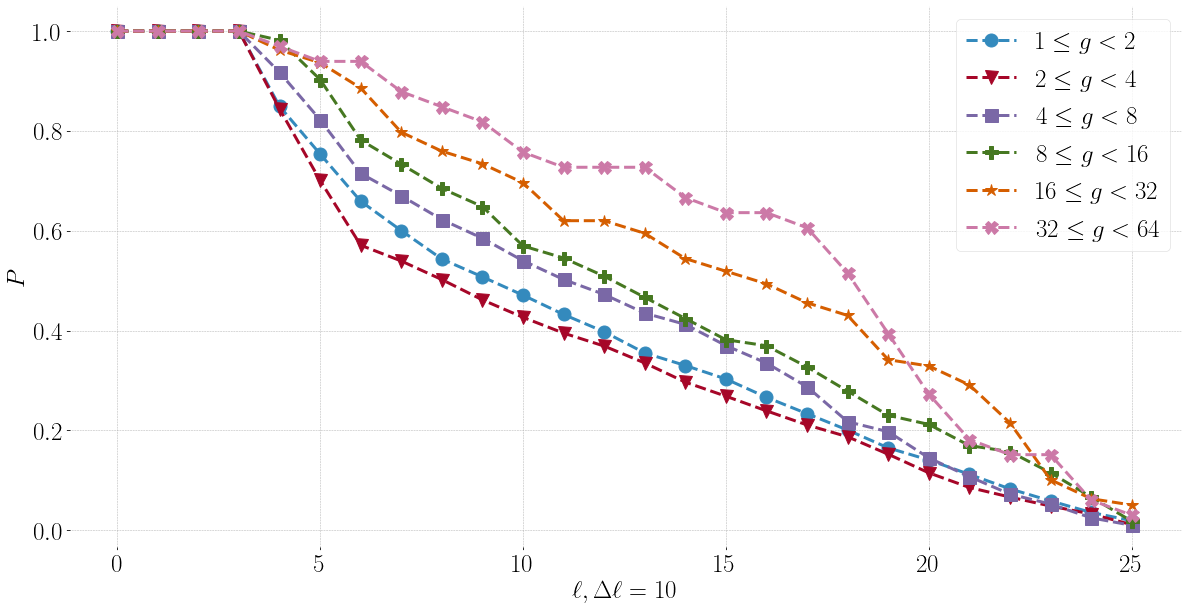

In [13]:
plt.xlabel(r'$\ell, \Delta \ell = 10$')
plt.ylabel(r'$P$')
for i in range(6):
    plt.plot(survival['all'][i].index, survival['all'][i][0], marker=markers[i], markersize=13, ls="dashed", lw=3, label=fr'${2**i} \leq g < {2**(i + 1)}$')
plt.legend()

In [14]:
# tmp = pd.DataFrame({'lc': list(survival['all'][0].index)})
# for s in range(6):
#     df = survival['all'][s]
#     tmp[f'p{int(s)}'] = df[0]
# tmp.to_csv(f'../commpatterns/PNAS_paper/figs/allsurvival.dat', header=True, index=False, sep="\t")

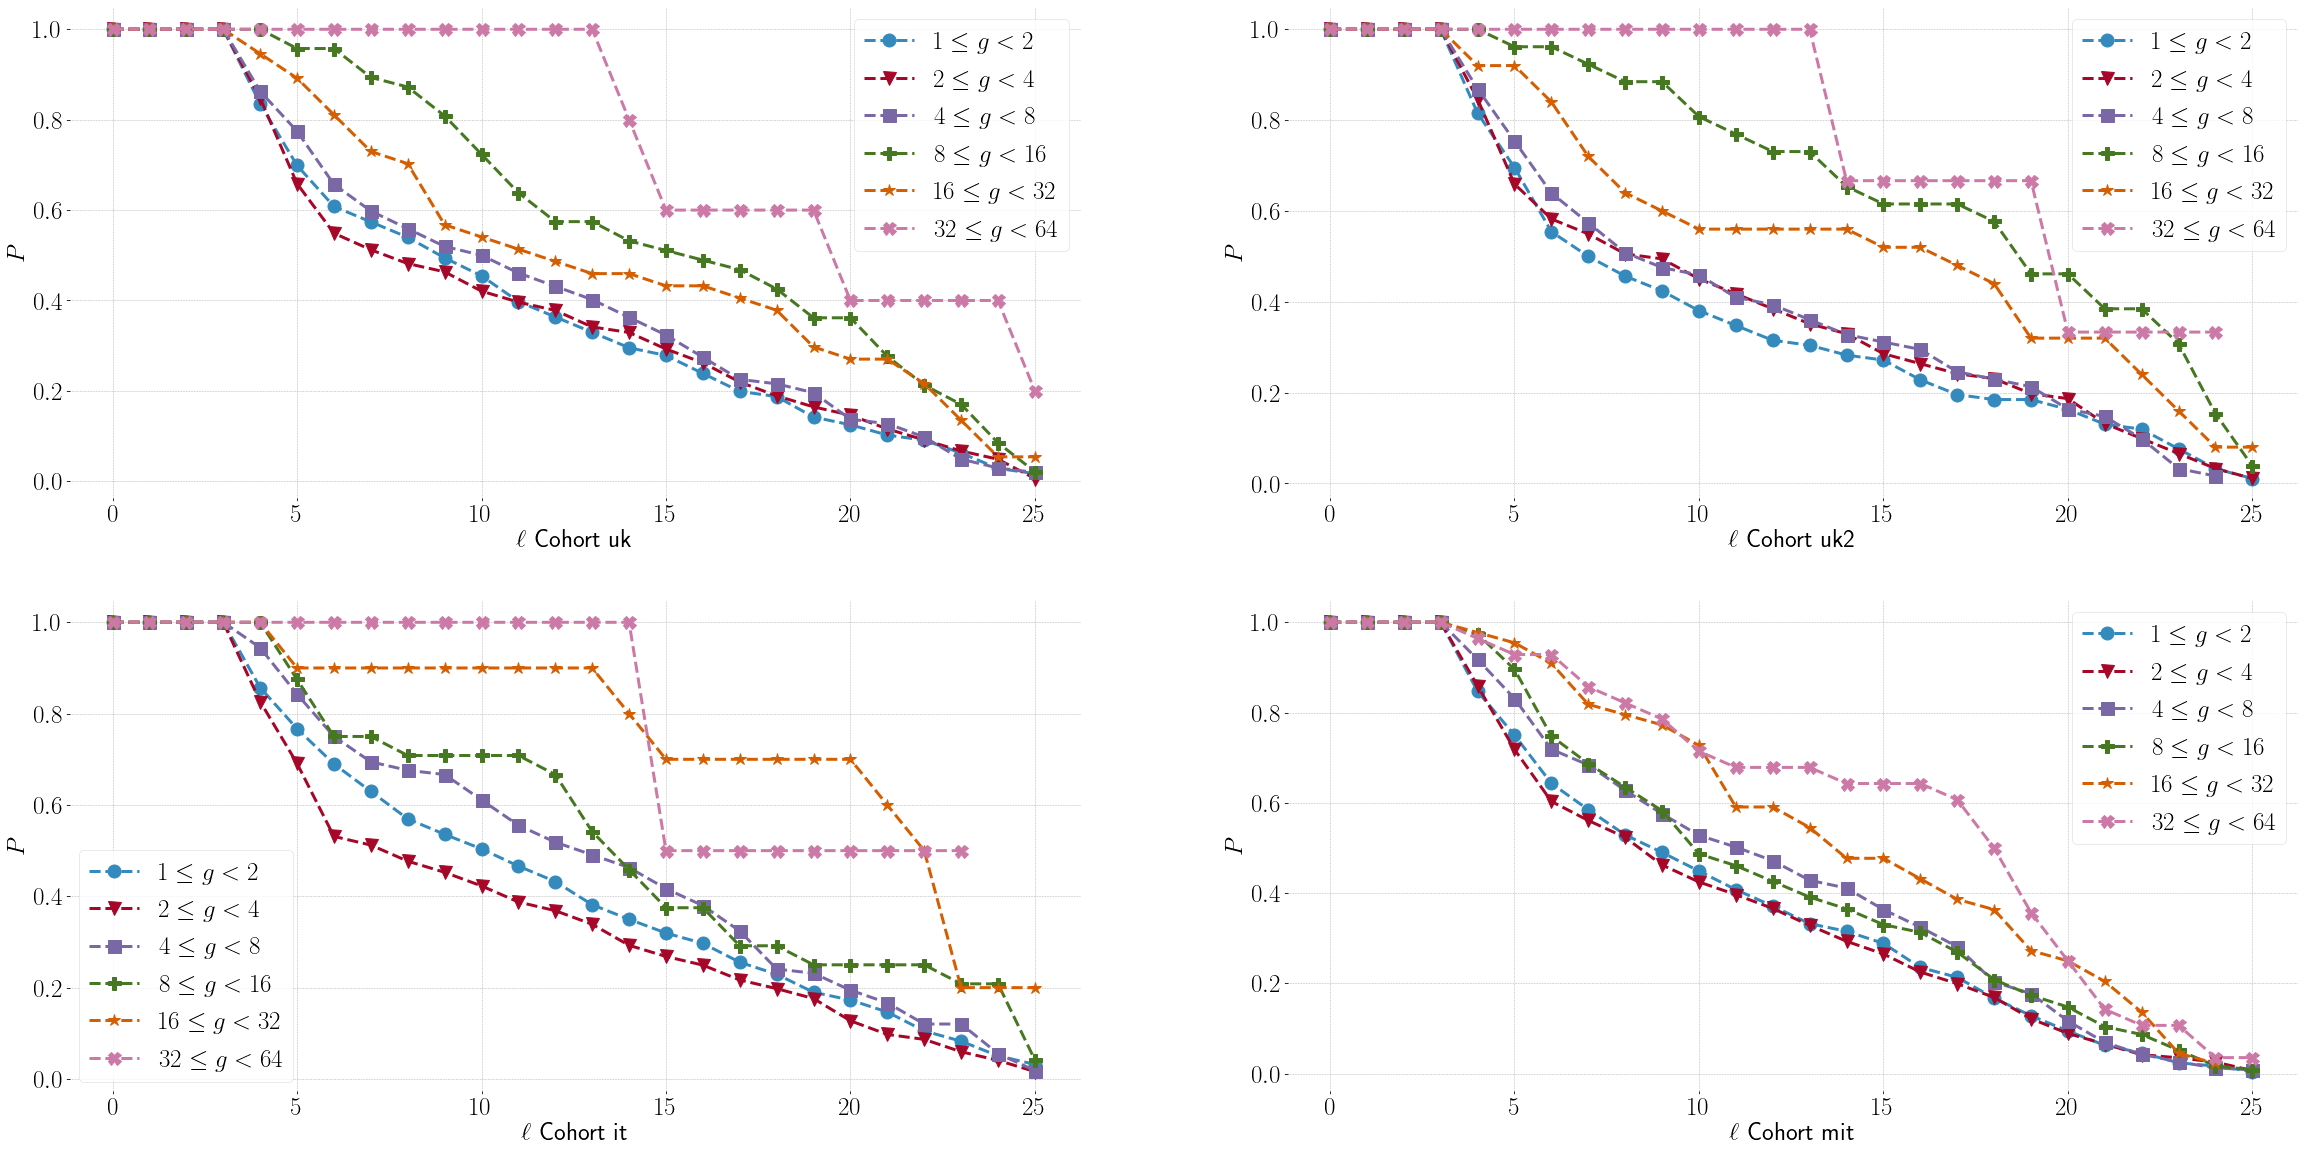

In [15]:
plt.figure(figsize=(20*2, 10*2))
p = 1
for c in ['uk', 'uk2', 'it', 'mit']:
    plt.subplot(2,2,p)
    plt.xlabel(fr"$\ell$ Cohort {c}")
    plt.ylabel(r"$P$")
    for i in range(6):
        plt.plot(survival[c][i].index, survival[c][i][0], marker=markers[i], markersize=13, ls="dashed", lw=3, label=fr'${2**i} \leq g < {2**(i + 1)}$')
    plt.legend()
    p += 1
#plt.savefig("/home/vsvh/Desktop/C.png", dpi=200, pad_inches=2)

# Fig 4 (contours) 

In [16]:
dffUM = {}
for c in ['uk', 'mit']:
    dffUM.update(dff[c])
    
surv_cont = pc.get_survival(dffUM, lambdamax = 25)

In [17]:
tmp = pd.DataFrame()
for s in range(6):
    df = surv_cont[s].reset_index()
    df.columns = ['lc', 'p']
    df['lc'] *= 10
    df['f'] = 2**s
    ttmmpp = pd.DataFrame({'x': df['f'], 'y': df['lc'], 'z': df['p']})
    tmp = tmp.append(ttmmpp).reset_index(drop=True)
tmp.to_csv(f"../commpatterns/PNAS_paper/figs/contour.dat", header=False, index=False, sep="\t")

In [18]:
points_it = pc.get_survival(dff['it'], unbinned=True, lambdamax=25)

tmp = pd.DataFrame()
for s in points_it.keys():
    if s <= 2**5 + 1:
        df = points_it[s].reset_index()
        df.columns = ['lc', 'p']
        df['lc'] *= 10
        df['f'] = s
        ttmmpp = pd.DataFrame({'x': df['f'], 'y': df['lc'], 'z': df['p']})
        tmp = tmp.append(ttmmpp).reset_index(drop=True)
sub = [(i/4, (i + 1)/4) for i in range(4)]
p = 0
for s in sub:
    df = tmp.loc[(tmp['z'] > s[0]) & (tmp['z'] <= s[1])]
    df = df.drop(columns='z')
    df.to_csv(f'../commpatterns/PNAS_paper/figs/points{p}.dat', header=False, index=False, sep="\t")
    print(s)
    p += 1

(0.0, 0.25)
(0.25, 0.5)
(0.5, 0.75)
(0.75, 1.0)


<center><img src="contours.png" style="width: 50%"/></center>

# Check for ecological fallacy

In [80]:
a = {}
a[15] = {}
a[15][1] = (1, 5, 9)
a[15][2] = (2, 8, 14)
a[10] = {}
a[10][1] = (1, 7, 13)
a[10][2] = (2, 12, 22)
a[7] = {}
a[7][1] = (1, 10, 19)
a[7][2] = (2, 17, 32)
a[5] = {}
a[5][1] = (2, 15, 28)
a[5][2] = (2, 23, 44)
a[3] = {}
a[3][1] = (4, 25, 46)
a[3][2] = (2, 40, 78)

In [81]:
for c in ['uk', 'uk2', 'mit']:
    print(limits[c][1], limits[c][2])

(80, 130) (220, 270)
(100, 150) (220, 270)
(100, 150) (210, 260)


In [104]:
aaa = sorted(list(fig1['it'][1]['f'].index))
aaa = aaa[1:-1]
aaa

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [109]:
ksp = {}
for c in ['uk', 'uk2', 'mit']:
    ksp[c] = {}
    for Da in a.keys():
        ksp[c][Da] = {}
        series = pc.get_fal(calls[c], limits[c][1][0], limits[c][1][1], Da)
        for ego in series['fi'].keys():
            df = series['fi'][ego]
            idx = sorted(list(df.index))[1:-1]
            if len(idx) > 0:
                mid = len(idx) // 2
                lims = ((idx[0], idx[mid]), (idx[mid], idx[-1]))
                left = df.loc[(df.index >= lims[0][0]) & (df.index <= lims[0][1])]
                right = df.loc[(df.index >= lims[1][0]) & (df.index <= lims[1][1])]
                if (len(left) >= 1) and (len(right) >= 1):
                    ksp[c][Da]['m'] = ksp[c][Da].get('m', [])
                    ksp[c][Da]['m'].append(stats.ks_2samp(left['f'], right['f'])[1])
        series = pc.get_fal(calls[c], limits[c][2][0], limits[c][2][1], Da)
        for ego in series['fi'].keys():
            df = series['fi'][ego]
            idx = sorted(list(df.index))[1:-1]
            if len(idx) > 0:
                mid = len(idx) // 2
                lims = ((idx[0], idx[mid]), (idx[mid], idx[-1]))
                left = df.loc[(df.index >= lims[0][0]) & (df.index <= lims[0][1])]
                right = df.loc[(df.index >= lims[1][0]) & (df.index <= lims[1][1])]
                if (len(left) >= 1) and (len(right) >= 1):
                    ksp[c][Da]['l'] = ksp[c][Da].get('l', [])
                    ksp[c][Da]['l'].append(stats.ks_2samp(left['f'], right['f'])[1])

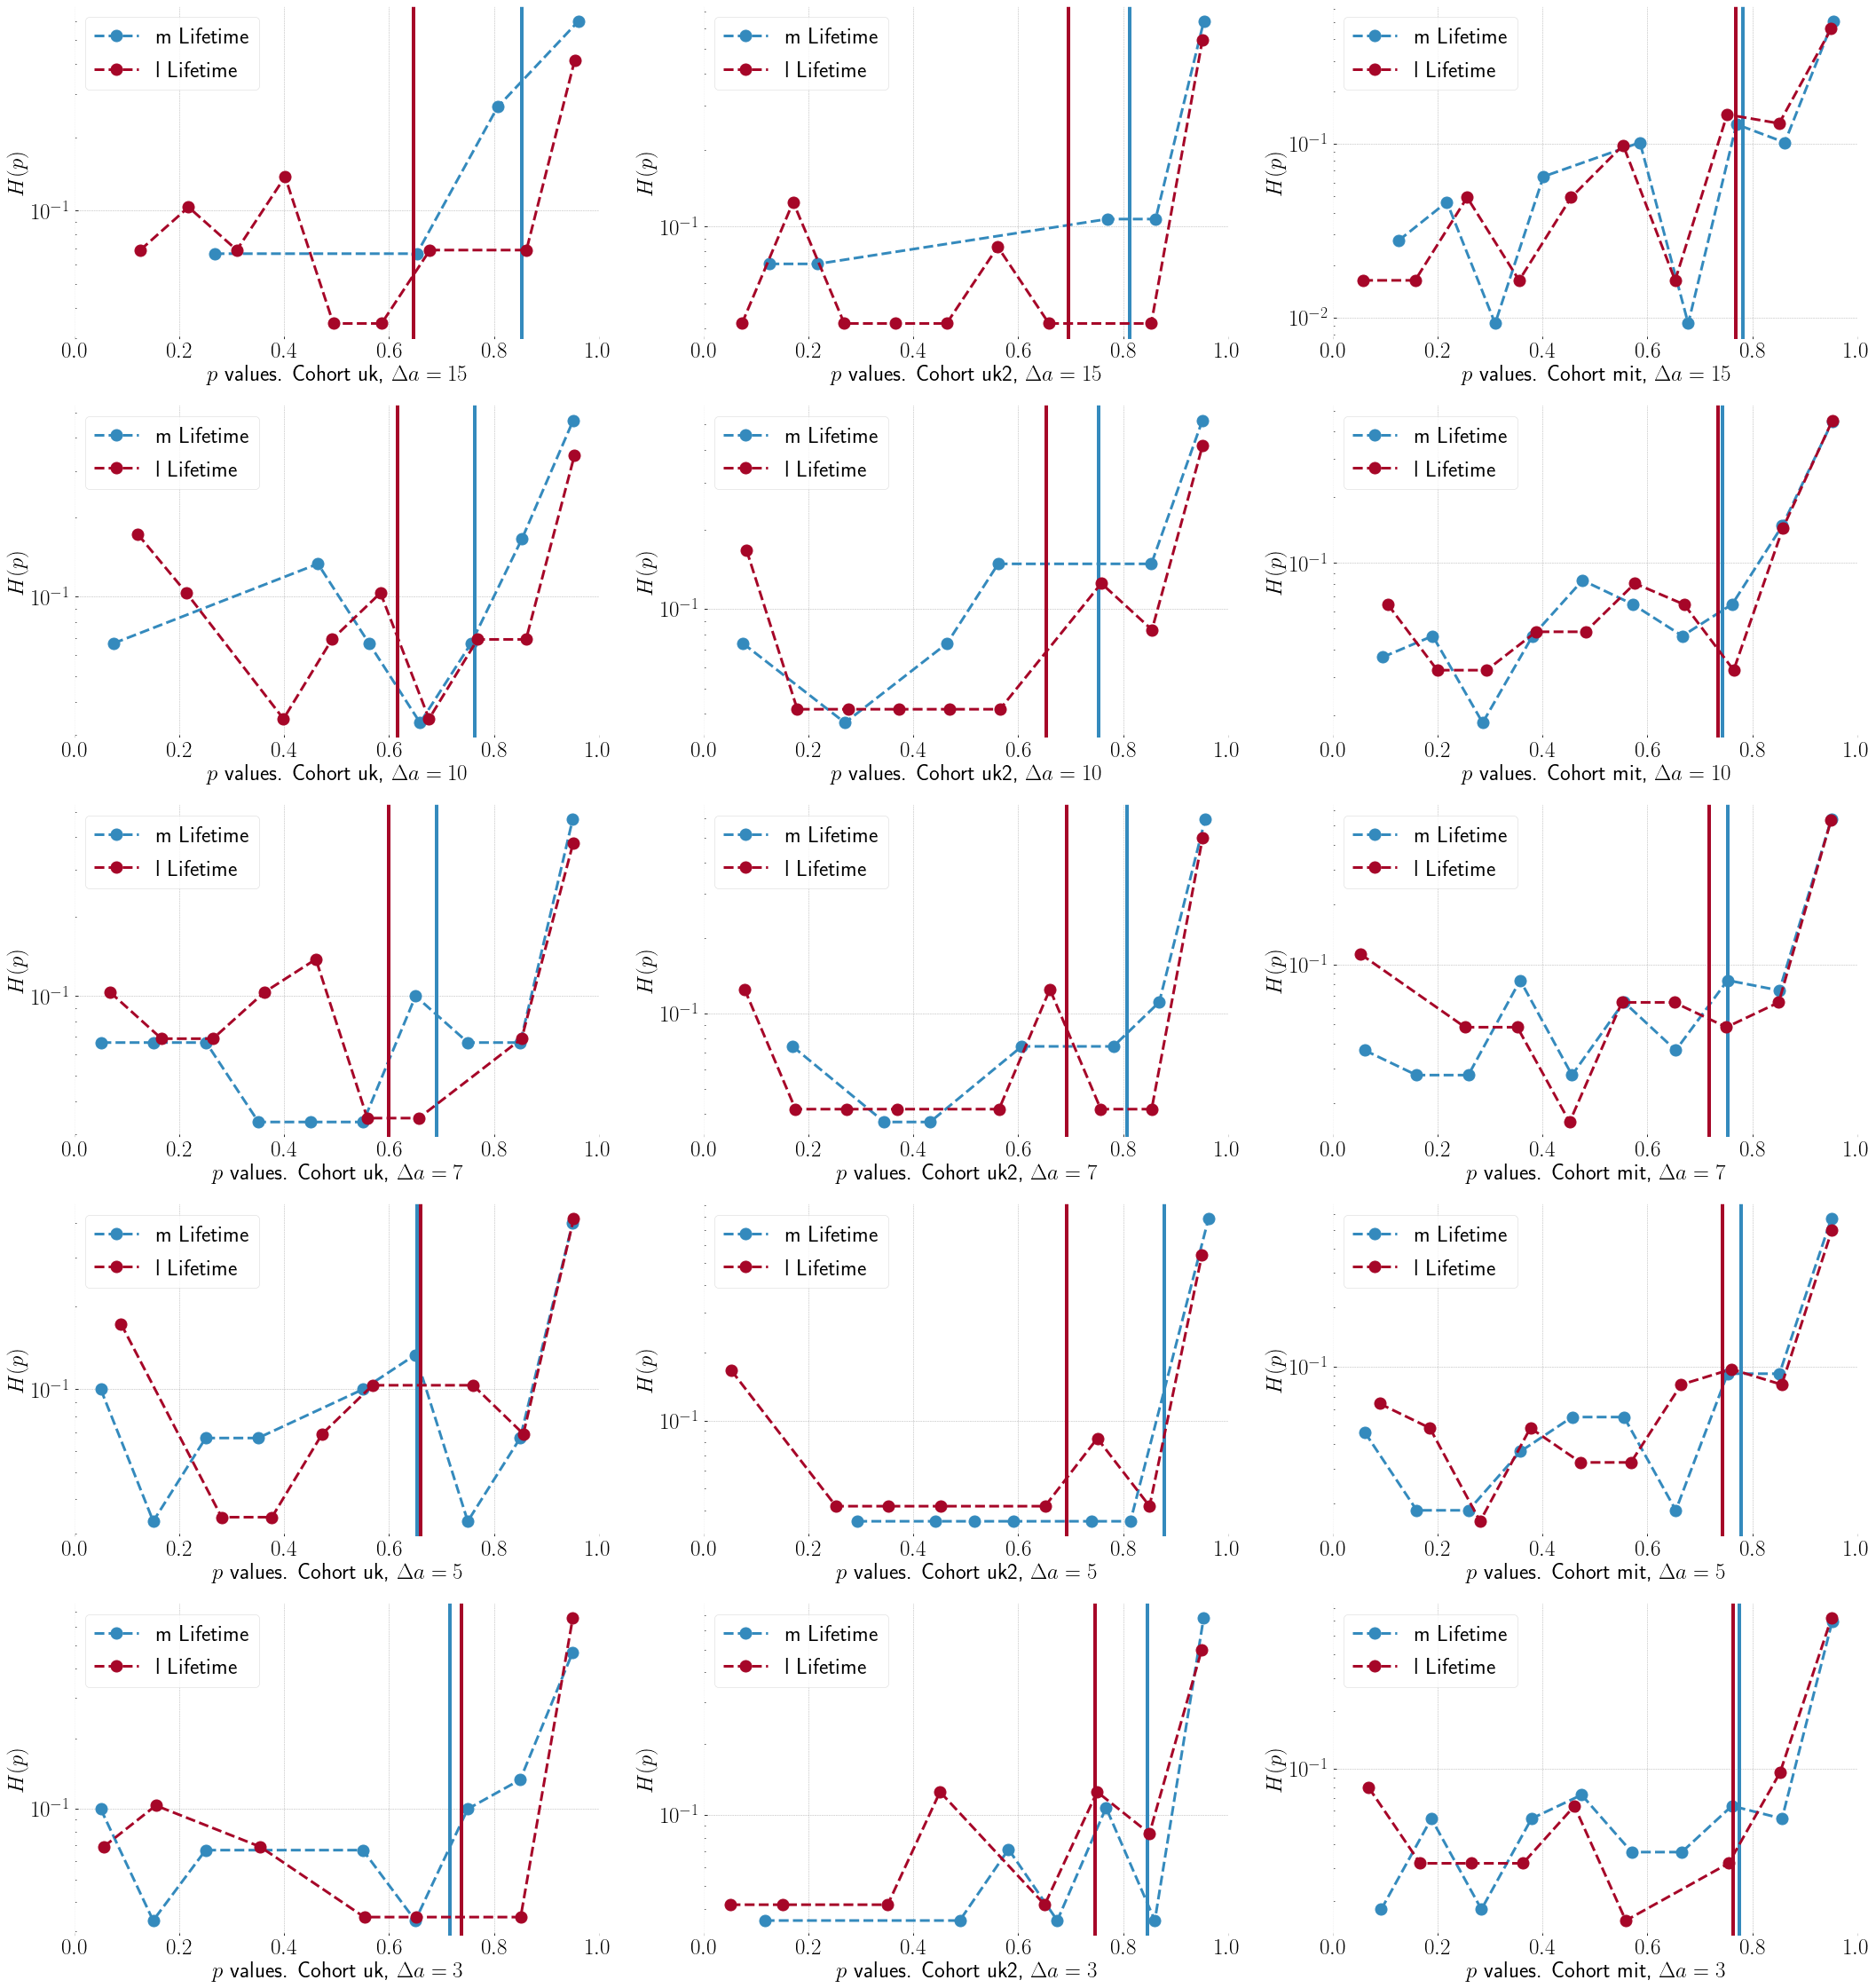

In [110]:
plt.figure(figsize=(12*3, 8*5))
p = 1
for Da in a.keys():
    for c in ksp.keys():
        plt.subplot(5, 3, p)
        plt.semilogy()
        plt.xlim(0, 1)
        plt.xlabel(fr"$p$ values. Cohort {c}, $\Delta a = {Da}$")
        plt.ylabel(r'$H(p)$')
        m = 0
        for s in ['m', 'l']:
            H = pc.histogram(ksp[c][Da][s], 10, log=False)
            H['tmp'] = H['label'] * H['h']
            avg = sum(H['tmp']) / sum(H['h'])
            plt.plot(H['label'], H['pmf'], marker=markers[0], markersize=13, ls="dashed", lw=3, c=colors[m], label=f"{s} Lifetime")
            plt.axvline(avg, ls="solid", lw=4, c=colors[m])
            m += 1
        plt.legend()
        p += 1
#plt.savefig("/home/vsvh/Desktop/A.png", dpi=150, pad_inches=2)

## Using all cohorts and $\Delta a = 15$

In [112]:
ksp = {}
for c in ['uk', 'uk2', 'it', 'mit']:
    ksp[c] = {}
    series = fig1[c][1]['fi']
    for ego in series.keys():
        df = series[ego]
        idx = sorted(list(df.index))[1:-1]
        if len(idx) > 0:
            mid = len(idx) // 2
            lims = ((idx[0], idx[mid]), (idx[mid], idx[-1]))
            left = df.loc[(df.index >= lims[0][0]) & (df.index <= lims[0][1])]
            right = df.loc[(df.index >= lims[1][0]) & (df.index <= lims[1][1])]
            if (len(left) >= 1) and (len(right) >= 1):
                ksp[c]['m'] = ksp[c].get('m', [])
                ksp[c]['m'].append(stats.ks_2samp(left['f'], right['f'])[1])
    series = fig1[c][2]['fi']
    for ego in series.keys():
        df = series[ego]
        idx = sorted(list(df.index))[1:-1]
        if len(idx) > 0:
            mid = len(idx) // 2
            lims = ((idx[0], idx[mid]), (idx[mid], idx[-1]))
            left = df.loc[(df.index >= lims[0][0]) & (df.index <= lims[0][1])]
            right = df.loc[(df.index >= lims[1][0]) & (df.index <= lims[1][1])]
            if (len(left) >= 1) and (len(right) >= 1):
                ksp[c]['l'] = ksp[c].get('l', [])
                ksp[c]['l'].append(stats.ks_2samp(left['f'], right['f'])[1])

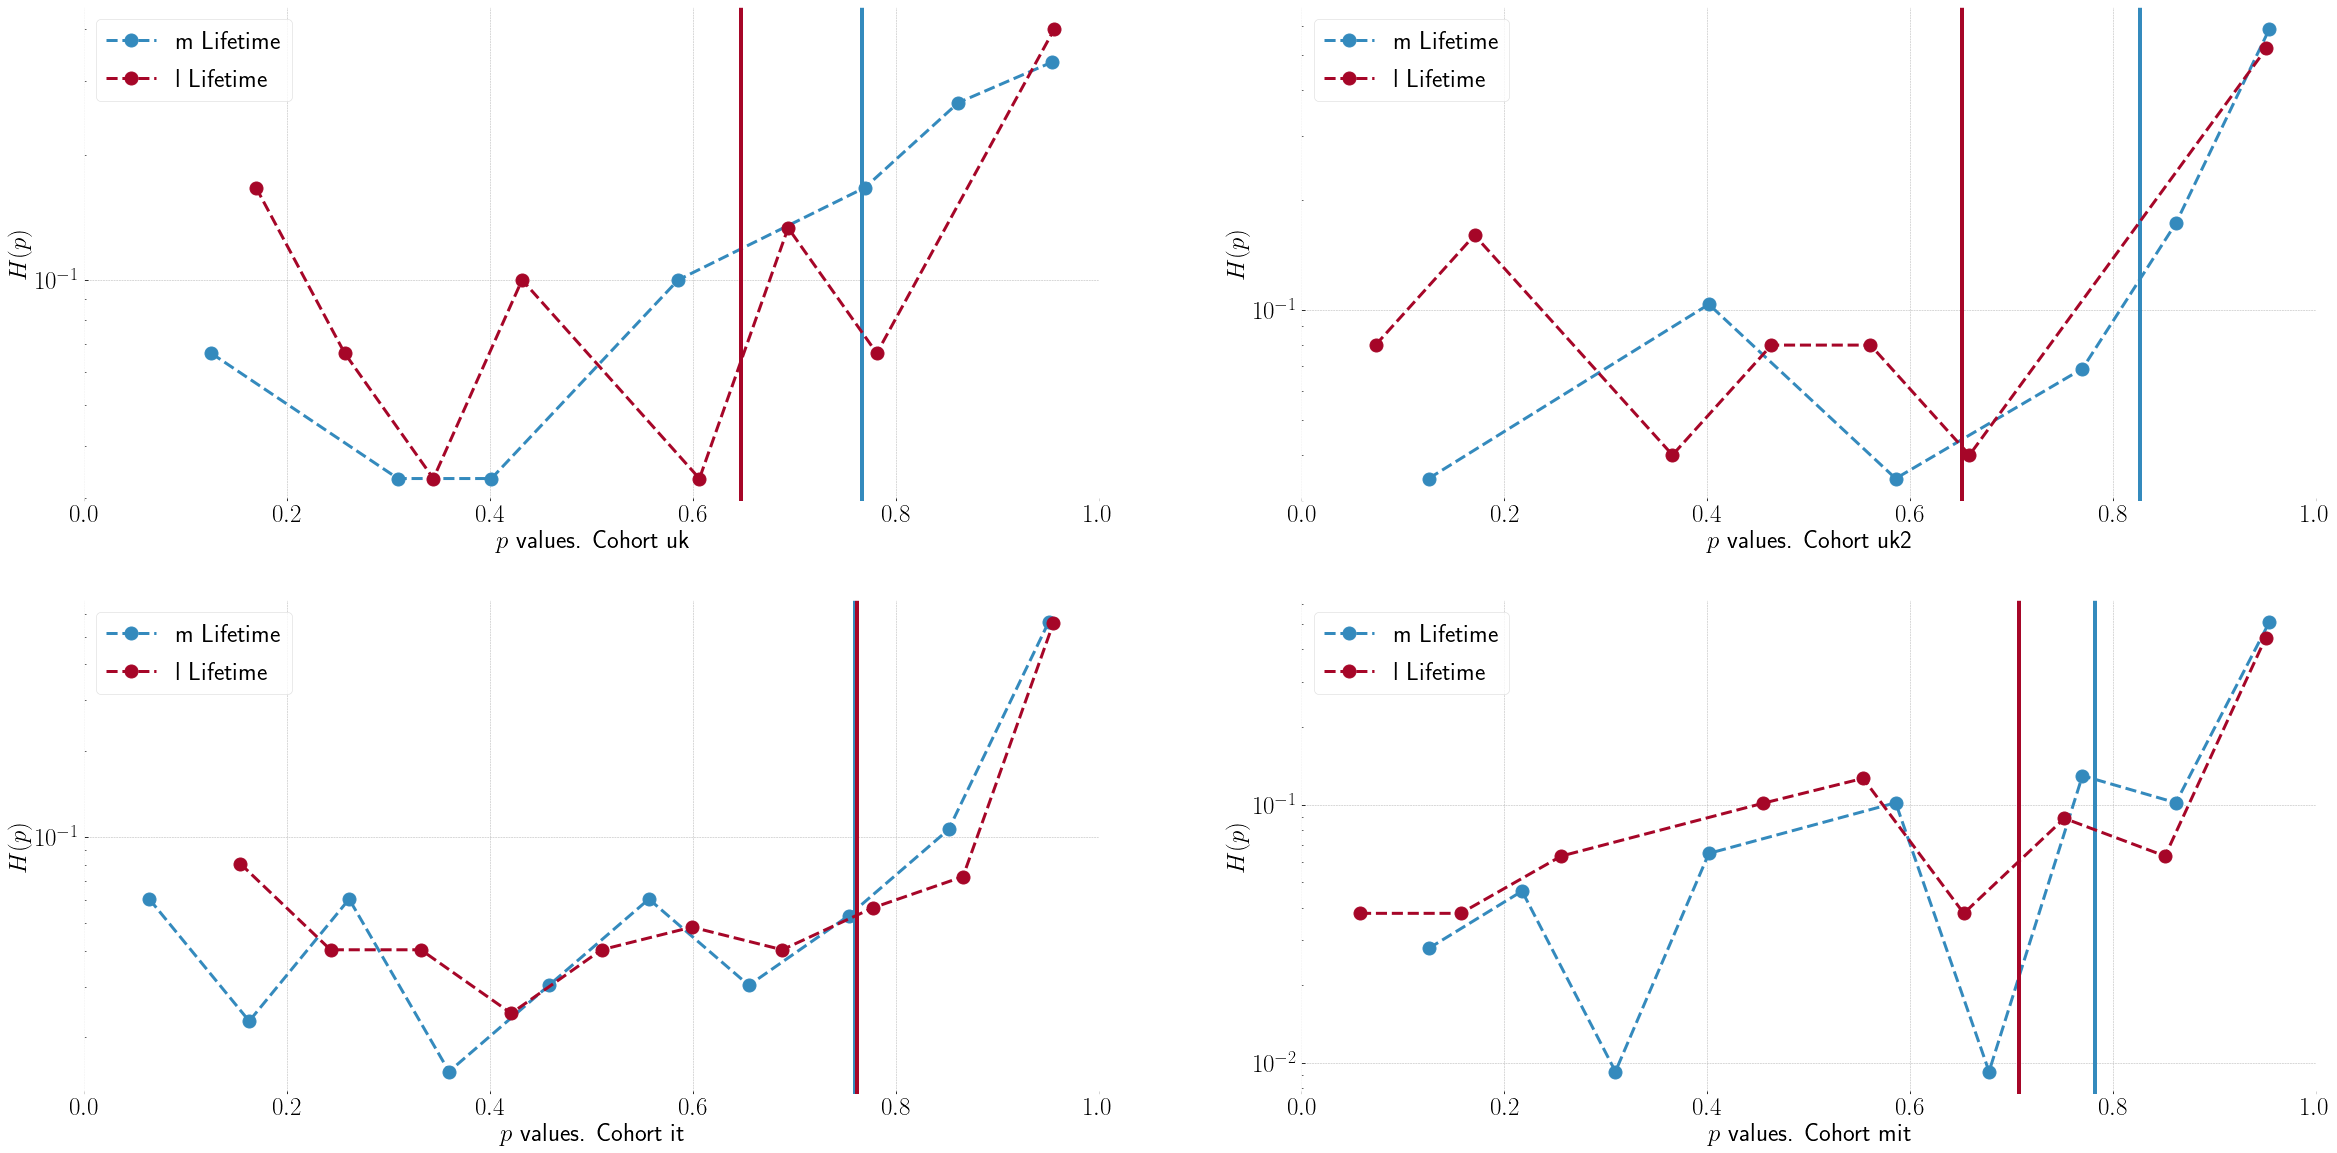

In [113]:
plt.figure(figsize=(20*2, 10*2))
p = 1
for c in ksp.keys():
    plt.subplot(2, 2, p)
    plt.semilogy()
    plt.xlim(0, 1)
    plt.xlabel(fr"$p$ values. Cohort {c}")
    plt.ylabel(r'$H(p)$')
    m = 0
    for s in ['m', 'l']:
        H = pc.histogram(ksp[c][s], 10, log=False)
        H['tmp'] = H['label'] * H['h']
        avg = sum(H['tmp']) / sum(H['h'])
        plt.plot(H['label'], H['pmf'], marker=markers[0], markersize=13, ls="dashed", lw=3, c=colors[m], label=f"{s} Lifetime")
        plt.axvline(avg, ls="solid", lw=4, c=colors[m])
        m += 1
    plt.legend()
    p += 1

In [119]:
for c in ksp.keys():
    for k in ['m', 'l']:
        print(c, k, len(ksp[c][k]))

uk m 30
uk l 30
uk2 m 29
uk2 l 25
it m 132
it l 124
mit m 108
mit l 79


In [149]:
tmp = pd.DataFrame(index=range(132))
lists = []
for c in ksp.keys():
    for k in ['m', 'l']:
        thelist = ksp[c][k]
        lists.append(thelist)
        for i in range(len(thelist)):
            tmp.at[i, f'{c}{k}'] = thelist[i]

([<matplotlib.axis.XTick at 0x7f5a779a9eb0>,
 [Text(0, 0, 'uk'), Text(1, 0, 'uk2'), Text(2, 0, 'it'), Text(3, 0, 'mit')])

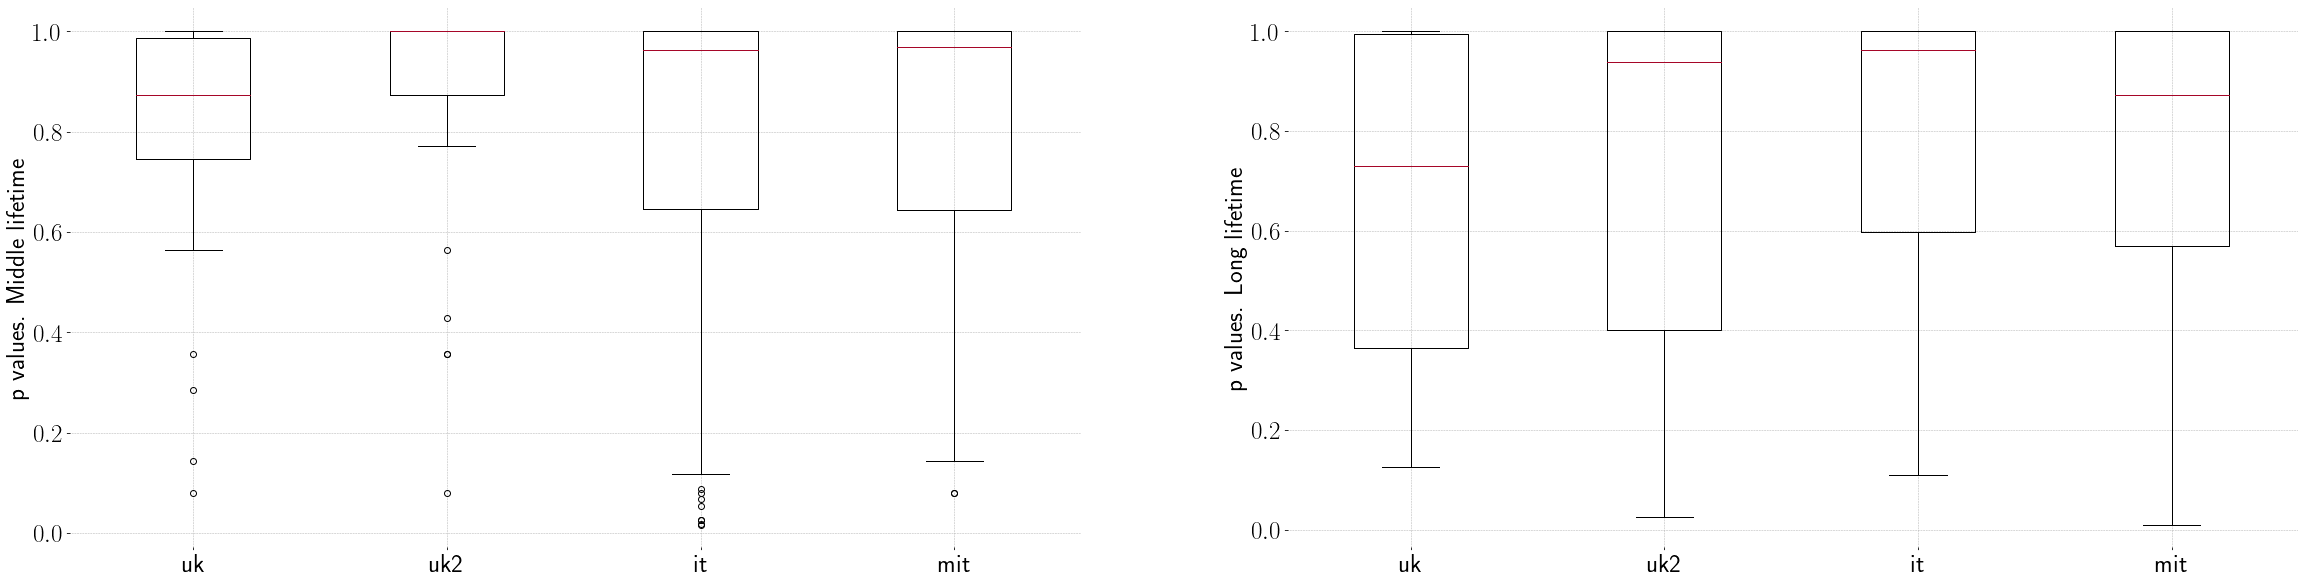

In [158]:
plt.figure(figsize=(40, 10))
plt.subplot(1,2,1)
plt.ylabel('p values. Middle lifetime')
plt.boxplot([lists[i] for i in [0,2,4,6]], positions=range(4))
plt.xticks(list(range(4)), labels=['uk', 'uk2', 'it', 'mit'])

plt.subplot(1,2,2)
plt.ylabel('p values. Long lifetime')
plt.boxplot([lists[i] for i in [1,3,5,7]], positions=range(4))
plt.xticks(range(4), labels=['uk', 'uk2', 'it', 'mit'])

In [160]:
# tmp = tmp.fillna('nan')
# tmp.to_csv("../commpatterns/PNAS_paper/figs/fig2.dat", index=False, header=True, sep="\t")

In [161]:
list(tmp['ukm'])

[0.2857142857142857,
 1.0,
 0.746031746031746,
 0.7714285714285716,
 0.9920634920634921,
 0.873015873015873,
 1.0,
 0.9682539682539683,
 0.6,
 0.8857142857142857,
 0.873015873015873,
 0.5634920634920635,
 1.0,
 0.9682539682539683,
 0.873015873015873,
 0.873015873015873,
 0.873015873015873,
 0.07936507936507953,
 1.0,
 0.746031746031746,
 1.0,
 0.5634920634920635,
 1.0,
 0.1428571428571428,
 0.873015873015873,
 0.7714285714285716,
 0.746031746031746,
 0.873015873015873,
 1.0,
 0.35714285714285715,
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 '

# Explore relationship between $\ell$ and $b$

In [24]:
test = fig1['it'][2]['f']

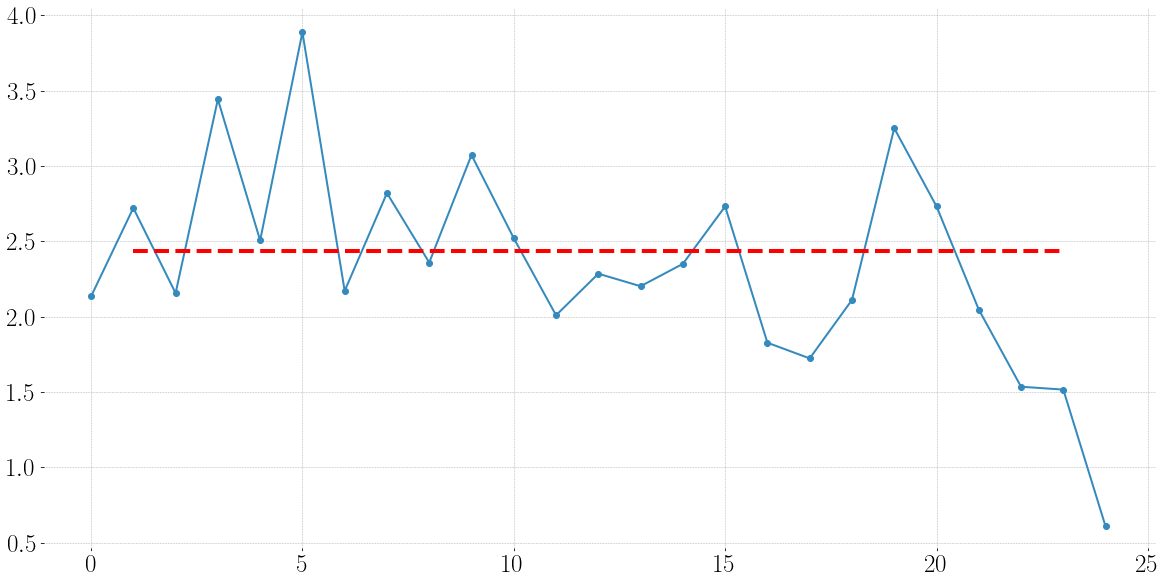

In [25]:
plt.plot(test.index, test['f'], "o-")
points = pc.get_plateau(test, pstar=0.01)
plt.plot([x[0] for x in points], [y[1] for y in points], marker="", ls="dashed", lw=4, c="red")

In [26]:
for i in range(max(test.index) // 2):
    df = test.loc[(test.index >= (0 + i)) & (test.index <= (max(test.index) - i))]
    X = sm.add_constant(df.index)
    Y = df['f']
    tmp = sm.OLS(Y, X).fit()
    print(f'{i}: \t slope {tmp.params[1]:.4f} \t p-value {tmp.pvalues[1]:.4f} \t R-squared {tmp.rsquared:.3f}')

0: 	 slope -0.0478 	 p-value 0.0080 	 R-squared 0.268
1: 	 slope -0.0433 	 p-value 0.0169 	 R-squared 0.243
2: 	 slope -0.0397 	 p-value 0.0580 	 R-squared 0.176
3: 	 slope -0.0427 	 p-value 0.0718 	 R-squared 0.178
4: 	 slope -0.0289 	 p-value 0.2990 	 R-squared 0.072
5: 	 slope -0.0486 	 p-value 0.1686 	 R-squared 0.141
6: 	 slope -0.0503 	 p-value 0.0786 	 R-squared 0.255
7: 	 slope -0.0799 	 p-value 0.0349 	 R-squared 0.406
8: 	 slope -0.0550 	 p-value 0.2800 	 R-squared 0.164
9: 	 slope -0.0419 	 p-value 0.5840 	 R-squared 0.064
10: 	 slope -0.0148 	 p-value 0.8427 	 R-squared 0.015
11: 	 slope 0.0964 	 p-value 0.5230 	 R-squared 0.464


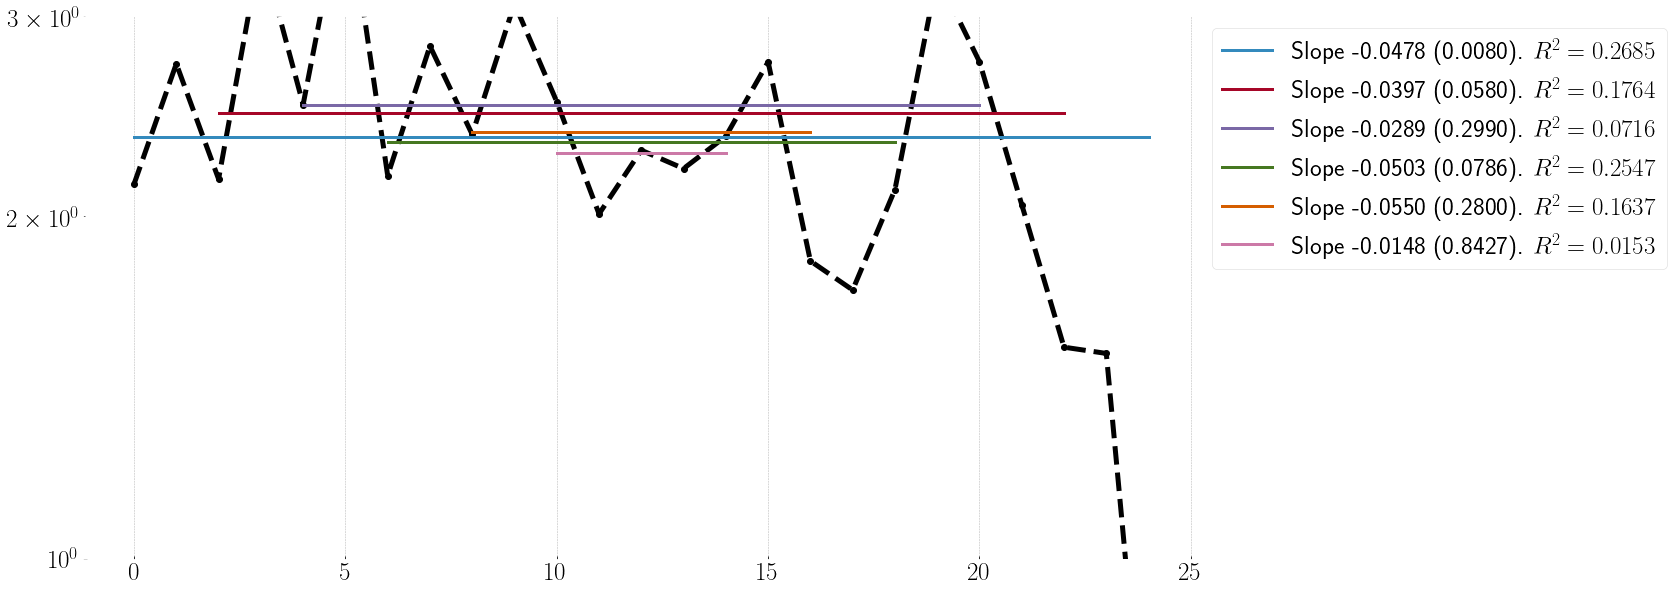

In [27]:
plt.figsize=(30, 15)
plt.plot(test.index, test['f'], c="black", marker="o", ls="dashed", lw=5)
plt.semilogy()
plt.ylim(1, 3)
for i in range(0, max(test.index) // 2, 2):
    df = test.loc[(test.index >= (0 + i)) & (test.index <= (max(test.index) - i))]
    X = sm.add_constant(df.index)
    Y = df['f']
    tmp = sm.OLS(Y, X).fit()
    xpoints, ypoints = [min(df.index), max(df.index)], [np.mean(Y), np.mean(Y)]
    plt.plot(xpoints, ypoints, ls="solid", lw=3, marker="", label=fr'Slope {tmp.params[1]:.4f} ({tmp.pvalues[1]:.4f}). $R^2 = {tmp.rsquared:.4f}$')
plt.legend(bbox_to_anchor=(1, 1))

In [28]:
!pip install pymannkendall
import pymannkendall as mk

Defaulting to user installation because normal site-packages is not writeable


In [29]:
for i in range(max(test.index) // 2):
    df = test.loc[(test.index >= (0 + i)) & (test.index <= (max(test.index) - i))]
    print(mk.original_test(df))

Mann_Kendall_Test(trend='decreasing', h=True, p=0.014195743882660095, z=-2.4522716741087978, Tau=-0.35333333333333333, s=-106.0, var_s=1833.3333333333333, slope=-0.04282761125623934, intercept=2.799077868435691)
Mann_Kendall_Test(trend='decreasing', h=True, p=0.01745687657638273, z=-2.3769410746493627, Tau=-0.35968379446640314, s=-91.0, var_s=1433.6666666666667, slope=-0.04257721376076862, intercept=2.8188753757316882)
Mann_Kendall_Test(trend='no trend', h=False, p=0.06547335845953506, z=-1.842012247120261, Tau=-0.29523809523809524, s=-62.0, var_s=1096.6666666666667, slope=-0.03716771624801081, intercept=2.7222031868433416)
Mann_Kendall_Test(trend='no trend', h=False, p=0.08024287819033638, z=-1.749278571353299, Tau=-0.2982456140350877, s=-51.0, var_s=817.0, slope=-0.040765337356246475, intercept=2.726087170405352)
Mann_Kendall_Test(trend='no trend', h=False, p=0.3434194871827416, z=-0.9474304377573798, Tau=-0.17647058823529413, s=-24.0, var_s=589.3333333333334, slope=-0.03119678015199

In [30]:
a = mk.original_test(test)
a[0]

'decreasing'

## Two functions to obtain $b$

In [31]:
def get_b_olstocenter(series, pstar=0.1):
    for i in range(max(series.index) // 2):
        df = series.loc[(series.index >= (0 + i)) & (series.index <= (max(series.index) - i))]
        X = sm.add_constant(series.index)
        Y = series['f']
        tmp = sm.OLS(Y, X).fit()
        if tmp.pvalues[1] > pstar:
            df = series.loc[(series.index >= (0 + i - 1)) & (series.index <= (max(series.index) - i + 1))]
            xo = min(df.index)
            xf = max(df.index)
            yo = np.mean(df['f'])
            yf = yo
            return [[xo, xf], [yo, yf]]
    else:
        df = series.loc[(series.index >= (0 + 1)) & (series.index <= (max(series.index) - 1))]
        xo = min(df.index)
        xf = max(df.index)
        yo = np.mean(df['f'])
        yf = yo
        return [[xo, xf], [yo, yf]]

In [32]:
def get_b_slopes(series, patternsize=3):
    allslopes = []
    X = list(series.index)
    N = len(X)
    xo, xf = X[0], X[-1]
    yo, yf = series.at[xo, 'f'], series.at[xf, 'f']
    slope = (yf - yo) / (xf - xo)
    allslopes.append(slope)
    for i in range(1, N):
        newx = X[i // 2: N - ((i + 1) // 2)]
        if len(newx) > 1:
            xo, xf = newx[0], newx[-1]
            yo, yf = series.at[xo, 'f'], series.at[xf, 'f']
            slope = (yf - yo) / (xf - xo)
            allslopes.append(slope)
        else:
            xo, xf = X[1], X[-2]
            df = series.loc[(series.index >= xo) & (series.index <= xf)]
            yo = np.mean(df['f'])
            yf = yo
            return [[xo, xf], [yo, yf]]
        if (len(allslopes) >= patternsize):
            checkSlopes = list(np.sign(allslopes[-patternsize:]))
            if checkSlopes.count(checkSlopes[0]) != len(checkSlopes):
                df = series.loc[(series.index >= xo) & (series.index <= xf)]
                yo = np.mean(df['f'])
                yf = yo
                return [[xo, xf], [yo, yf]]        

In [33]:
def get_b_mk(series):
    for i in range(max(series.index) // 2):
        df = series.loc[(series.index >= (0 + i)) & (series.index <= (max(series.index) - i))]
        tmp = mk.original_test(df['f'])
        if tmp[0] == 'no trend':
            df = series.loc[(series.index >= (0 + i - 1)) & (series.index <= (max(series.index) - i + 1))]
            xo = min(df.index)
            xf = max(df.index)
            yo = np.mean(df['f'])
            yf = yo
            return [[xo, xf], [yo, yf]]
    else:
        df = series.loc[(series.index >= (0 + 1)) & (series.index <= (max(series.index) - 1))]
        xo = min(df.index)
        xf = max(df.index)
        yo = np.mean(df['f'])
        yf = yo
        return [[xo, xf], [yo, yf]]

In [34]:
calls['uk1'] = pc.apply_filters(unfiltered['uk1'], 60)

## Testing the functions

In [35]:
maxa = {}
for c in calls.keys():
    maxa[c] = max(calls[c]['aclock'])
maxit = 0
for ego in itlives[60].keys():
    for alter in itlives[60][ego].keys():
        if itlives[60][ego][alter]['ell'] > maxit:
            maxit = itlives[60][ego][alter]['ell']
maxa['it'] = maxit
maxa

{'uk': 482, 'uk2': 291, 'mit': 442, 'uk1': 481, 'it': 633}

In [36]:
t0 = dt.datetime.now()
tests = ['olsToEnds', 'olsToCenter', 'mk', 'slopes']
functs = [pc.get_plateau, get_b_olstocenter, get_b_mk, get_b_slopes]
fa = {}
for c in ['uk', 'uk1', 'uk2', 'it', 'mit']:
    fa[c] = {}
    for t in tests:
        fa[c][t] = {}
    for ell in range(maxa[c]):
        if c == 'it':
            curve  = {'f': pc.get_avgfa(itdffa15[60], itlives[60], ell, ell + 50)}
        else:
            curve = pc.get_fal(calls[c], ell, ell + 50, 15)
        if len(curve['f']) > 3:
            for ft in range(len(tests)):
                points = functs[ft](curve['f'])
                fa[c][tests[ft]][ell] = points[1][1]
    for t in fa[c].keys():
        fa[c][t] = pd.DataFrame.from_dict(fa[c][t], orient='index').sort_index()
print(f'Took {dt.datetime.now() - t0}')

Took 0:03:38.862605


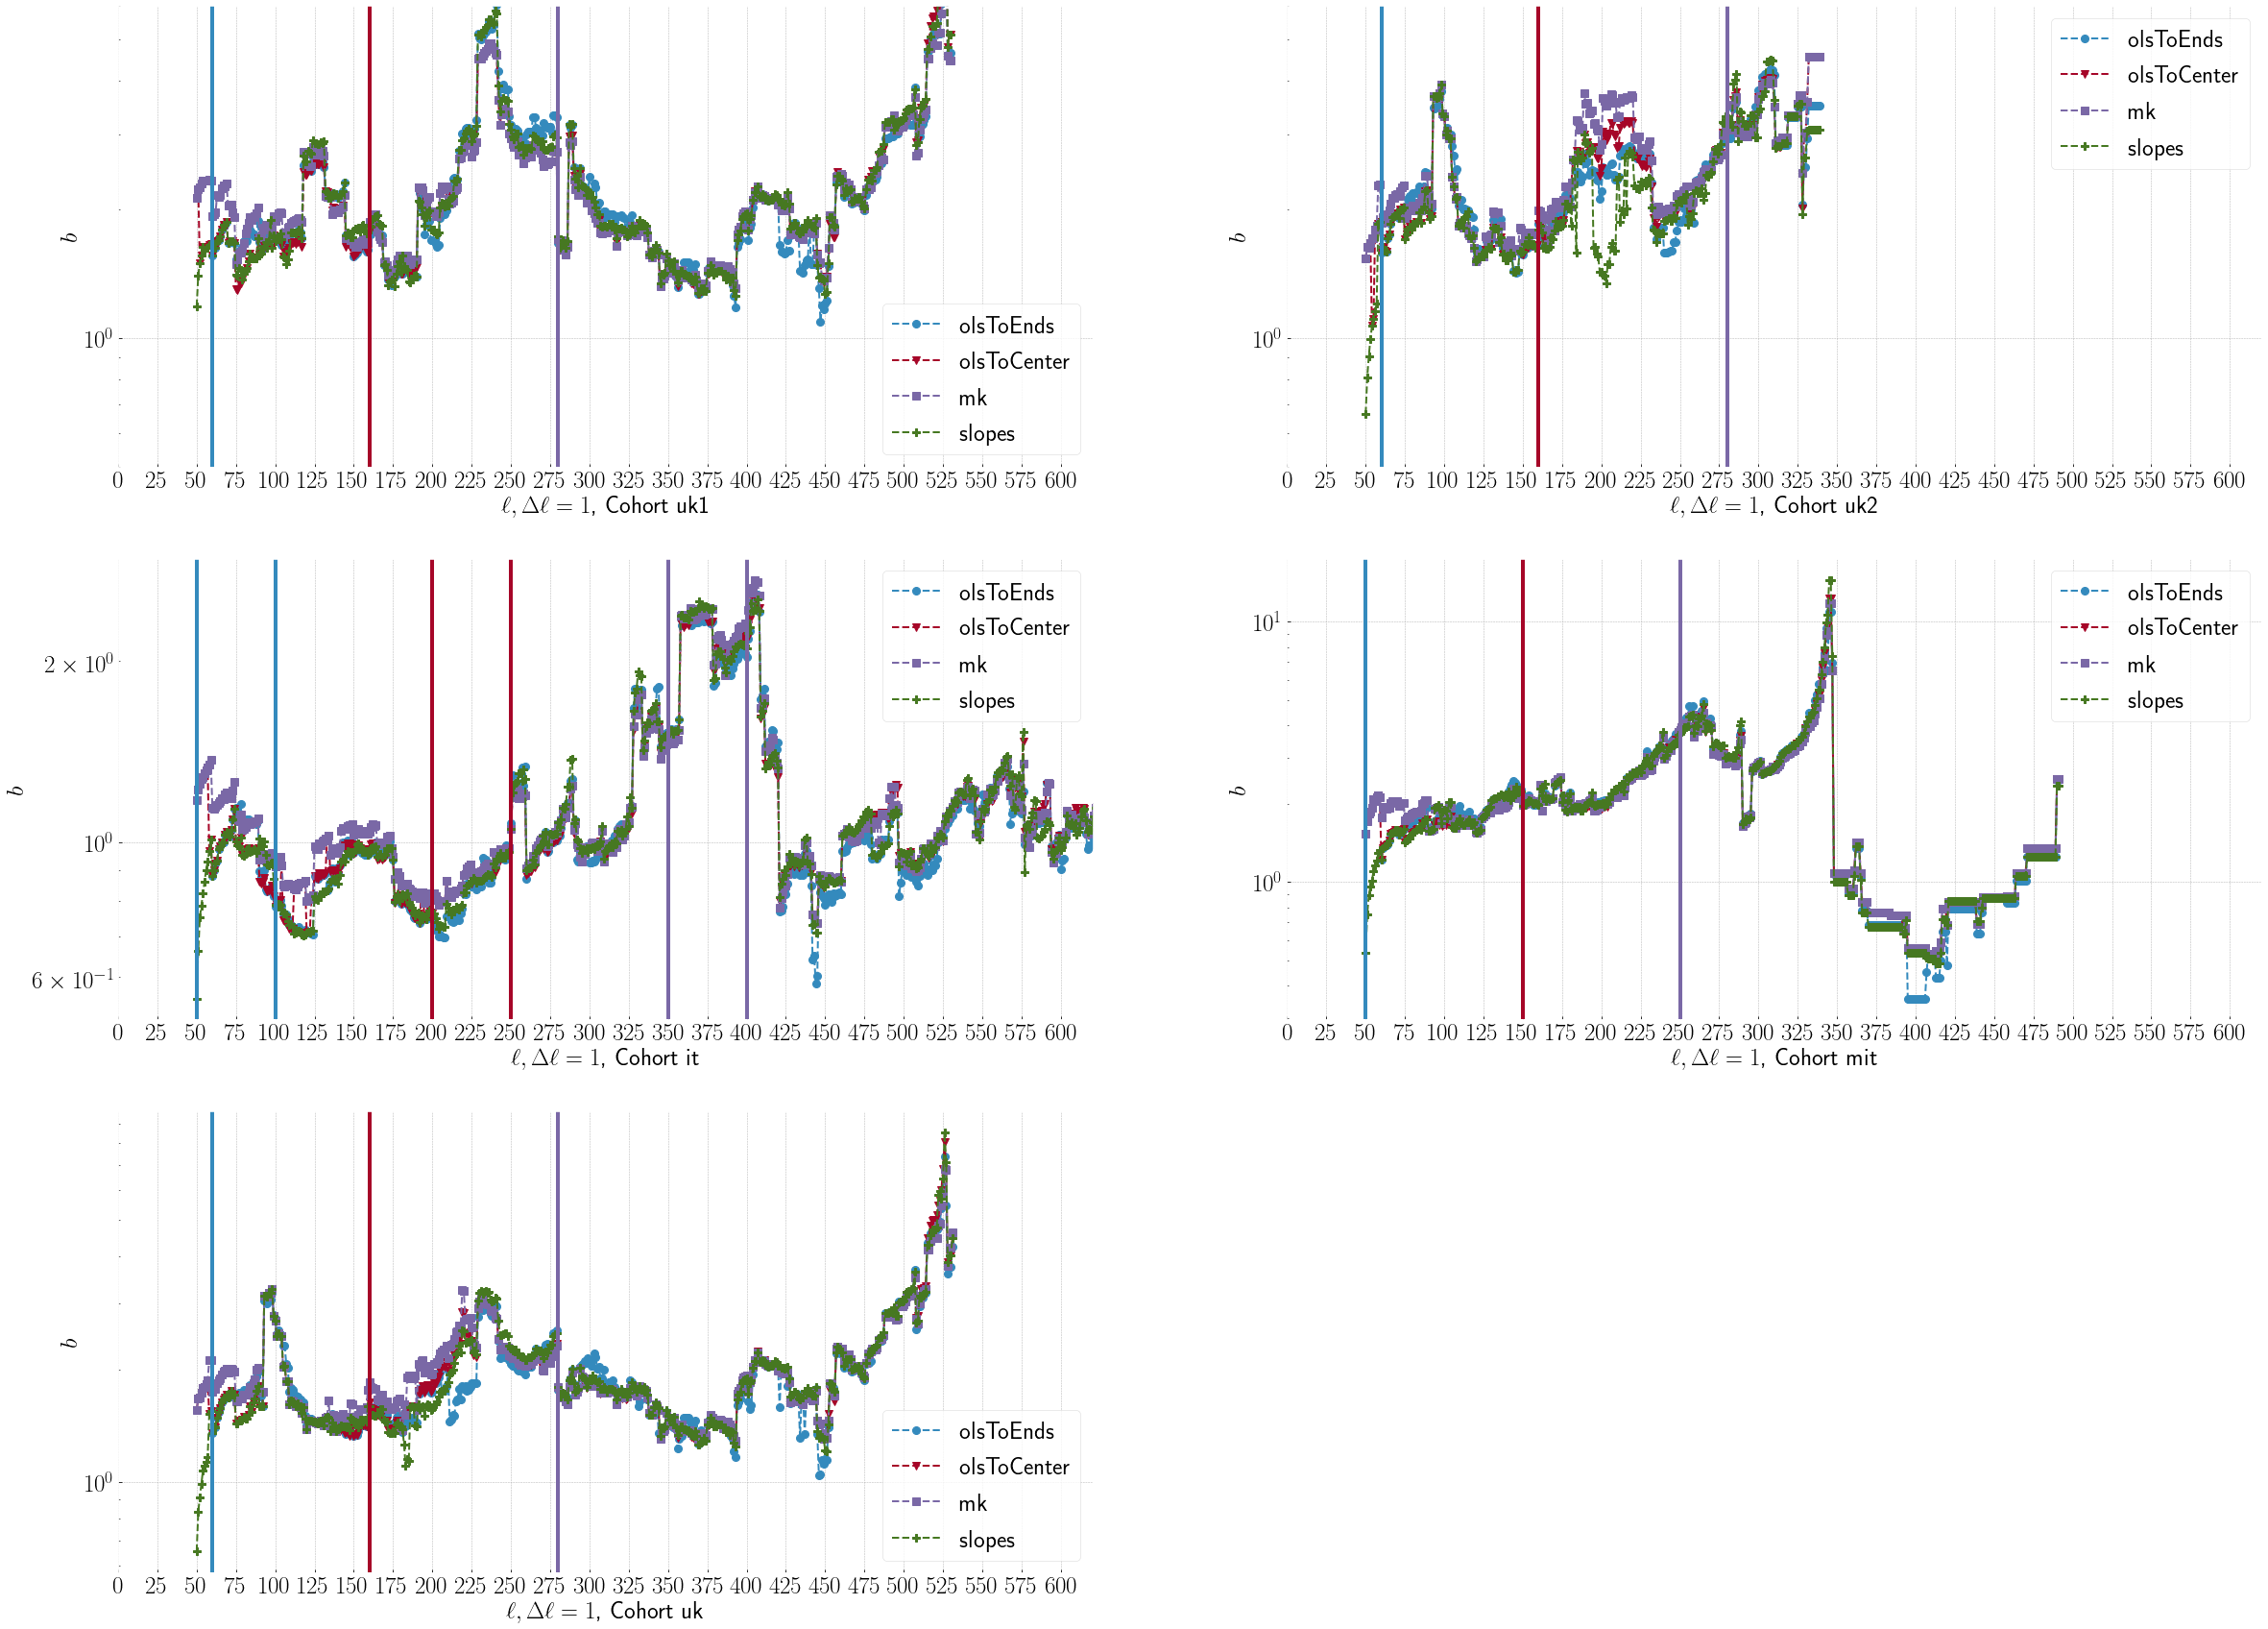

In [37]:
plt.figure(figsize=(20*2, 10*3))
p = 1
for c in ['uk1', 'uk2', 'it', 'mit', 'uk']:
    plt.subplot(3, 2, p)
    plt.xlabel(fr'$\ell, \Delta \ell = 1$, Cohort {c}')
    plt.ylabel(r'$b$')
    plt.xlim(0, 620)
    if p <= 2:
        plt.ylim(0.5, 6)
    plt.xticks(range(0, 620, 25))
    plt.semilogy()
    m = 0
    for t in fa[c].keys():
        plt.plot([x + 50 for x in fa[c][t].index], fa[c][t][0], marker=markers[m], markersize=8, ls="dashed", lw=2, label=t)
        m += 1
    if c == 'mit':
        plt.axvline(50, ls="solid", lw=4, c=colors[0])
        plt.axvline(150, ls="solid", lw=4, c=colors[1])
        plt.axvline(250, ls="solid", lw=4, c=colors[2])
    elif c == 'it':
        plt.axvline(50, ls="solid", lw=4, c=colors[0])
        plt.axvline(100, ls="solid", lw=4, c=colors[0])
        plt.axvline(200, ls="solid", lw=4, c=colors[1])
        plt.axvline(250, ls="solid", lw=4, c=colors[1])
        plt.axvline(350, ls="solid", lw=4, c=colors[2])
        plt.axvline(400, ls="solid", lw=4, c=colors[2])
    else:
        plt.axvline(60, ls="solid", lw=4, c=colors[0])
        plt.axvline(160, ls="solid", lw=4, c=colors[1])
        plt.axvline(280, ls="solid", lw=4, c=colors[2])
    plt.legend()
    p += 1

## Separate methods and calculate moving average

In [38]:
for c in fa.keys():
    for t in fa[c].keys():
        df = fa[c][t]
        df['ma50'] = df.rolling(window=50).mean()

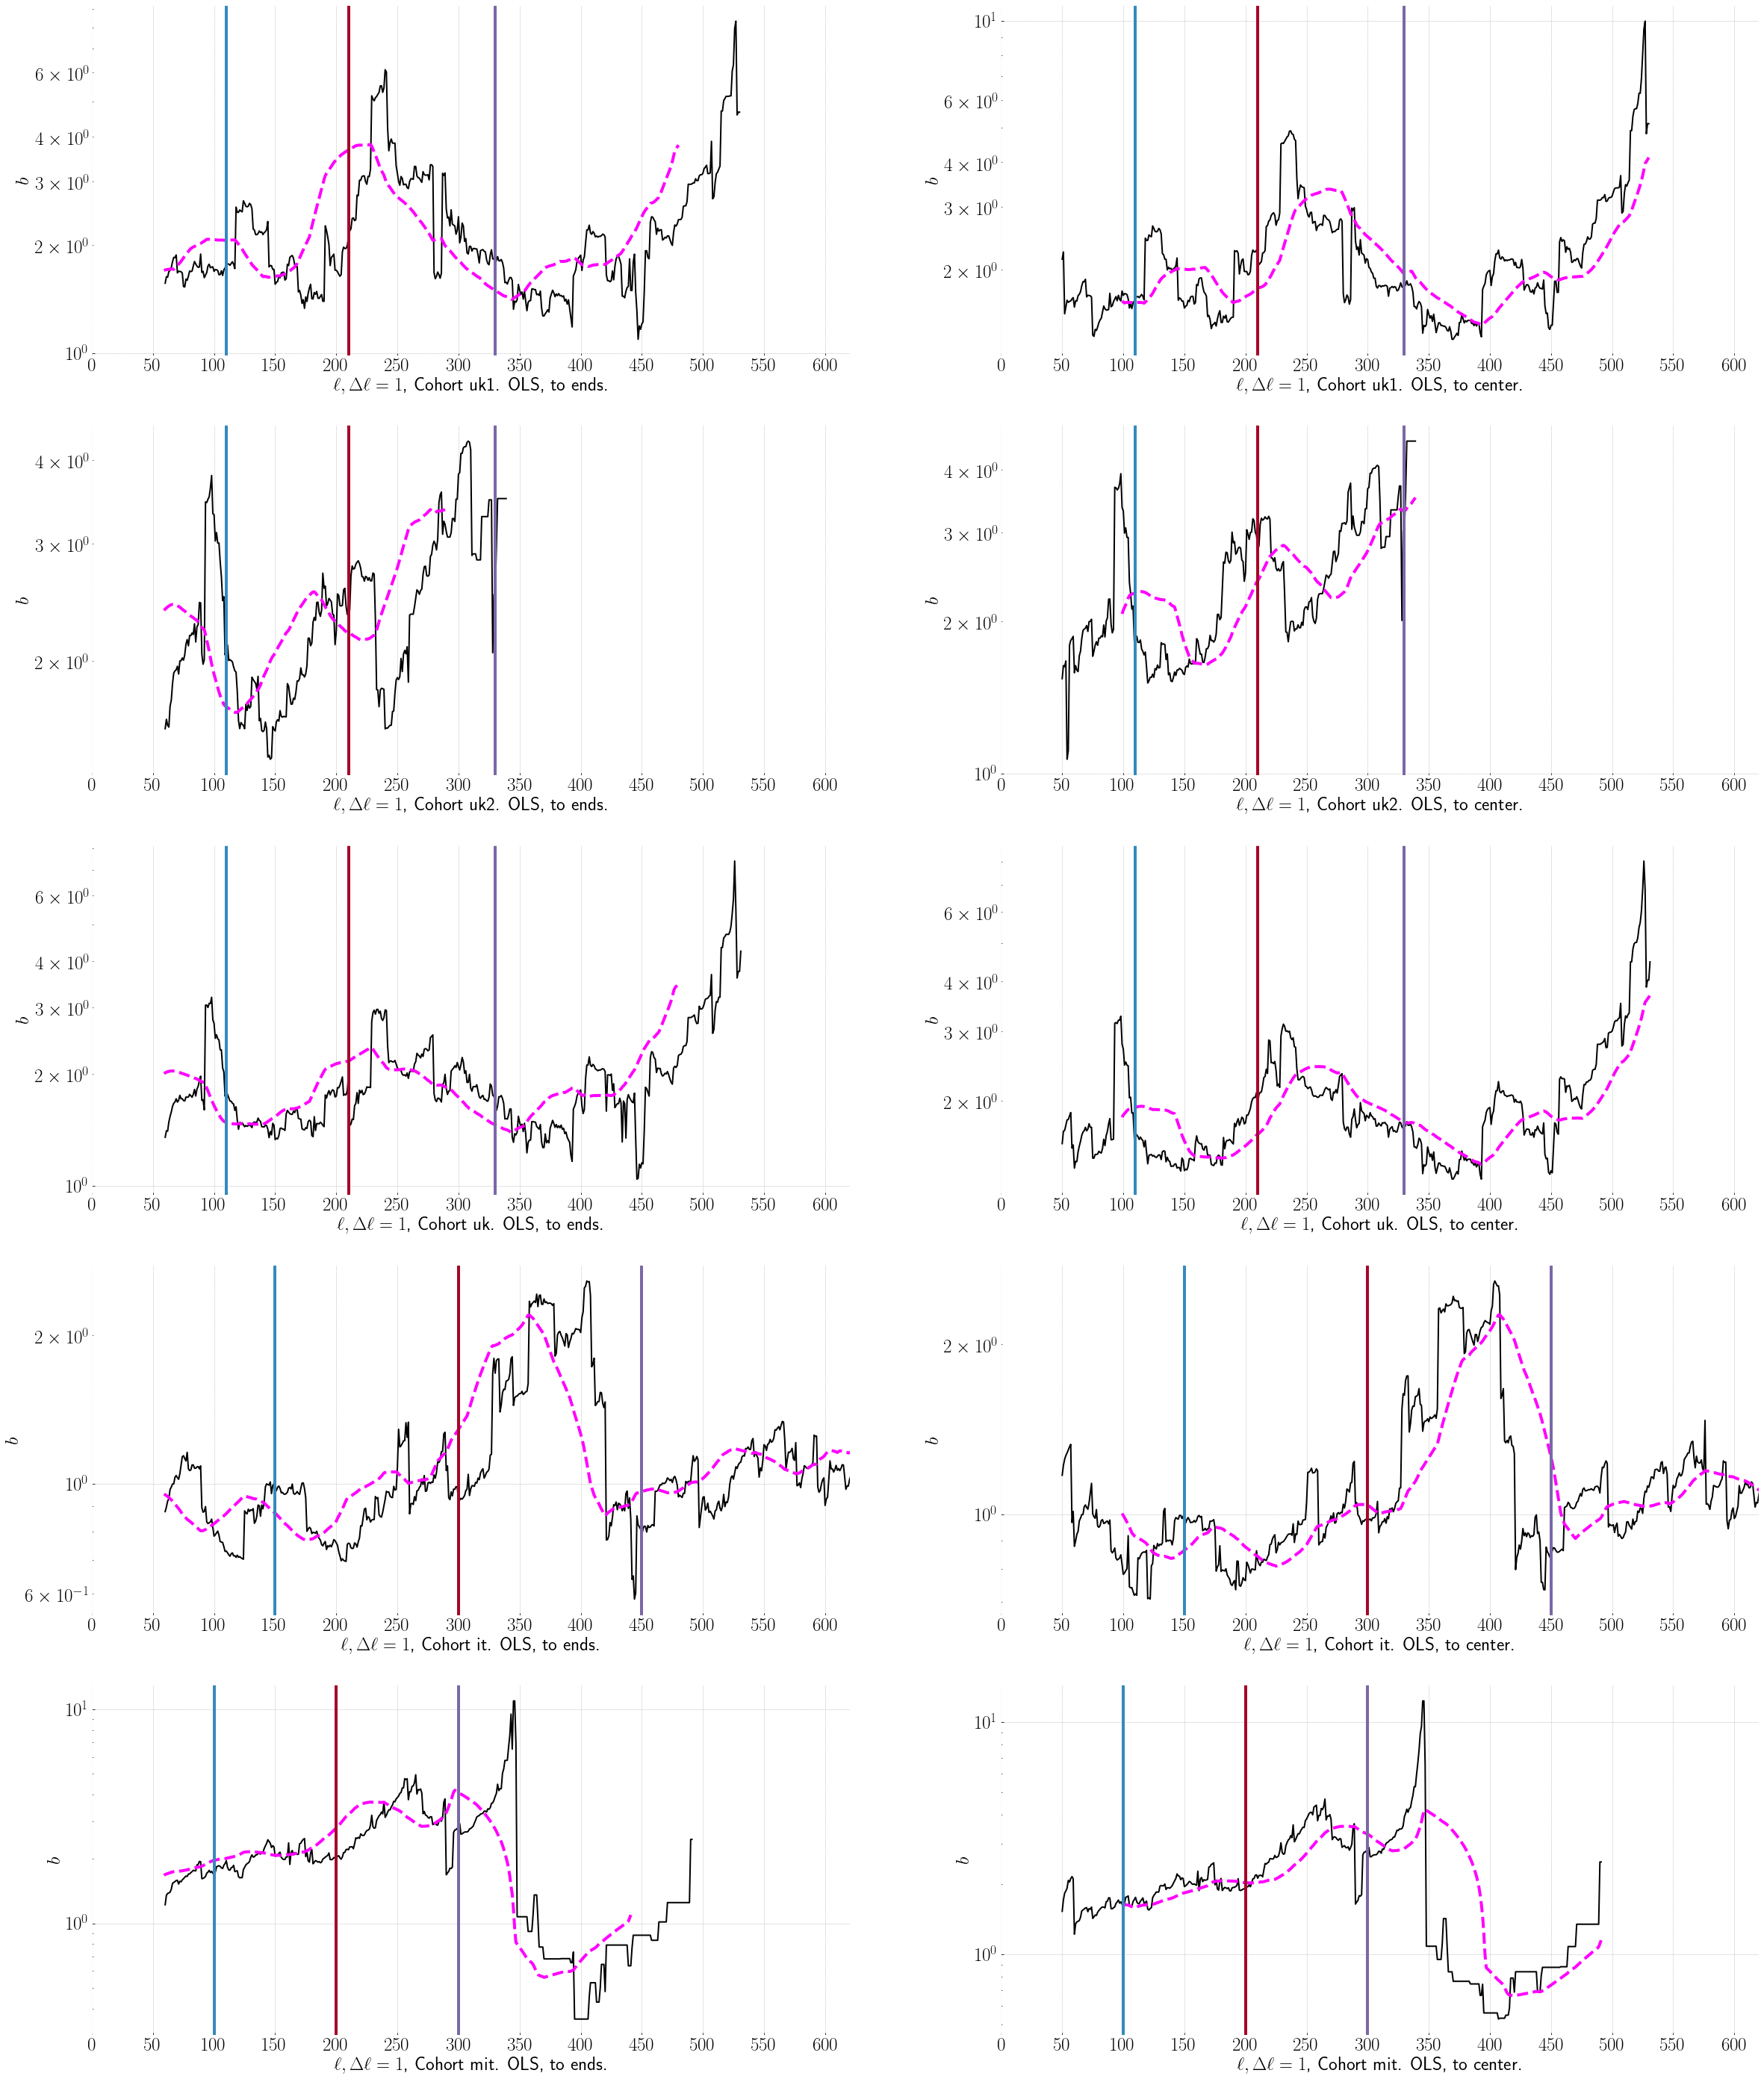

In [39]:
plt.figure(figsize=(20*2, 10*5))
p = 1
for c in ['uk1', 'uk2', 'uk', 'it', 'mit']:
    plt.subplot(5, 2, p)
    plt.xlabel(fr'$\ell, \Delta \ell = 1$, Cohort {c}. OLS, to ends.')
    plt.ylabel(r'$b$')
    plt.semilogy()
    plt.xlim(0, 620)
    plt.xticks(range(0, 620, 50))
    plt.plot([x + 50 for x in fa[c]['olsToEnds'].index], fa[c]['olsToEnds'][0], markersize=8, ls="solid", c="black", lw=2)
    plt.plot([x + 0 for x in fa[c]['olsToEnds'].index], fa[c]['olsToEnds']['ma50'], marker="", ls="dashed", c='magenta', lw=4)
    if c == 'mit':
        plt.axvline(100, ls="solid", lw=4, c=colors[0])
        plt.axvline(200, ls="solid", lw=4, c=colors[1])
        plt.axvline(300, ls="solid", lw=4, c=colors[2])
    elif c == 'it':
        plt.axvline(150, ls="solid", lw=4, c=colors[0])
        plt.axvline(300, ls="solid", lw=4, c=colors[1])
        plt.axvline(450, ls="solid", lw=4, c=colors[2])
    else:
        plt.axvline(110, ls="solid", lw=4, c=colors[0])
        plt.axvline(210, ls="solid", lw=4, c=colors[1])
        plt.axvline(330, ls="solid", lw=4, c=colors[2])
    p += 1
    
    plt.subplot(5, 2, p)
    plt.xlabel(fr'$\ell, \Delta \ell = 1$, Cohort {c}. OLS, to center.')
    plt.ylabel(r'$b$')
    plt.semilogy()
    plt.xlim(0, 620)
    plt.xticks(range(0, 620, 50))
    plt.plot([x + 50 for x in fa[c]['olsToCenter'].index], fa[c]['olsToCenter'][0], markersize=8, ls="solid", c="black", lw=2)
    plt.plot([x + 50 for x in fa[c]['olsToCenter'].index], fa[c]['olsToCenter']['ma50'], marker="", ls="dashed", c='magenta', lw=4)
    if c == 'mit':
        plt.axvline(100, ls="solid", lw=4, c=colors[0])
        plt.axvline(200, ls="solid", lw=4, c=colors[1])
        plt.axvline(300, ls="solid", lw=4, c=colors[2])
    elif c == 'it':
        plt.axvline(150, ls="solid", lw=4, c=colors[0])
        plt.axvline(300, ls="solid", lw=4, c=colors[1])
        plt.axvline(450, ls="solid", lw=4, c=colors[2])
    else:
        plt.axvline(110, ls="solid", lw=4, c=colors[0])
        plt.axvline(210, ls="solid", lw=4, c=colors[1])
        plt.axvline(330, ls="solid", lw=4, c=colors[2])
    p += 1

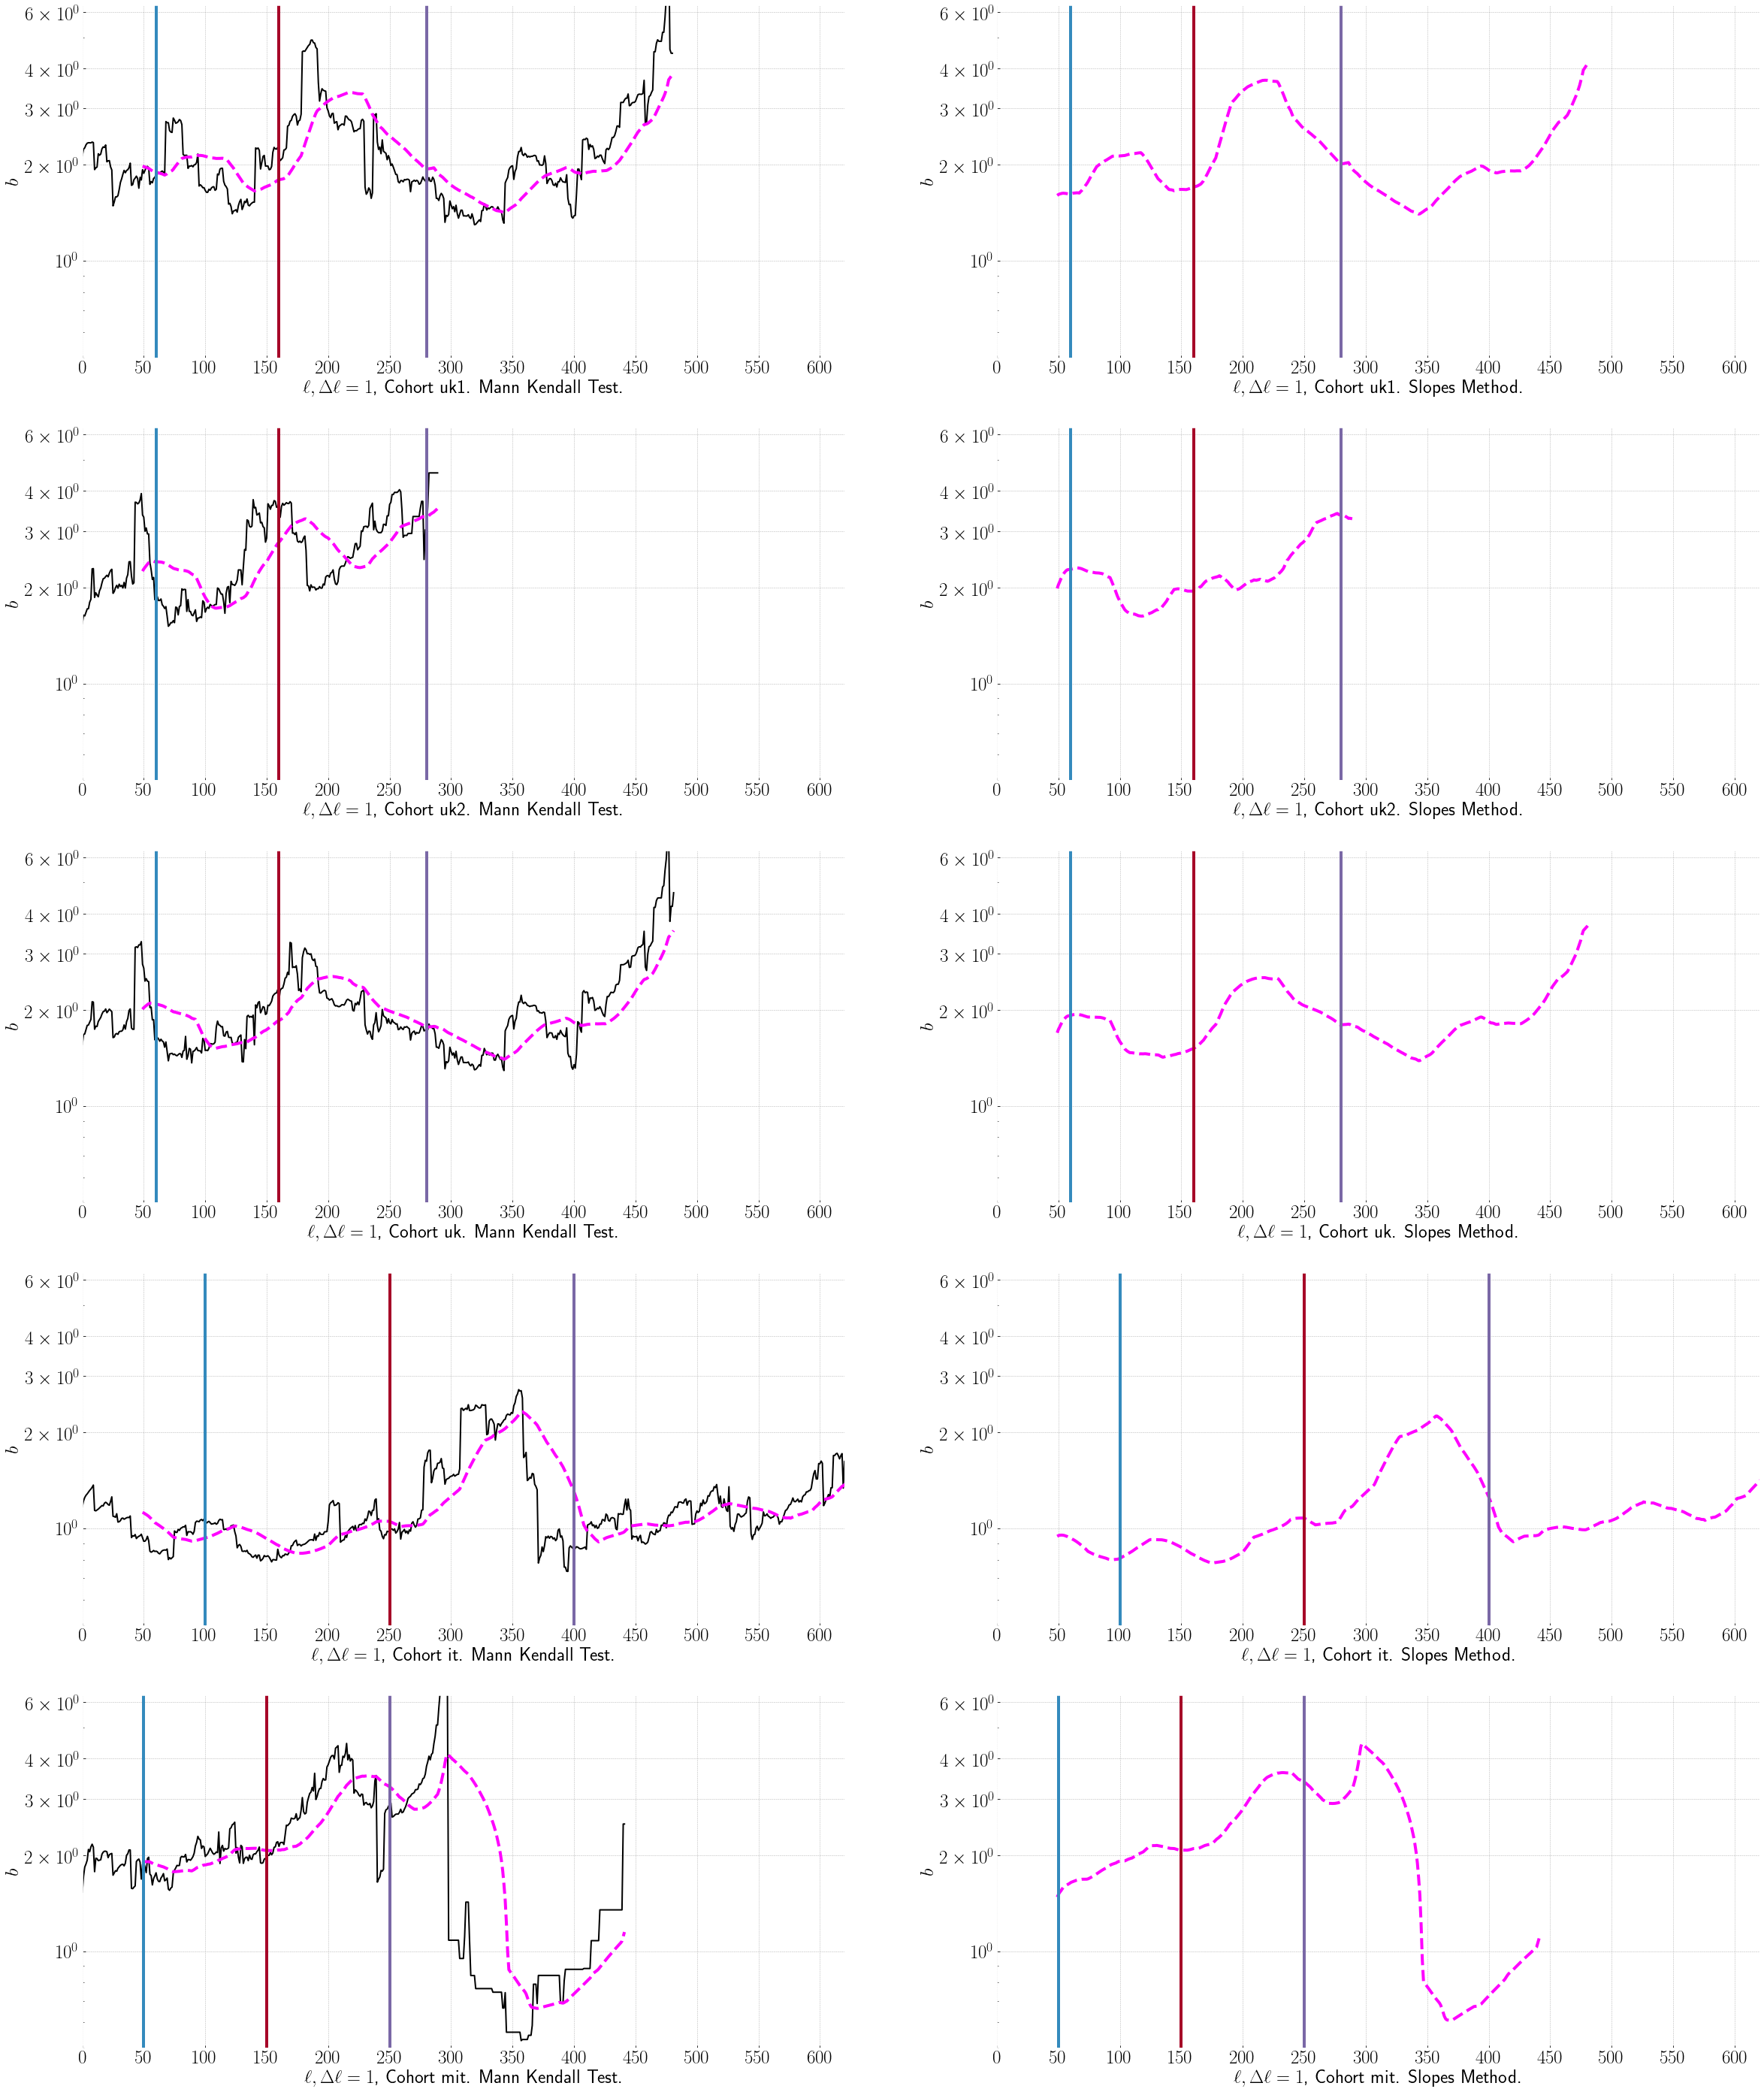

In [40]:
plt.figure(figsize=(20*2, 10*5))
p = 1
for c in ['uk1', 'uk2', 'uk', 'it', 'mit']:
    plt.subplot(5, 2, p)
    plt.xlabel(fr'$\ell, \Delta \ell = 1$, Cohort {c}. Mann Kendall Test.')
    plt.ylabel(r'$b$')
    plt.semilogy()
    plt.xlim(0, 620)
    plt.ylim(0.5, 6.3)
    plt.yticks([1, 2, 3, 4, 6], [r'$10^0$', r'$2\times10^0$', r'$3\times 10^0$', r'$4\times 10^0$', r'$6\times 10^0$'])
    plt.xticks(range(0, 620, 50))
    plt.plot([x + 0 for x in fa[c]['mk'].index], fa[c]['mk'][0], markersize=8, ls="solid", c="black", lw=2)
    plt.plot([x + 0 for x in fa[c]['mk'].index], fa[c]['mk']['ma50'], marker="", ls="dashed", c='magenta', lw=4)
    if c == 'mit':
        plt.axvline(50, ls="solid", lw=4, c=colors[0])
        plt.axvline(150, ls="solid", lw=4, c=colors[1])
        plt.axvline(250, ls="solid", lw=4, c=colors[2])
    elif c == 'it':
        plt.axvline(100, ls="solid", lw=4, c=colors[0])
        plt.axvline(250, ls="solid", lw=4, c=colors[1])
        plt.axvline(400, ls="solid", lw=4, c=colors[2])
    else:
        plt.axvline(60, ls="solid", lw=4, c=colors[0])
        plt.axvline(160, ls="solid", lw=4, c=colors[1])
        plt.axvline(280, ls="solid", lw=4, c=colors[2])
    p += 1
    
    plt.subplot(5, 2, p)
    plt.xlabel(fr'$\ell, \Delta \ell = 1$, Cohort {c}. Slopes Method.')
    plt.ylabel(r'$b$')
    plt.semilogy()
    plt.xlim(0, 620)
    plt.ylim(0.5, 6.3)
    plt.yticks([1, 2, 3, 4, 6], [r'$10^0$', r'$2\times10^0$', r'$3\times 10^0$', r'$4\times 10^0$', r'$6\times 10^0$'])
    plt.xticks(range(0, 620, 50))
    #plt.plot([x + 50 for x in fa[c]['slopes'].index], fa[c]['slopes'][0], markersize=8, ls="solid", c="black", lw=2)
    plt.plot([x + 0 for x in fa[c]['slopes'].index], fa[c]['slopes']['ma50'], marker="", ls="dashed", c='magenta', lw=4)
    if c == 'mit':
        plt.axvline(50, ls="solid", lw=4, c=colors[0])
        plt.axvline(150, ls="solid", lw=4, c=colors[1])
        plt.axvline(250, ls="solid", lw=4, c=colors[2])
    elif c == 'it':
        plt.axvline(100, ls="solid", lw=4, c=colors[0])
        plt.axvline(250, ls="solid", lw=4, c=colors[1])
        plt.axvline(400, ls="solid", lw=4, c=colors[2])
    else:
        plt.axvline(60, ls="solid", lw=4, c=colors[0])
        plt.axvline(160, ls="solid", lw=4, c=colors[1])
        plt.axvline(280, ls="solid", lw=4, c=colors[2])
    p += 1

In [41]:
faslopes = {}
faslopes['uk'] = fa['uk']['slopes'].loc[fa['uk']['slopes'].index <= 300]
faslopes['uk1'] = fa['uk1']['slopes'].loc[fa['uk1']['slopes'].index <= 300]
faslopes['uk2'] = fa['uk2']['slopes'].loc[fa['uk2']['slopes'].index <= 300]
faslopes['it'] = fa['it']['slopes'].loc[fa['it']['slopes'].index <= 420]
faslopes['mit'] = fa['mit']['slopes'].loc[fa['mit']['slopes'].index <= 300]

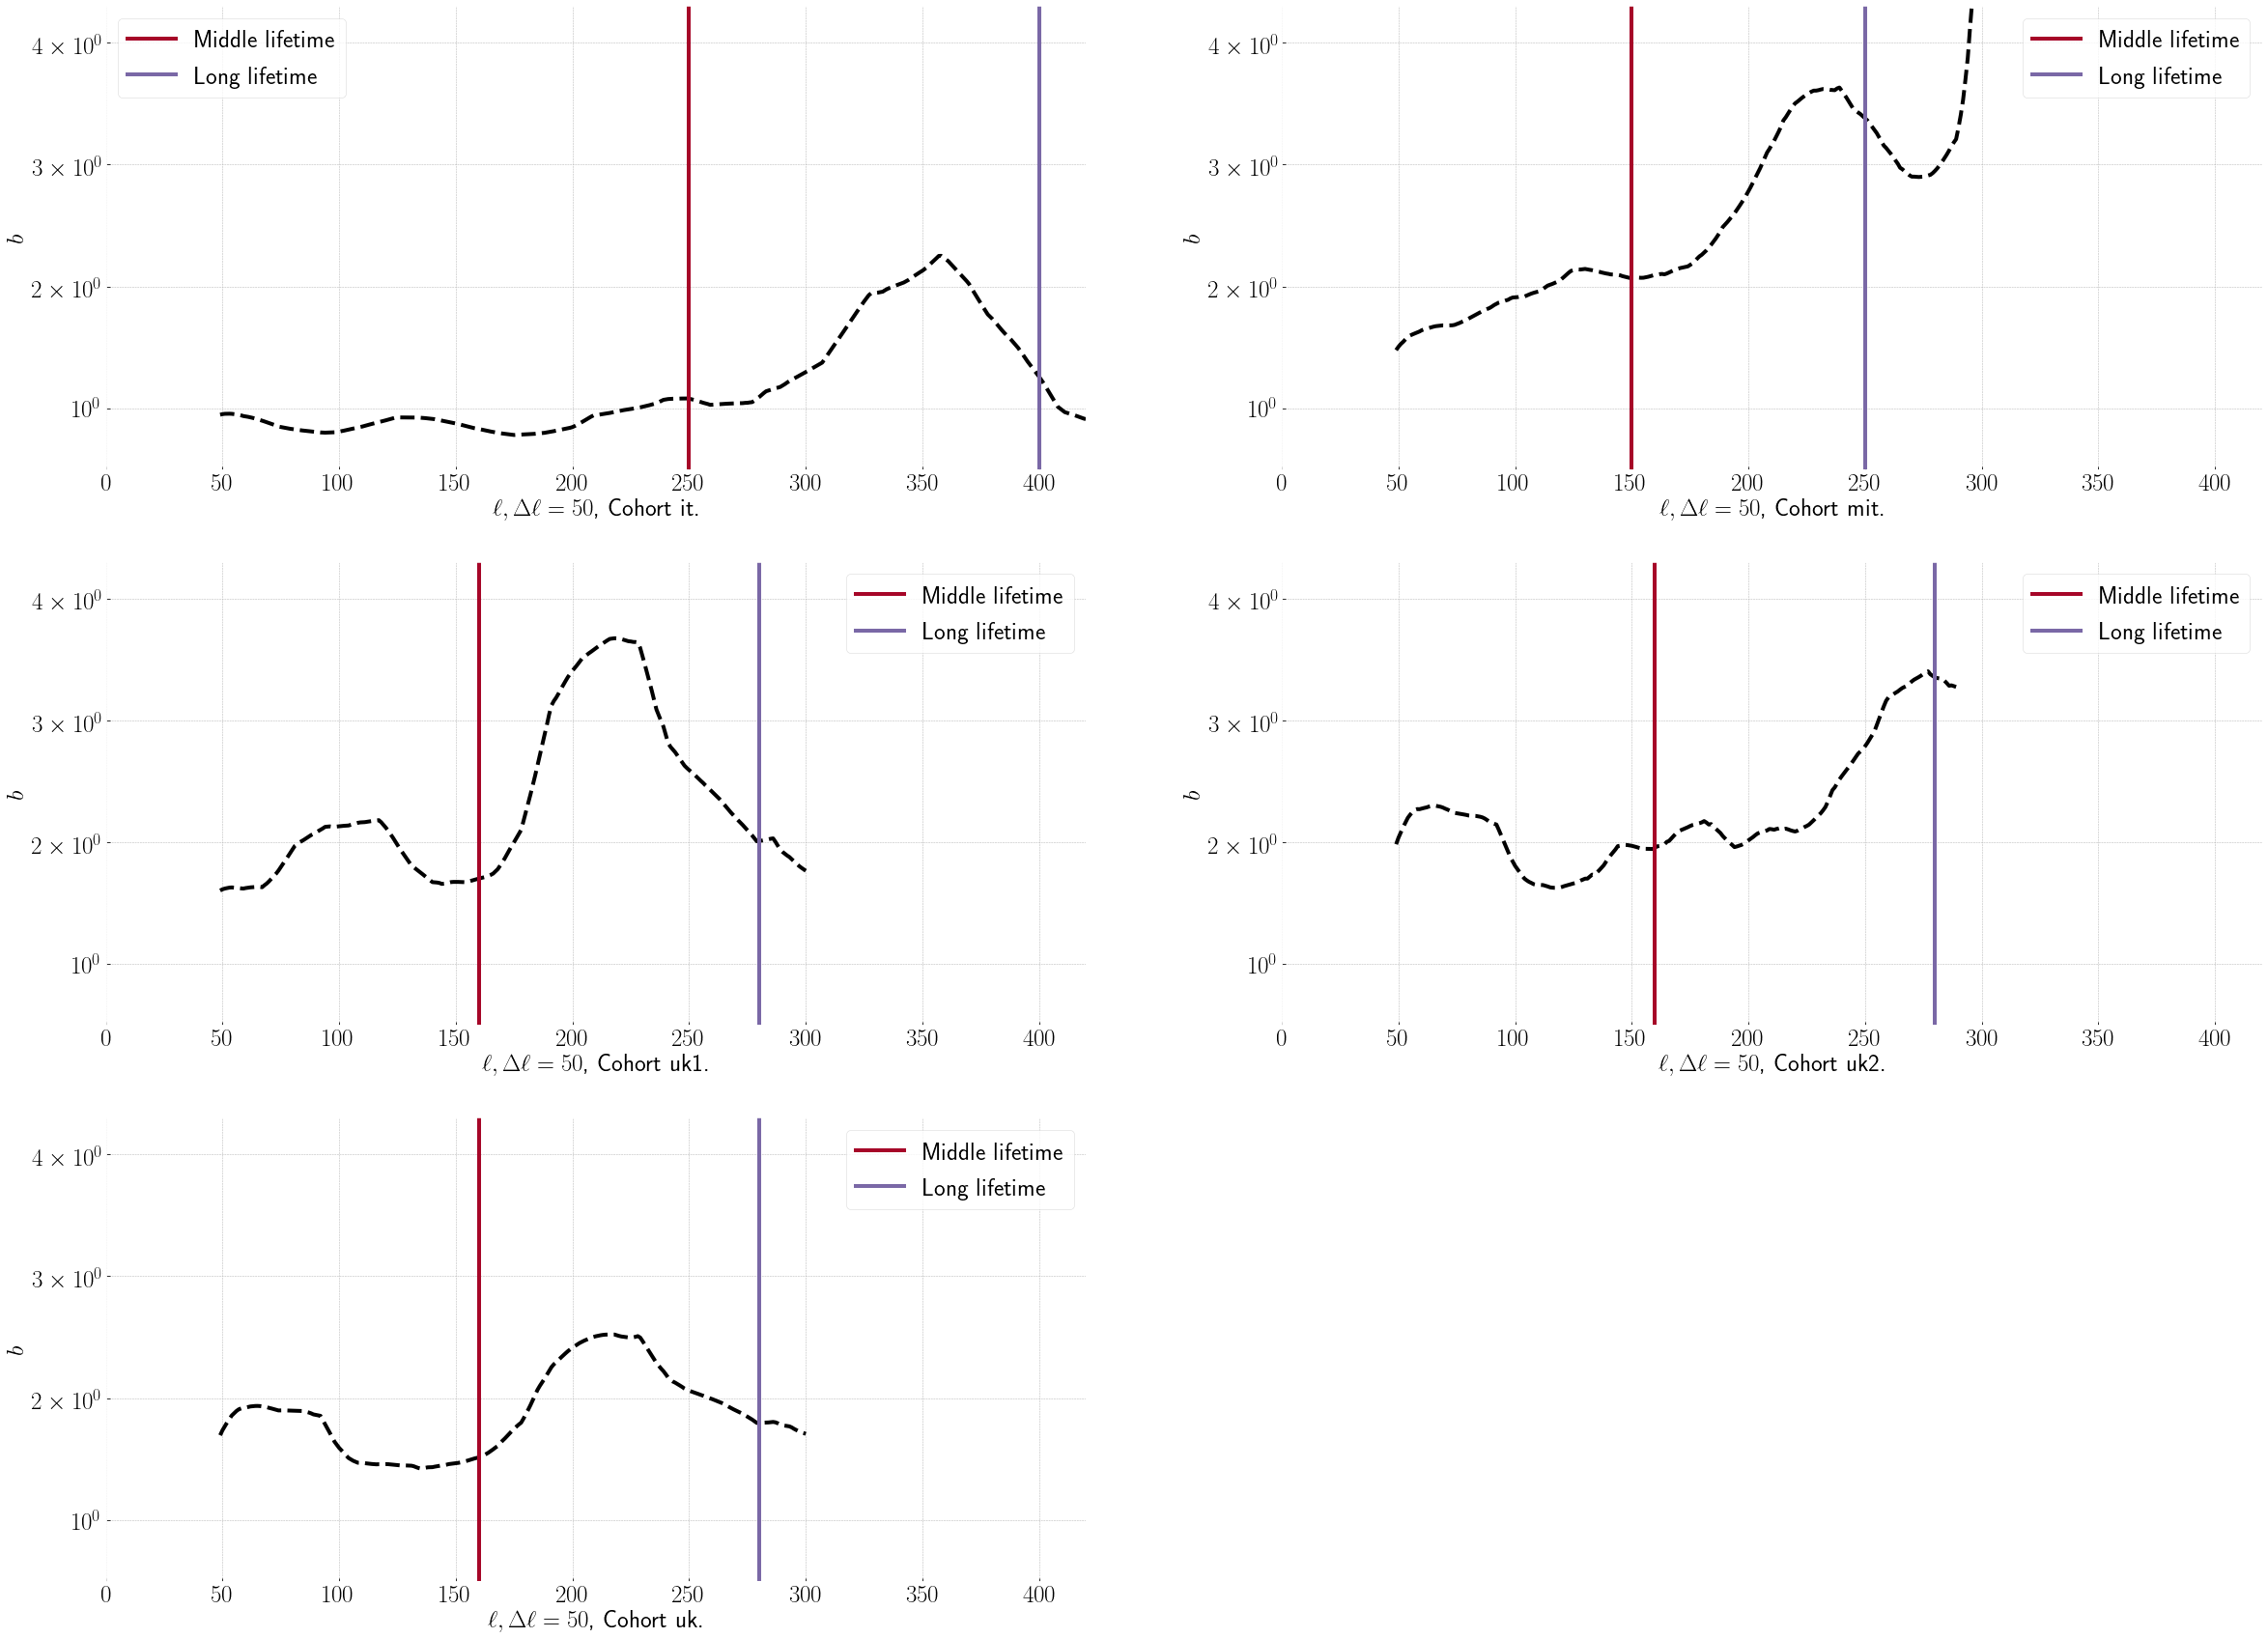

In [42]:
plt.figure(figsize=(20*2, 10*3))
p = 1
for c in ['it', 'mit', 'uk1', 'uk2', 'uk']:
    plt.subplot(3, 2, p)
    plt.xlabel(fr'$\ell, \Delta \ell = 50$, Cohort {c}.')
    plt.ylabel(r'$b$')
    #plt.semilogy()
    plt.xlim(0, 420)
    plt.ylim(0.5, 4.3)
    plt.yticks([1, 2, 3, 4], [r'$10^0$', r'$2\times10^0$', r'$3\times 10^0$', r'$4\times 10^0$'])
    plt.xticks(range(0, 420, 50))
    #plt.plot([x + 0 for x in faslopes[c].index], faslopes[c][0], markersize=8, ls="solid", c="magenta", lw=2)
    plt.plot([x + 0 for x in faslopes[c].index], faslopes[c]['ma50'], marker="", ls="dashed", c='black', lw=4)
    if c == 'mit':
        #plt.axvline(50, ls="solid", lw=4, c=colors[0], label="Short lifetime")
        plt.axvline(150, ls="solid", lw=4, c=colors[1], label="Middle lifetime")
        plt.axvline(250, ls="solid", lw=4, c=colors[2], label="Long lifetime")
    elif c == 'it':
        #plt.axvline(100, ls="solid", lw=4, c=colors[0], label="Short lifetime")
        plt.axvline(250, ls="solid", lw=4, c=colors[1], label="Middle lifetime")
        plt.axvline(400, ls="solid", lw=4, c=colors[2], label="Long lifetime")
    else:
        #plt.axvline(60, ls="solid", lw=4, c=colors[0], label="Short lifetime")
        plt.axvline(160, ls="solid", lw=4, c=colors[1], label="Middle lifetime")
        plt.axvline(280, ls="solid", lw=4, c=colors[2], label="Long lifetime")
    p += 1
    plt.legend()

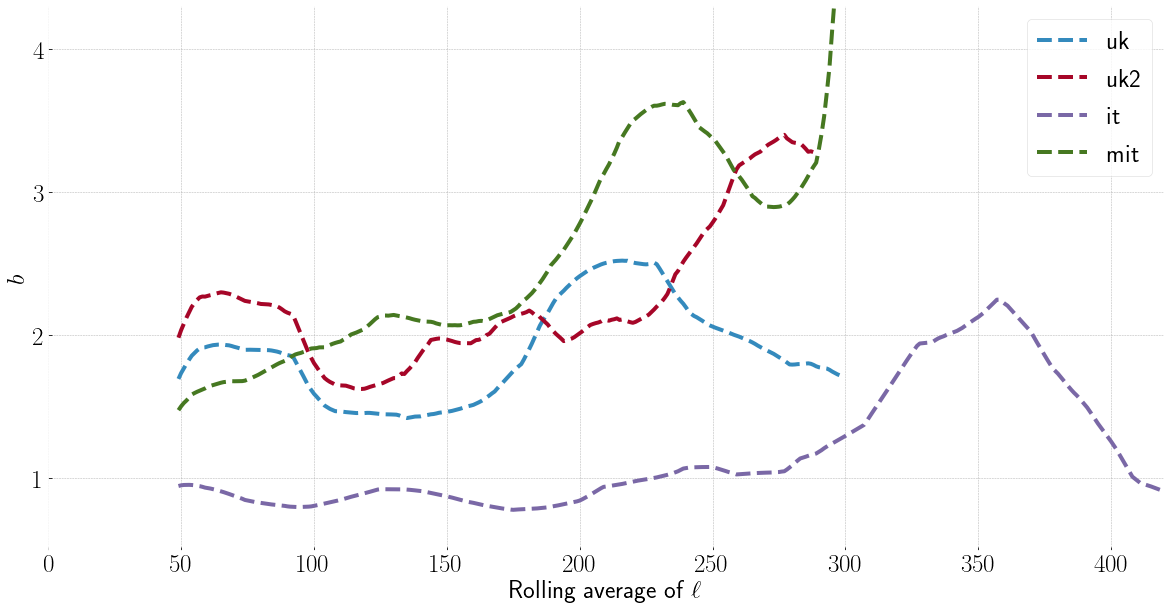

In [43]:
plt.figure(figsize=(20, 10))

plt.xlabel(fr'Rolling average of $\ell$')
plt.ylabel(r'$b$')
#plt.semilogy()
plt.xlim(0, 420)
plt.ylim(0.5, 4.3)
plt.yticks([1, 2, 3, 4])
plt.xticks(range(0, 420, 50))
for c in ['uk', 'uk2', 'it', 'mit']:
    plt.plot([x + 0 for x in faslopes[c].index], faslopes[c]['ma50'], marker="", ls="dashed",lw=4, label=c)
#plt.plot([x + 0 for x in faslopes[c].index], faslopes[c][0], markersize=8, ls="solid", c="magenta", lw=2)
    #plt.plot([x + 0 for x in faslopes[c].index], faslopes[c]['ma50'], marker="", ls="dashed",lw=4)
p += 1
plt.legend()

## Flag when the algorithm does not converge. 

I will only test the slopes algorithm, since it produced the most *smooth* results

In [44]:
def get_b_slopes(series, patternsize=3, FlagConverge=False):
    allslopes = []
    X = list(series.index)
    N = len(X)
    xo, xf = X[0], X[-1]
    yo, yf = series.at[xo, 'f'], series.at[xf, 'f']
    slope = (yf - yo) / (xf - xo)
    allslopes.append(slope)
    for i in range(1, N):
        newx = X[i // 2: N - ((i + 1) // 2)]
        if len(newx) > 1:
            xo, xf = newx[0], newx[-1]
            yo, yf = series.at[xo, 'f'], series.at[xf, 'f']
            slope = (yf - yo) / (xf - xo)
            allslopes.append(slope)
        else:
            xo, xf = X[1], X[-2]
            df = series.loc[(series.index >= xo) & (series.index <= xf)]
            yo = np.mean(df['f'])
            yf = yo
            if FlagConverge:
                return [[xo, xf], [yo, yf], False]
            else:
                return [[xo, xf], [yo, yf]]
        if (len(allslopes) >= patternsize):
            checkSlopes = list(np.sign(allslopes[-patternsize:]))
            if checkSlopes.count(checkSlopes[0]) != len(checkSlopes):
                df = series.loc[(series.index >= xo) & (series.index <= xf)]
                yo = np.mean(df['f'])
                yf = yo
                if FlagConverge:
                    return [[xo, xf], [yo, yf], True]
                else:
                    return [[xo, xf], [yo, yf]]

In [45]:
t0 = dt.datetime.now()
fa = {}
converge = {}
for c in ['uk', 'uk1', 'uk2', 'it', 'mit']:
    fa[c] = {}
    converge[c] = {}
    for ell in range(maxa[c]):
        if c == 'it':
            curve  = {'f': pc.get_avgfa(itdffa15[60], itlives[60], ell, ell + 50)}
        else:
            curve = pc.get_fal(calls[c], ell, ell + 50, 15)
        if len(curve['f']) > 3:
            points = get_b_slopes(curve['f'], FlagConverge=True)
            fa[c][ell] = points[1][1]
            converge[c][ell] = points[2]
    fa[c] = pd.DataFrame.from_dict(fa[c], orient='index').sort_index().rename({0: 'b'}, axis='columns')
    tmp = pd.DataFrame.from_dict(converge[c], orient="index").sort_index().rename({0: 'converge'}, axis='columns')
    fa[c] = fa[c].merge(tmp, left_index=True, right_index=True, how='outer')
    fa[c]['ma50'] = fa[c]['b'].rolling(window=50).mean()
print(f'Took {dt.datetime.now() - t0}')

Took 0:03:06.818931


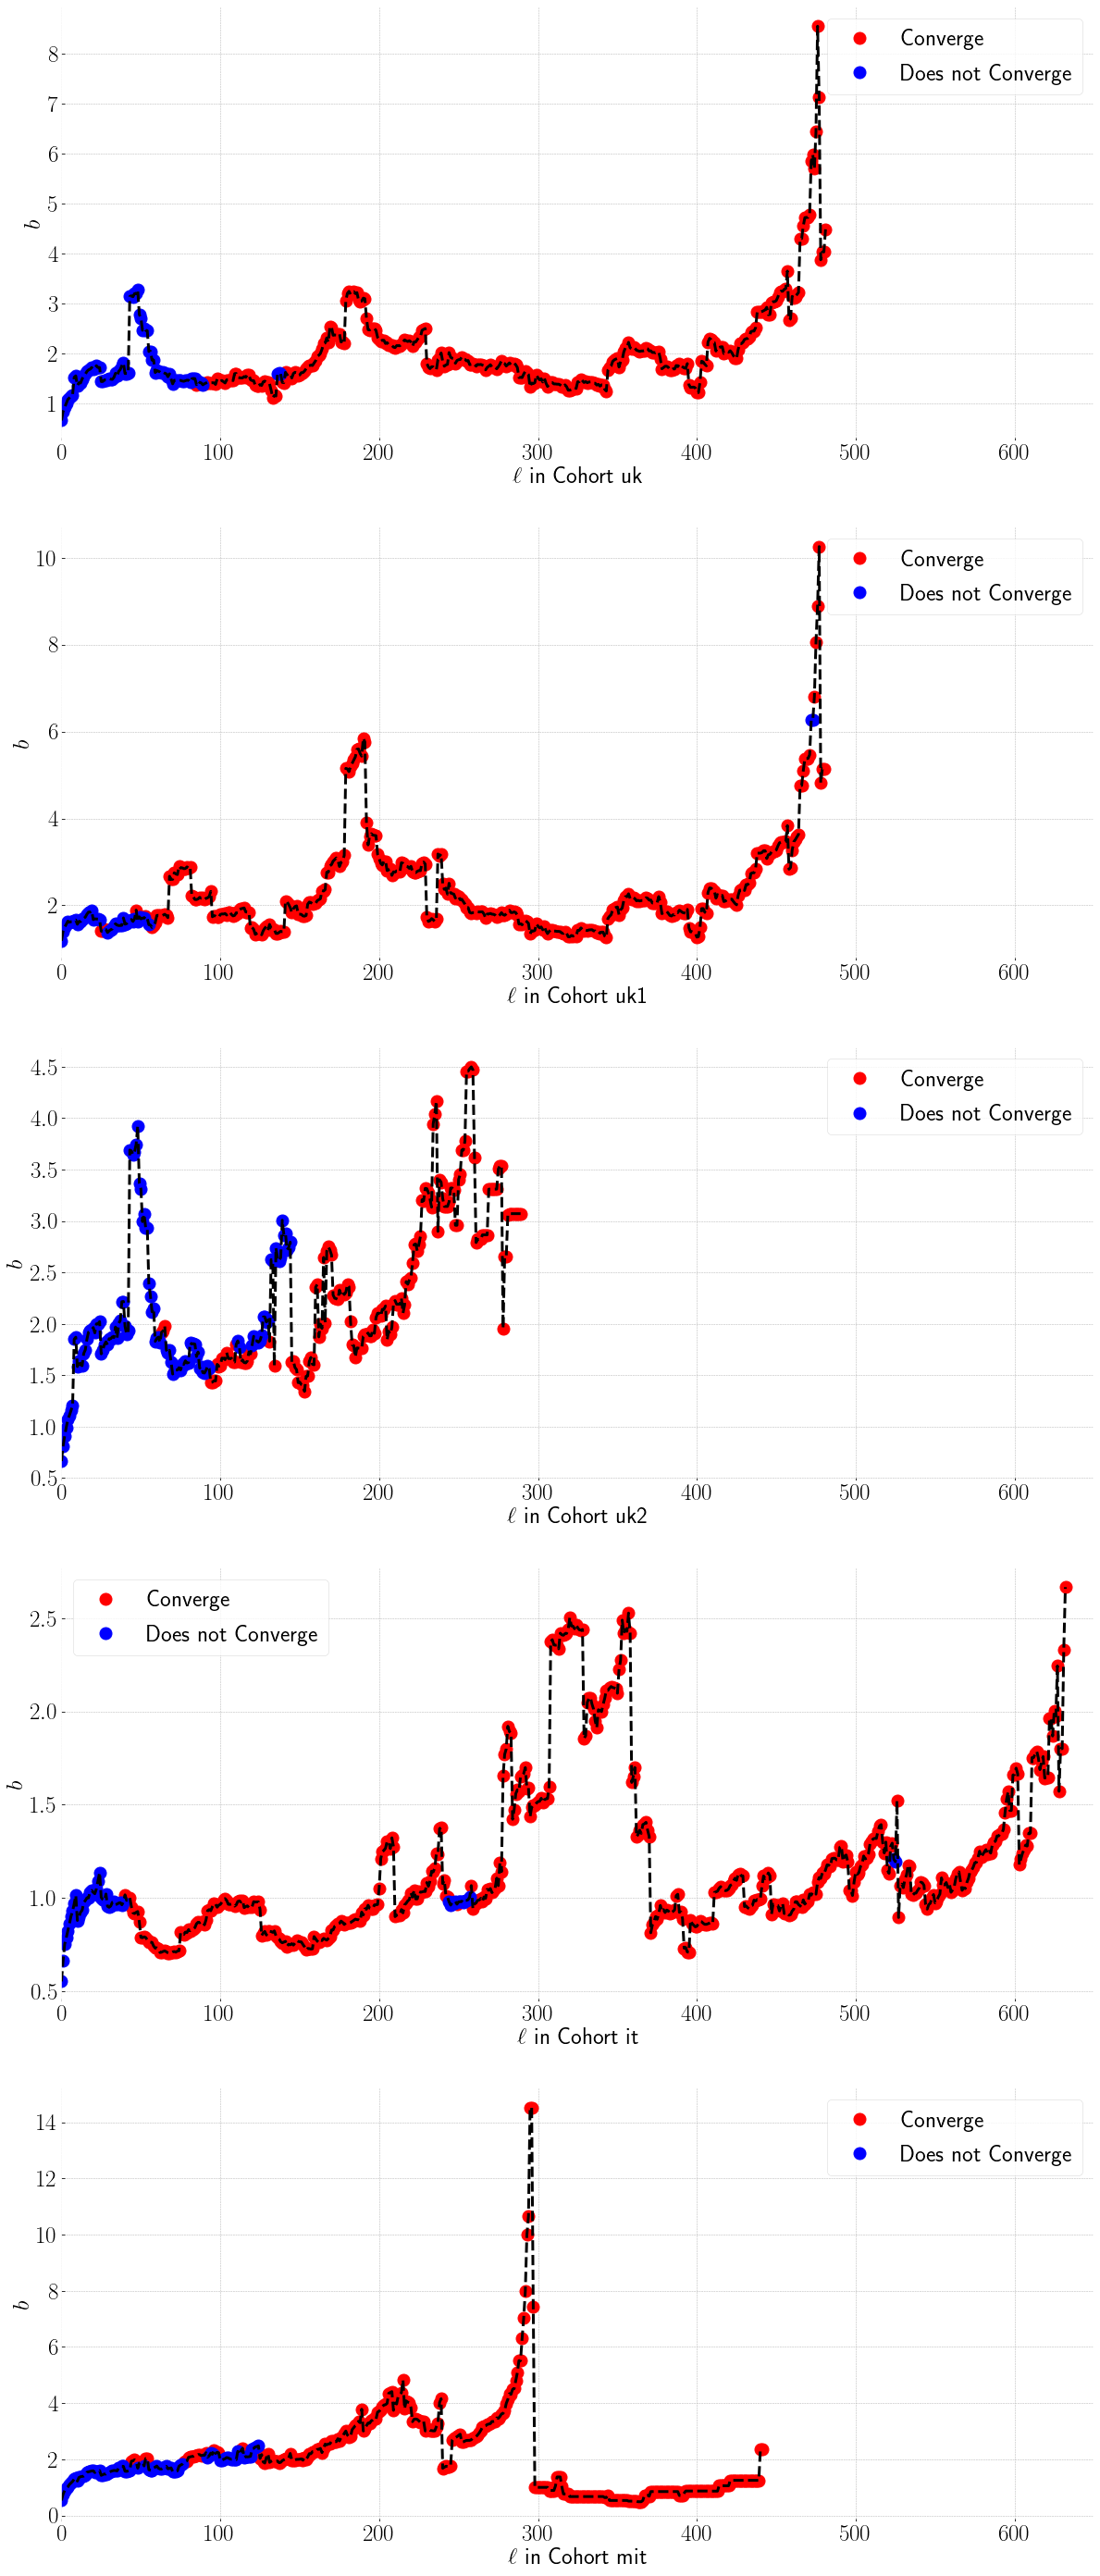

In [46]:
plt.figure(figsize=(20, 10*5))
p = 1
for c in ['uk', 'uk1', 'uk2', 'it', 'mit']:
    plt.subplot(5, 1, p)
    plt.xlabel(fr"$\ell$ in Cohort {c}")
    plt.ylabel(r"$b$")
    plt.xlim(0, 650)
    #plt.ylim(0.5, 4.3)
    df = fa[c].copy(deep=True)
    df1 = df.loc[df['converge'] == True]
    df2 = df.loc[df['converge'] == False]
    plt.plot(df1.index, df1['b'], marker="o", markersize=13, c="red", ls="", label="Converge")
    plt.plot(df2.index, df2['b'], marker="o", markersize=13, c="blue", ls="", label="Does not Converge")
    plt.plot(df.index, df['b'], marker="", ls="dashed", lw=3, c="black")
    plt.legend()
    p += 1

In [47]:
fa2 = {}
fa2['uk'] = fa['uk'].loc[fa['uk'].index <= 300]
fa2['uk2'] = fa['uk2'].loc[fa['uk2'].index <= 300]
fa2['it'] = fa['it'].loc[fa['it'].index <= 420]
fa2['mit'] = fa['mit'].loc[fa['mit'].index <= 300]

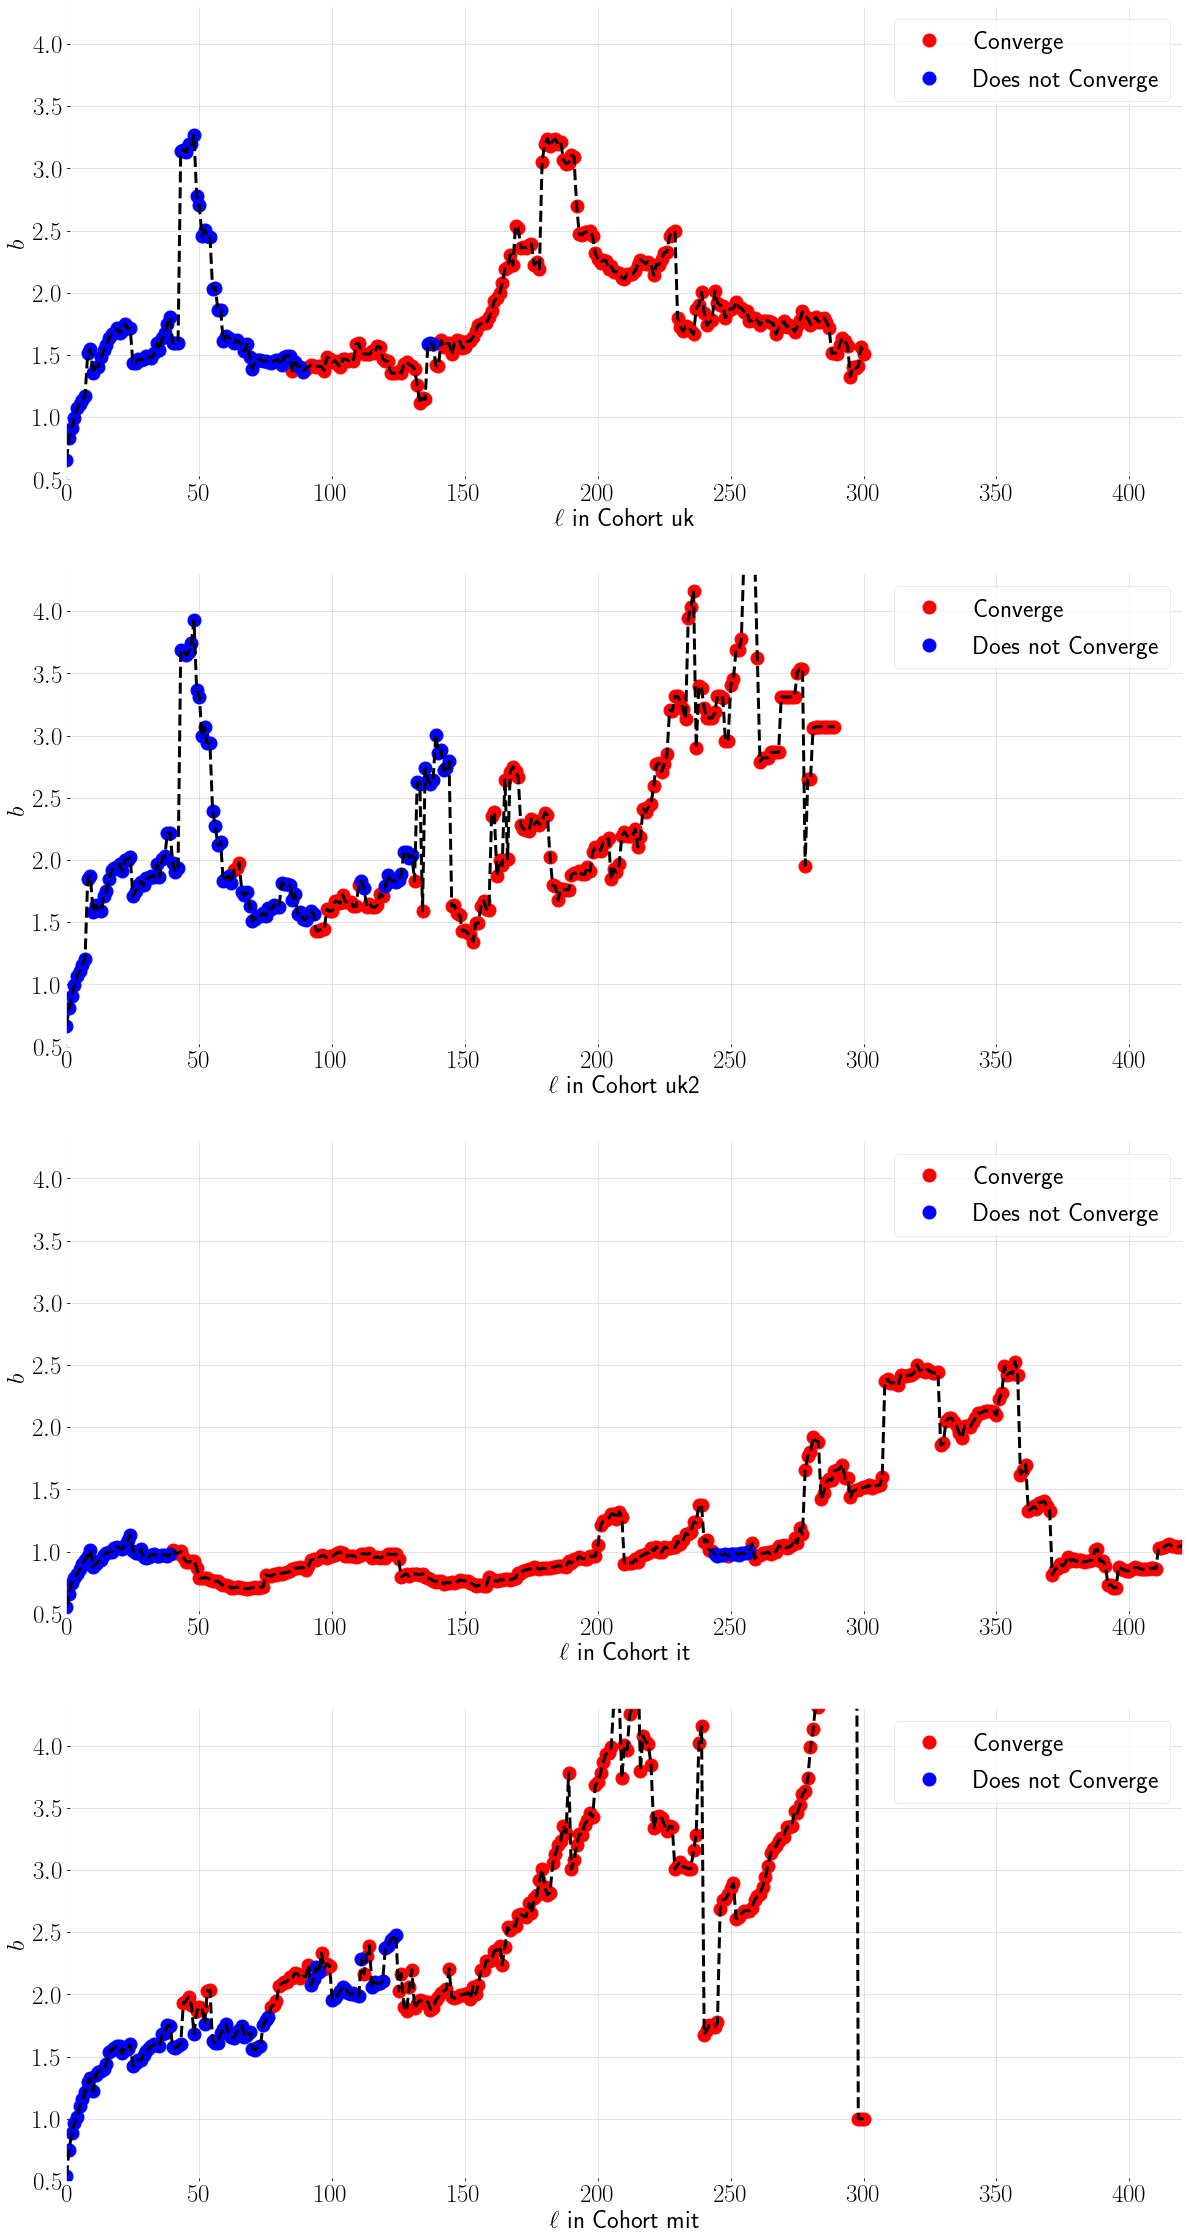

In [48]:
plt.figure(figsize=(20, 10*4))
p = 1
for c in ['uk', 'uk2', 'it', 'mit']:
    plt.subplot(4, 1, p)
    plt.xlabel(fr"$\ell$ in Cohort {c}")
    plt.ylabel(r"$b$")
    plt.xlim(0, 420)
    plt.ylim(0.5, 4.3)
    df = fa2[c].copy(deep=True)
    df1 = df.loc[df['converge'] == True]
    df2 = df.loc[df['converge'] == False]
    plt.plot(df1.index, df1['b'], marker="o", markersize=13, c="red", ls="", label="Converge")
    plt.plot(df2.index, df2['b'], marker="o", markersize=13, c="blue", ls="", label="Does not Converge")
    plt.plot(df.index, df['b'], marker="", ls="dashed", lw=3, c="black")
    plt.legend()
    p += 1

## Identify alters in UK2

There are some alter in UK2, particularly those with $50 \leq \ell \leq 100$ that present a higher than usual activity. To explore this *anomaly*, I will separate those alters and check what type of relationship they have with ego

In [49]:
t0 = dt.datetime.now()
import sys

# First, read the files and put them in a list
thefiles = os.listdir("../ukdata/egos_attributeSummaries/")

# now, remove everything that does not follow the structure 'egoxx_...'
for i in thefiles:
    if i[5] != '_':
        thefiles.remove(i)

# I need the following lines because MacOS creates a .DS_Store file
if sys.platform == 'darwin':
    thefiles.remove('.DS_Store')
        
# Next, a list with just the number of the egos.
theindices = [int(i[3:5]) for i in thefiles]

# And finally, everything into a dictionary.
alterinfo = {}
colnames = ['alterid', 'male', 'related', 'sameGen', 'ec1', 'ec2', 'ec3', 'alter_number1', 'alter_number2', 'alter_number3', 'alter_number4']
for i in range(len(thefiles)):
    alterinfo[theindices[i]] = pd.read_csv(f"../ukdata/egos_attributeSummaries/{thefiles[i]}", header=None, sep=" ", names=colnames, na_values=-999, 
                                           dtype={'alter_number1' : 'str', 'alter_number2' : 'str', 'alter_number3' : 'str', 'alter_number4' : 'str'})
    
thefiles = os.listdir("../ukdata/egos_alterNumbers/")
for i in thefiles:
    if i[5] != '_':
        thefiles.remove(i)
idx = [int(i[3:5]) for i in thefiles]
alterid = {}
for eid in range(len(idx)):
    df = pd.read_csv(f'../ukdata/egos_alterNumbers/{thefiles[eid]}', header=None, sep=" ", dtype={0: 'str'})
    tmp2 = {}
    for i in df.index:
        key = df.at[i, 0][-8:]
        val = df.at[i, 1]
        tmp2[key] = val
    alterid[idx[eid]] = tmp2

eid = pd.read_pickle("egoid.pkl")

ukcalls = unfiltered['uk'].copy(deep=True)
ukcalls = ukcalls.drop(columns=['rm'])

egonames = eid.groupby('ego')[['egoid']].mean().to_dict()['egoid']

ukcalls['eid'] = ukcalls['ego'].map(lambda i: egonames[i[-8:]])\

egoaltertable = {}
for ego in alterinfo.keys():
    egoaltertable[ego] = {}
    df = alterinfo[ego]
    for i in df.index:
        for an in ['alter_number1', 'alter_number2', 'alter_number3', 'alter_number4']:
            if not pd.isna(df.at[i, an]):
                number = df.at[i, an]
                egoaltertable[ego][number] = i
                
ukcalls['alter8'] = ukcalls['alter'].map(lambda i: i[-8:])
ukcalls['tmp'] = list(zip(ukcalls['eid'], ukcalls['alter8']))
ukcalls['aid'] = ukcalls['tmp'].map(lambda i: egoaltertable[i[0]].get(i[1], 9999))
ukcalls = ukcalls.drop(columns=['tmp'])
ukcalls = ukcalls.loc[ukcalls['aid'] != 9999]

ukcalls['eaid'] = list(zip(ukcalls['eid'], ukcalls['aid']))
tmp = list(ukcalls['eaid'].unique())
dftmp = pd.DataFrame({'eaid': tmp})
dftmp['family'] = dftmp['eaid'].map(lambda i: alterinfo[i[0]].at[i[1], 'related'])
for ego in alterinfo.keys():
    df = alterinfo[ego]
    df['ec'] = df[['ec1', 'ec2', 'ec3']].mean(axis=1, skipna=True)
dftmp['ec'] = dftmp['eaid'].map(lambda i: alterinfo[i[0]].at[i[1], 'ec'])
ukcalls = ukcalls.merge(dftmp, on='eaid', how='outer')
print(f'Took {dt.datetime.now() - t0}')
ukcalls.head()

Took 0:00:00.651064


ego           alter                time  uclock  aclock  eid  \
0  C07814508939  C0020165636994 2008-02-07 16:18:00     339       0   30   
1  C07814508939  C0020165636994 2008-02-07 17:11:00     339       0   30   
2  C07814508939  C0020165636994 2008-02-20 15:39:00     352      13   30   
3  C07792658311  C0021213487966 2008-02-27 17:01:00     359       0   11   
4  C07792658311  C0021213487966 2008-02-27 17:55:00     359       0   11   

     alter8  aid       eaid  family  ec  
0  65636994  177  (30, 177)     NaN NaN  
1  65636994  177  (30, 177)     NaN NaN  
2  65636994  177  (30, 177)     NaN NaN  
3  13487966  182  (11, 182)     NaN NaN  
4  13487966  182  (11, 182)     NaN NaN

In [50]:
calls['uk'].head()

ego         alter                time  uclock  aclock   rm
0  C07779270485  C01132304499 2007-09-26 08:42:00     204       0  0.0
1  C07779270485  C01132304499 2007-10-05 14:32:00     214      10  0.0
2  C07779270485  C01132304499 2007-10-27 01:11:00     235      31  0.0
3  C07779270485  C01132304499 2008-01-09 20:35:00     310     106  0.0
4  C07779270485  C01132416800 2008-05-06 02:16:00     427       0  0.0

In [51]:
ukcalls.head()

ego           alter                time  uclock  aclock  eid  \
0  C07814508939  C0020165636994 2008-02-07 16:18:00     339       0   30   
1  C07814508939  C0020165636994 2008-02-07 17:11:00     339       0   30   
2  C07814508939  C0020165636994 2008-02-20 15:39:00     352      13   30   
3  C07792658311  C0021213487966 2008-02-27 17:01:00     359       0   11   
4  C07792658311  C0021213487966 2008-02-27 17:55:00     359       0   11   

     alter8  aid       eaid  family  ec  
0  65636994  177  (30, 177)     NaN NaN  
1  65636994  177  (30, 177)     NaN NaN  
2  65636994  177  (30, 177)     NaN NaN  
3  13487966  182  (11, 182)     NaN NaN  
4  13487966  182  (11, 182)     NaN NaN

In [52]:
ukdf = {}
ukdf['ukfa'] = ukcalls.loc[ukcalls['family'] == 1]
ukdf['ukfr'] = ukcalls.loc[ukcalls['family'] == 0]
ukdf['ukuc'] = ukcalls.loc[(ukcalls['family'] != 0) & (ukcalls['family'] != 1)]

In [53]:
for c in ukdf.keys():
    ukdf[c] = pc.apply_filters(ukdf[c], 60)
    maxa[c] = max(ukdf[c]['aclock'])

In [54]:
ukcalls = pc.apply_filters(ukcalls, 60)
ukcalls['ea'] = list(zip(ukcalls['ego'], ukcalls['alter'], ukcalls['time']))
print(1, len(ukcalls))
uk = {}
for c in ['uk', 'uk2']:
    df = calls[c].copy(deep=True)
    print(2, len(df))
    df2 = ukcalls[['ea', 'family']]
    print(3, len(df2))
    df['ea'] = list(zip(df['ego'], df['alter'], df['time']))
    print(3.5, len(df))
    df = df.merge(df2, left_on='ea', right_on='ea', how='left')
    print(4, len(df))
    df = df.drop(['ea'], axis='columns')
    uk[c] = df

1 35610
2 35638
3 35610
3.5 35638
4 35638
2 13493
3 35610
3.5 13493
4 13493


In [55]:
lf = {}
for c in uk.keys():
    uk[c]['ea'] = list(zip(uk[c]['ego'], uk[c]['alter']))
    lf[c] = uk[c].groupby('ea')[['aclock']].max().rename({'aclock': 'ell'}, axis='columns')

In [56]:
tmplives = {}
for c in uk.keys():
    tmplives[c] = pc.lives_dictionary(uk[c])

In [57]:
for c in uk.keys():
    uk[c]['ell'] = uk[c]['ea'].map(lambda i: tmplives[c][i[0]][i[1]]['ell'])

In [58]:
t0 = dt.datetime.now()
for c in ukdf.keys():
    fa[c] = {}
    converge[c] = {}
    for ell in range(maxa[c]):
        curve = pc.get_fal(ukdf[c], ell, ell + 50, 15)
        if len(curve['f']) > 3:
            points = get_b_slopes(curve['f'], FlagConverge=True)
            fa[c][ell] = points[1][1]
            converge[c][ell] = points[2]
    fa[c] = pd.DataFrame.from_dict(fa[c], orient='index').sort_index().rename({0: 'b'}, axis='columns')
    tmp = pd.DataFrame.from_dict(converge[c], orient="index").sort_index().rename({0: 'converge'}, axis='columns')
    fa[c] = fa[c].merge(tmp, left_index=True, right_index=True, how='outer')
    fa[c]['ma50'] = fa[c]['b'].rolling(window=50).mean()
print(f'Took {dt.datetime.now() - t0}')

Took 0:01:09.143876


In [59]:
for c in ['ukfa', 'ukfr', 'ukuc']:
    fa2[c] = fa[c].loc[fa[c].index <= 300]
    print(c, len(fa2[c]))

ukfa 285
ukfr 301
ukuc 301


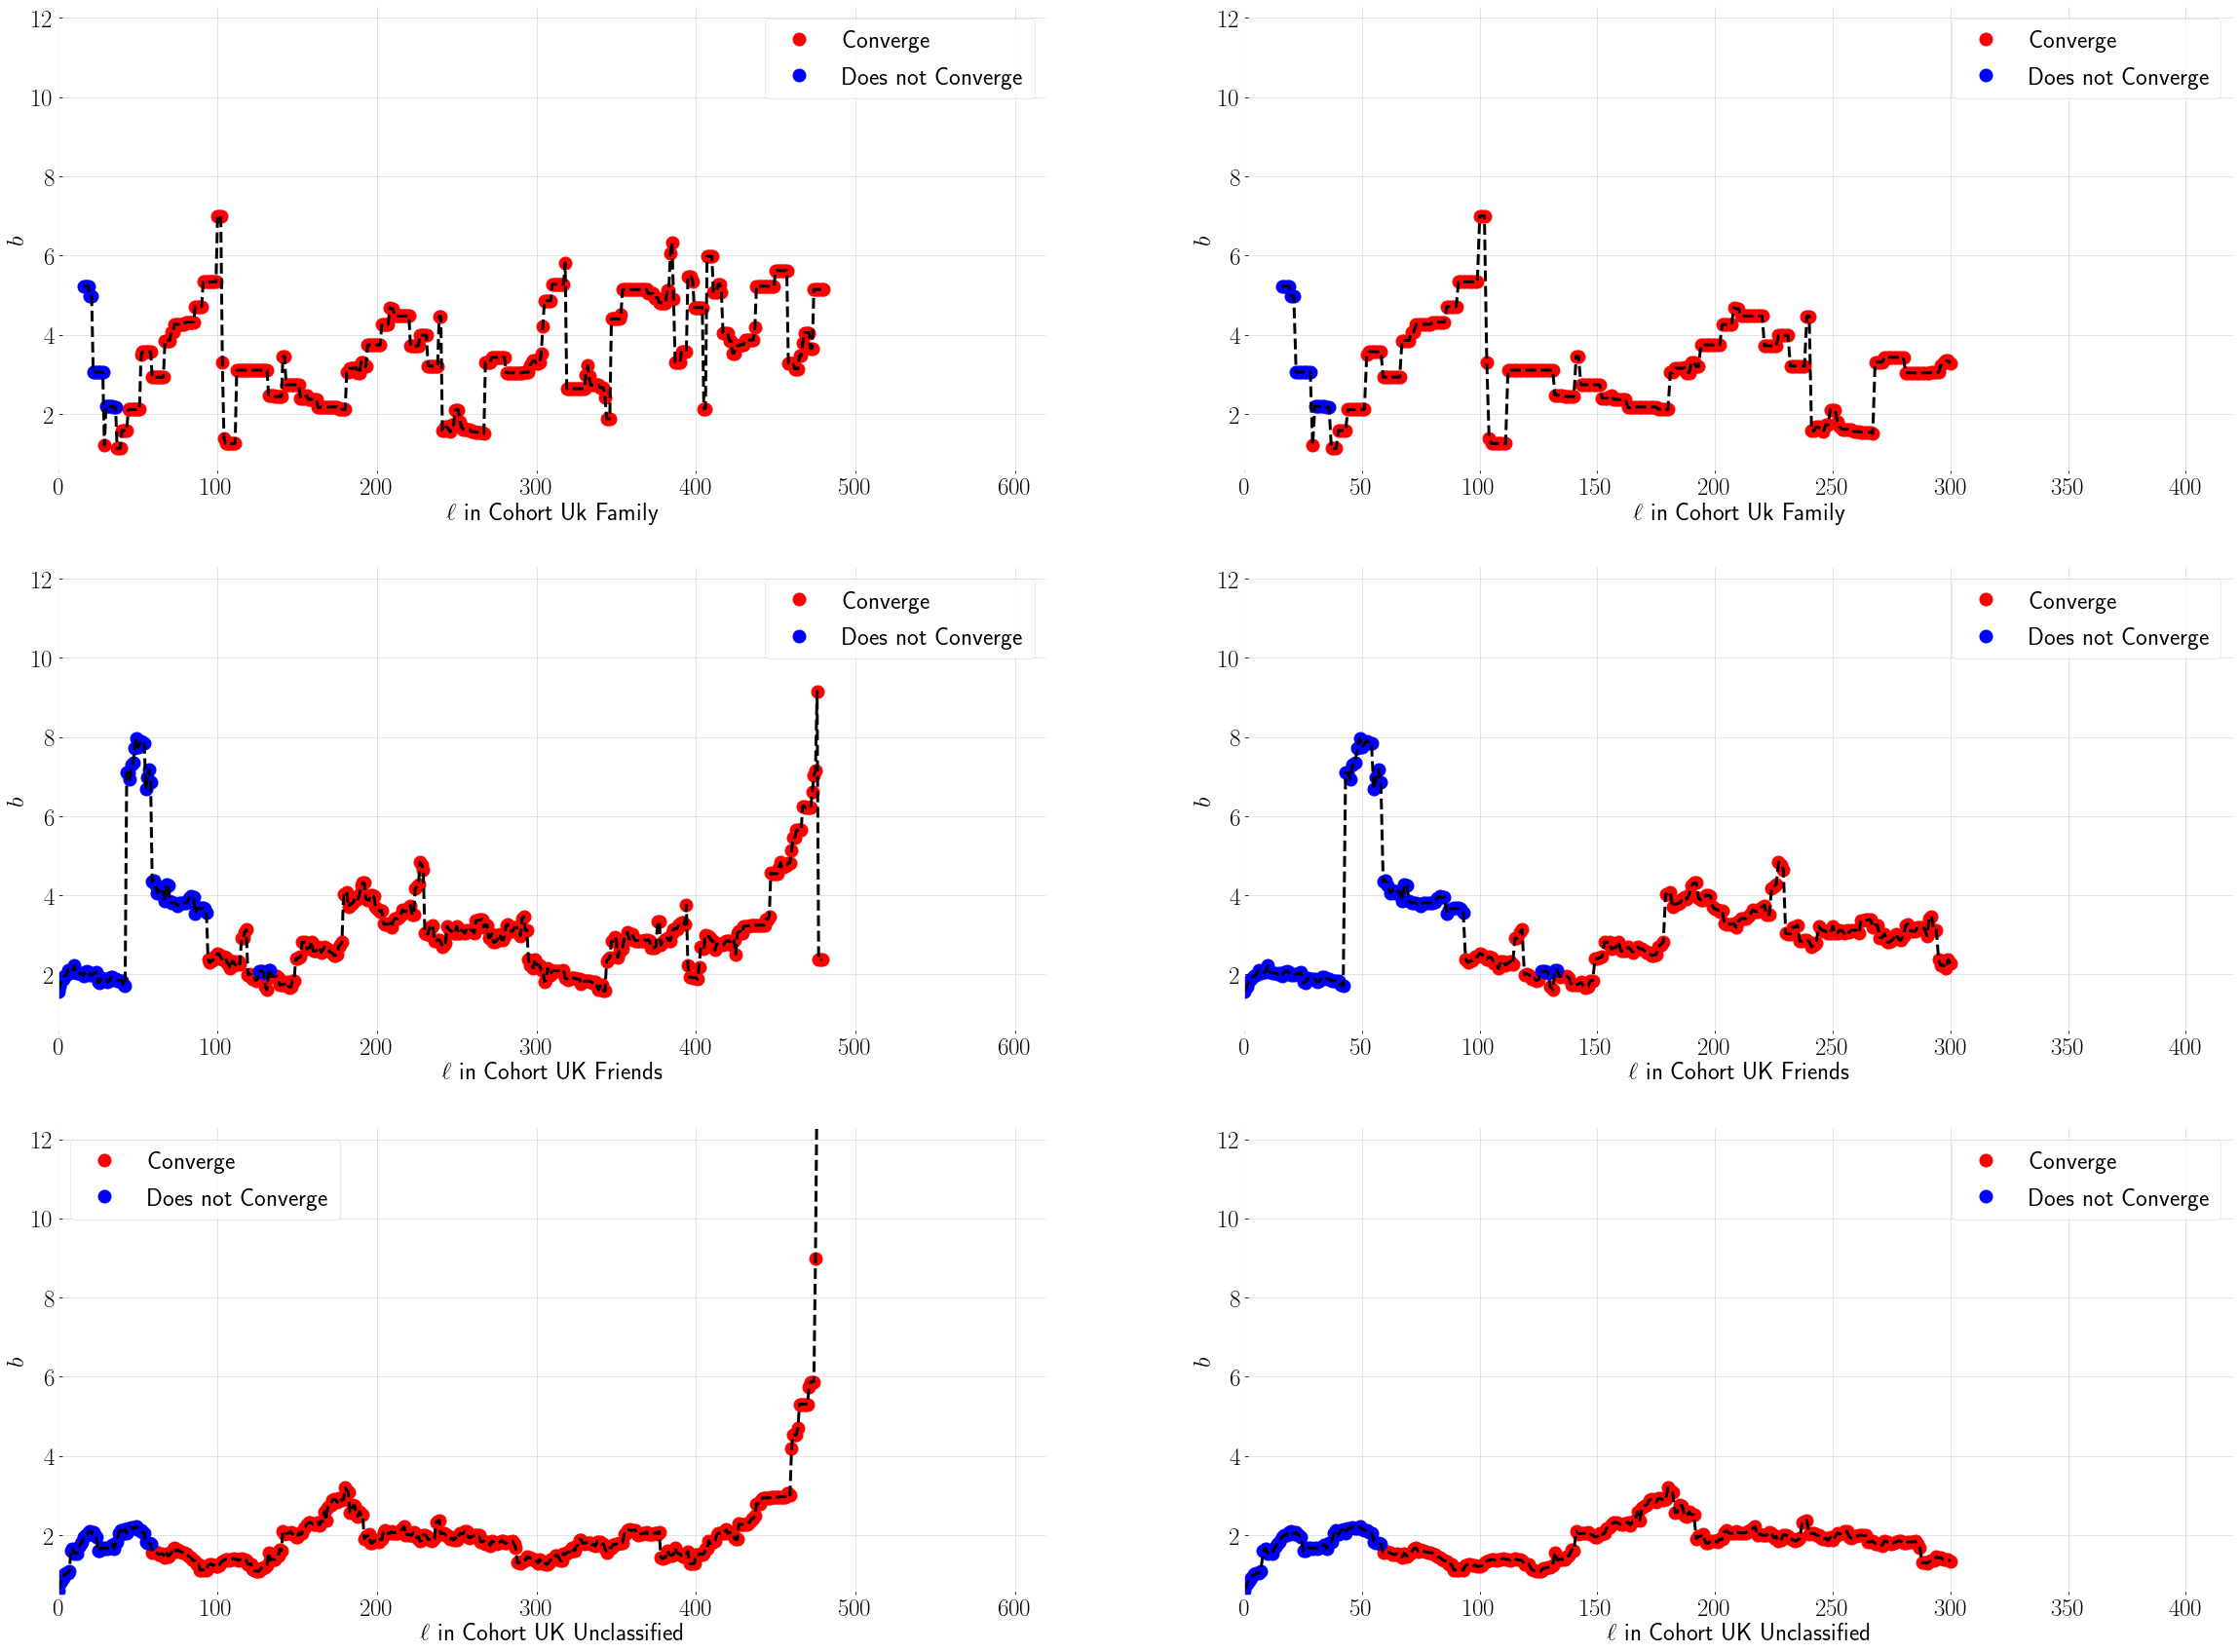

In [60]:
plt.figure(figsize=(20*2, 10*3))
p = 1
cohorts = ['Uk Family', 'UK Friends', 'UK Unclassified']
for c in ukdf.keys():
    plt.subplot(3, 2, p)
    plt.xlabel(fr"$\ell$ in Cohort {cohorts[(p - 1) // 2]}")
    plt.ylabel(r"$b$")
    plt.xlim(0, 620)
    plt.ylim(0.5, 12.3)
    df = fa[c].copy(deep=True)
    df1 = df.loc[df['converge'] == True]
    df2 = df.loc[df['converge'] == False]
    plt.plot(df1.index, df1['b'], marker="o", markersize=13, c="red", ls="", label="Converge")
    plt.plot(df2.index, df2['b'], marker="o", markersize=13, c="blue", ls="", label="Does not Converge")
    plt.plot(df.index, df['b'], marker="", ls="dashed", lw=3, c="black")
    plt.legend()
    p += 1
    
    plt.subplot(3, 2, p)
    plt.xlabel(fr"$\ell$ in Cohort {cohorts[(p - 1) // 2]}")
    plt.ylabel(r"$b$")
    plt.xlim(0, 420)
    plt.ylim(0.5, 12.3)
    df = fa2[c].copy(deep=True)
    df1 = df.loc[df['converge'] == True]
    df2 = df.loc[df['converge'] == False]
    plt.plot(df1.index, df1['b'], marker="o", markersize=13, c="red", ls="", label="Converge")
    plt.plot(df2.index, df2['b'], marker="o", markersize=13, c="blue", ls="", label="Does not Converge")
    plt.plot(df.index, df['b'], marker="", ls="dashed", lw=3, c="black")
    plt.legend()
    p += 1

In [61]:
len(ukcalls.loc[ukcalls['family'] == 1]['eaid'].unique())

78

In [62]:
len(ukcalls.loc[ukcalls['family'] == 0]['eaid'].unique())

435

In [63]:
fa3 = {}
c3 = {}
pfam = {}
t0 = dt.datetime.now()
for c in ['uk', 'uk2']:
    fa3[c] = {}
    c3[c] = {}
    pfam[c] = {}
    for ell in range(maxa[c]):
        curve = pc.get_fal(uk[c], ell, ell + 50, 15)
        if len(curve['f']) > 3:
            points = get_b_slopes(curve['f'], FlagConverge=True)
            fa3[c][ell] = points[1][1]
            converge[c][ell] = points[2]
            df = uk[c].loc[(uk[c]['ell'] >= ell) & (uk[c]['ell'] <= ell + 50)]
            df = df.loc[df['family'] <= 2]
            fam = df.groupby('ea')[['family']].max()
            if 1 in fam['family'].value_counts().index:
                pfam[c][ell] = fam['family'].value_counts()[1] / len(fam)
            else:
                pfam[c][ell] = 0
    fa3[c] = pd.DataFrame.from_dict(fa3[c], orient='index').sort_index().rename({0: 'b'}, axis='columns')
    tmp = pd.DataFrame.from_dict(converge[c], orient="index").sort_index().rename({0: 'converge'}, axis='columns')
    tmp2 = pd.DataFrame.from_dict(pfam[c], orient="index").sort_index().rename({0: 'pfam'}, axis='columns')
    fa3[c] = fa3[c].merge(tmp, left_index=True, right_index=True, how='outer')
    fa3[c] = fa3[c].merge(tmp2, left_index=True, right_index=True, how='outer')
    fa3[c]['ma50'] = fa3[c]['b'].rolling(window=50).mean()
print(f'Took {dt.datetime.now() - t0}')

Took 0:01:03.255280


In [64]:
tmp = fa3['uk'].copy(deep=True)

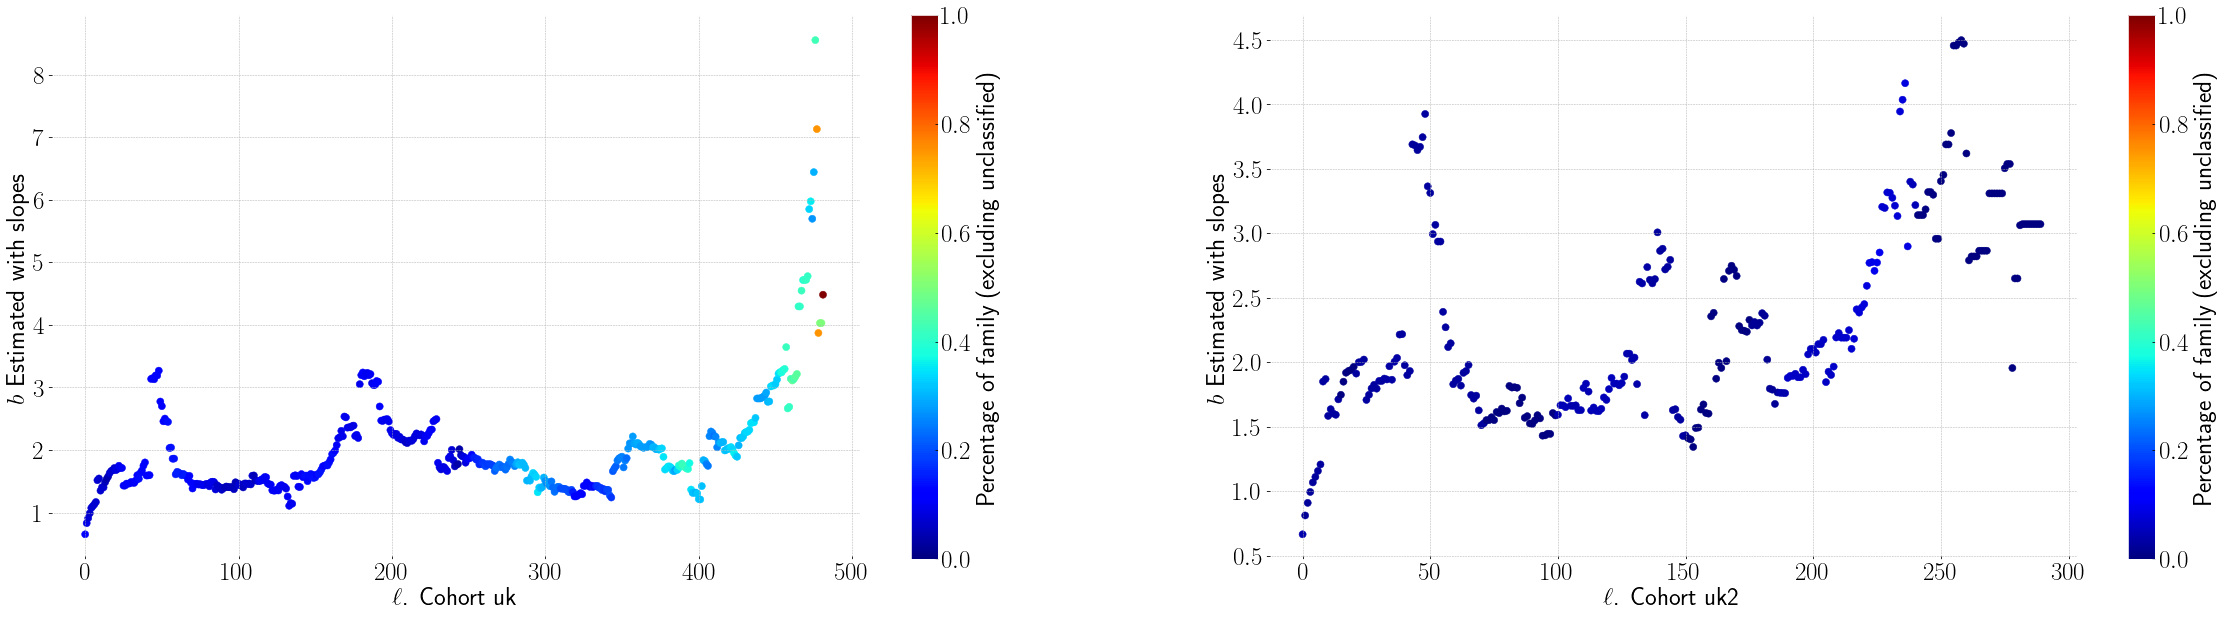

In [65]:
cm = plt.cm.get_cmap('jet')
plt.figure(figsize=(40, 10))
p = 1
for c in fa3.keys():
    plt.subplot(1, 2, p)
    plt.xlabel(fr"$\ell$. Cohort {c}")
    plt.ylabel(r'$b$ Estimated with slopes')
    plt.scatter(fa3[c].index, fa3[c]['b'], c=fa3[c]['pfam'], s=50, vmin=0, vmax=1, cmap=cm)
    plt.colorbar(label="Percentage of family (excluding unclassified)")
    p += 1

## Individual egos and their plateaus

In [66]:
t0 = dt.datetime.now()

limits = {}
limits['uk'] = [(0, 60), (100, 160), (220, 280)]
limits['uk1'] = [(0, 60), (100, 160), (220, 280)]
limits['uk2'] = [(0, 60), (100, 160), (220, 280)]
limits['it'] = [(0, 100), (150, 250), (250, 350)]
limits['mit'] = [(0, 50), (100, 150), (200, 250)]

fig1 = {}
for c in ['uk', 'uk1', 'uk2', 'mit']:
    fig1[c] = {}
    for i in range(3):
        fig1[c][i] = pc.get_fal(calls[c], limits[c][i][0], limits[c][i][1], 15)
        
fig1['it'] = {}
for i in range(3):
    fig1['it'][i] = {}
    fig1['it'][i]['f'] = pc.get_avgfa(itdffa15[60], itlives[60], limits['it'][i][0], limits['it'][i][1])
    fig1['it'][i]['fi'] = {}
    for ego in itdffa15[60].keys():
        tmp = {ego: itdffa15[60][ego]}
        fig1['it'][i]['fi'][ego] = pc.get_avgfa(tmp, itlives[60], limits['it'][i][0], limits['it'][i][1])
        
dashed = {}
for c in ['uk', 'uk1', 'uk2', 'it', 'mit']:
    dashed[c] = {}
    for lamb in fig1[c].keys():
        points = get_b_slopes(fig1[c][lamb]['f'])
        dashed[c][lamb] = points[1][1]
            
print(f'Took {dt.datetime.now() - t0}')

Took 0:00:02.425357


In [67]:
dashed

{'uk': {0: 0.6978340106391799, 1: 1.2732908460760761, 2: 2.043907478505718},
 'uk1': {0: 1.0463570554750836, 1: 1.5593701122591284, 2: 2.6123288228461545},
 'uk2': {0: 0.7461121450536213, 1: 1.4933142806267805, 2: 2.370372928561138},
 'it': {0: 0.35696050861865186, 1: 0.6437154689827087, 2: 1.0589375785058504},
 'mit': {0: 0.536811285664926, 1: 1.9573264544906632, 2: 3.7082950681785984}}

In [68]:
fig1['uk'][0]['fi'].keys()

dict_keys(['C07779270485', 'C07791428359', 'C07792057901', 'C07792058001', 'C07792658311', 'C07792658339', 'C07792895869', 'C07800643277', 'C07800643415', 'C07800643466', 'C07800650314', 'C07800650511', 'C07800755987', 'C07800756002', 'C07800756371', 'C07800759083', 'C07800759255', 'C07805206865', 'C07814508939', 'C07817280467', 'C07855941005', 'C07890818114', 'C07890948782', 'C07896537661', 'C07896556837', 'C07905656488', 'C07970136770', 'C07974937603', 'C07974937643', 'C07999103487'])

In [69]:
bhist = {}
for c in fig1.keys():
    bhist[c] = {}
    for lamb in fig1[c].keys():
        bhist[c][lamb] = {}
        bhist[c][lamb]['converge'] = []
        bhist[c][lamb]['notconverge'] = []
        for ego in fig1[c][lamb]['fi'].keys():
            curve = fig1[c][lamb]['fi'][ego]
            if len(curve > 1):
                b = get_b_slopes(curve, FlagConverge=True)
                if (b is not None) and (not pd.isna(b[1][1])):
                    if b[2]:
                        bhist[c][lamb]['converge'].append(b[1][1])
                    else:
                        bhist[c][lamb]['notconverge'].append(b[1][1])

<ipython-input-44-7c36be7cc89b>:7: RuntimeWarning: invalid value encountered in double_scalars
  slope = (yf - yo) / (xf - xo)
<ipython-input-44-7c36be7cc89b>:7: RuntimeWarning: invalid value encountered in double_scalars
  slope = (yf - yo) / (xf - xo)
<ipython-input-44-7c36be7cc89b>:7: RuntimeWarning: invalid value encountered in double_scalars
  slope = (yf - yo) / (xf - xo)
<ipython-input-44-7c36be7cc89b>:7: RuntimeWarning: invalid value encountered in double_scalars
  slope = (yf - yo) / (xf - xo)
<ipython-input-44-7c36be7cc89b>:7: RuntimeWarning: invalid value encountered in double_scalars
  slope = (yf - yo) / (xf - xo)
<ipython-input-44-7c36be7cc89b>:7: RuntimeWarning: invalid value encountered in double_scalars
  slope = (yf - yo) / (xf - xo)
<ipython-input-44-7c36be7cc89b>:7: RuntimeWarning: invalid value encountered in double_scalars
  slope = (yf - yo) / (xf - xo)
<ipython-input-44-7c36be7cc89b>:7: RuntimeWarning: invalid value encountered in double_scalars
  slope = (yf - 

In [70]:
def histogram(array, bins, log=True):
    xl = sorted(list(array))
    xo = xl[0]
    xf = xl[-1]
    if log:
        lmu = np.log10(xf / xo) / bins
        mu = 10**lmu
    dx = (xf - xo) / bins
    h = {}
    if log:
        for x in xl:
            if x == xf:
                h[bins - 1] = h.get(bins - 1, 0) + 1
            else:
                i = np.log10(x / xo) // lmu
                h[i] = h.get(i, 0) + 1
    else:
        for x in xl:
            if x == xf:
                h[bins - 1] = h.get(bins - 1, 0) + 1
            else:
                i = int((x - xo) // dx)
                h[i] = h.get(i, 0) + 1
    df = pd.DataFrame.from_dict(h, orient='index', columns=['h'])
    df['pmf'] = df['h'].div(sum(df['h']))
    for i in df.index:
        if log:
            df.at[i, 'label'] = xo*(mu**i)
        else:
            df.at[i, 'label'] = xo + (dx * (i))
    return df

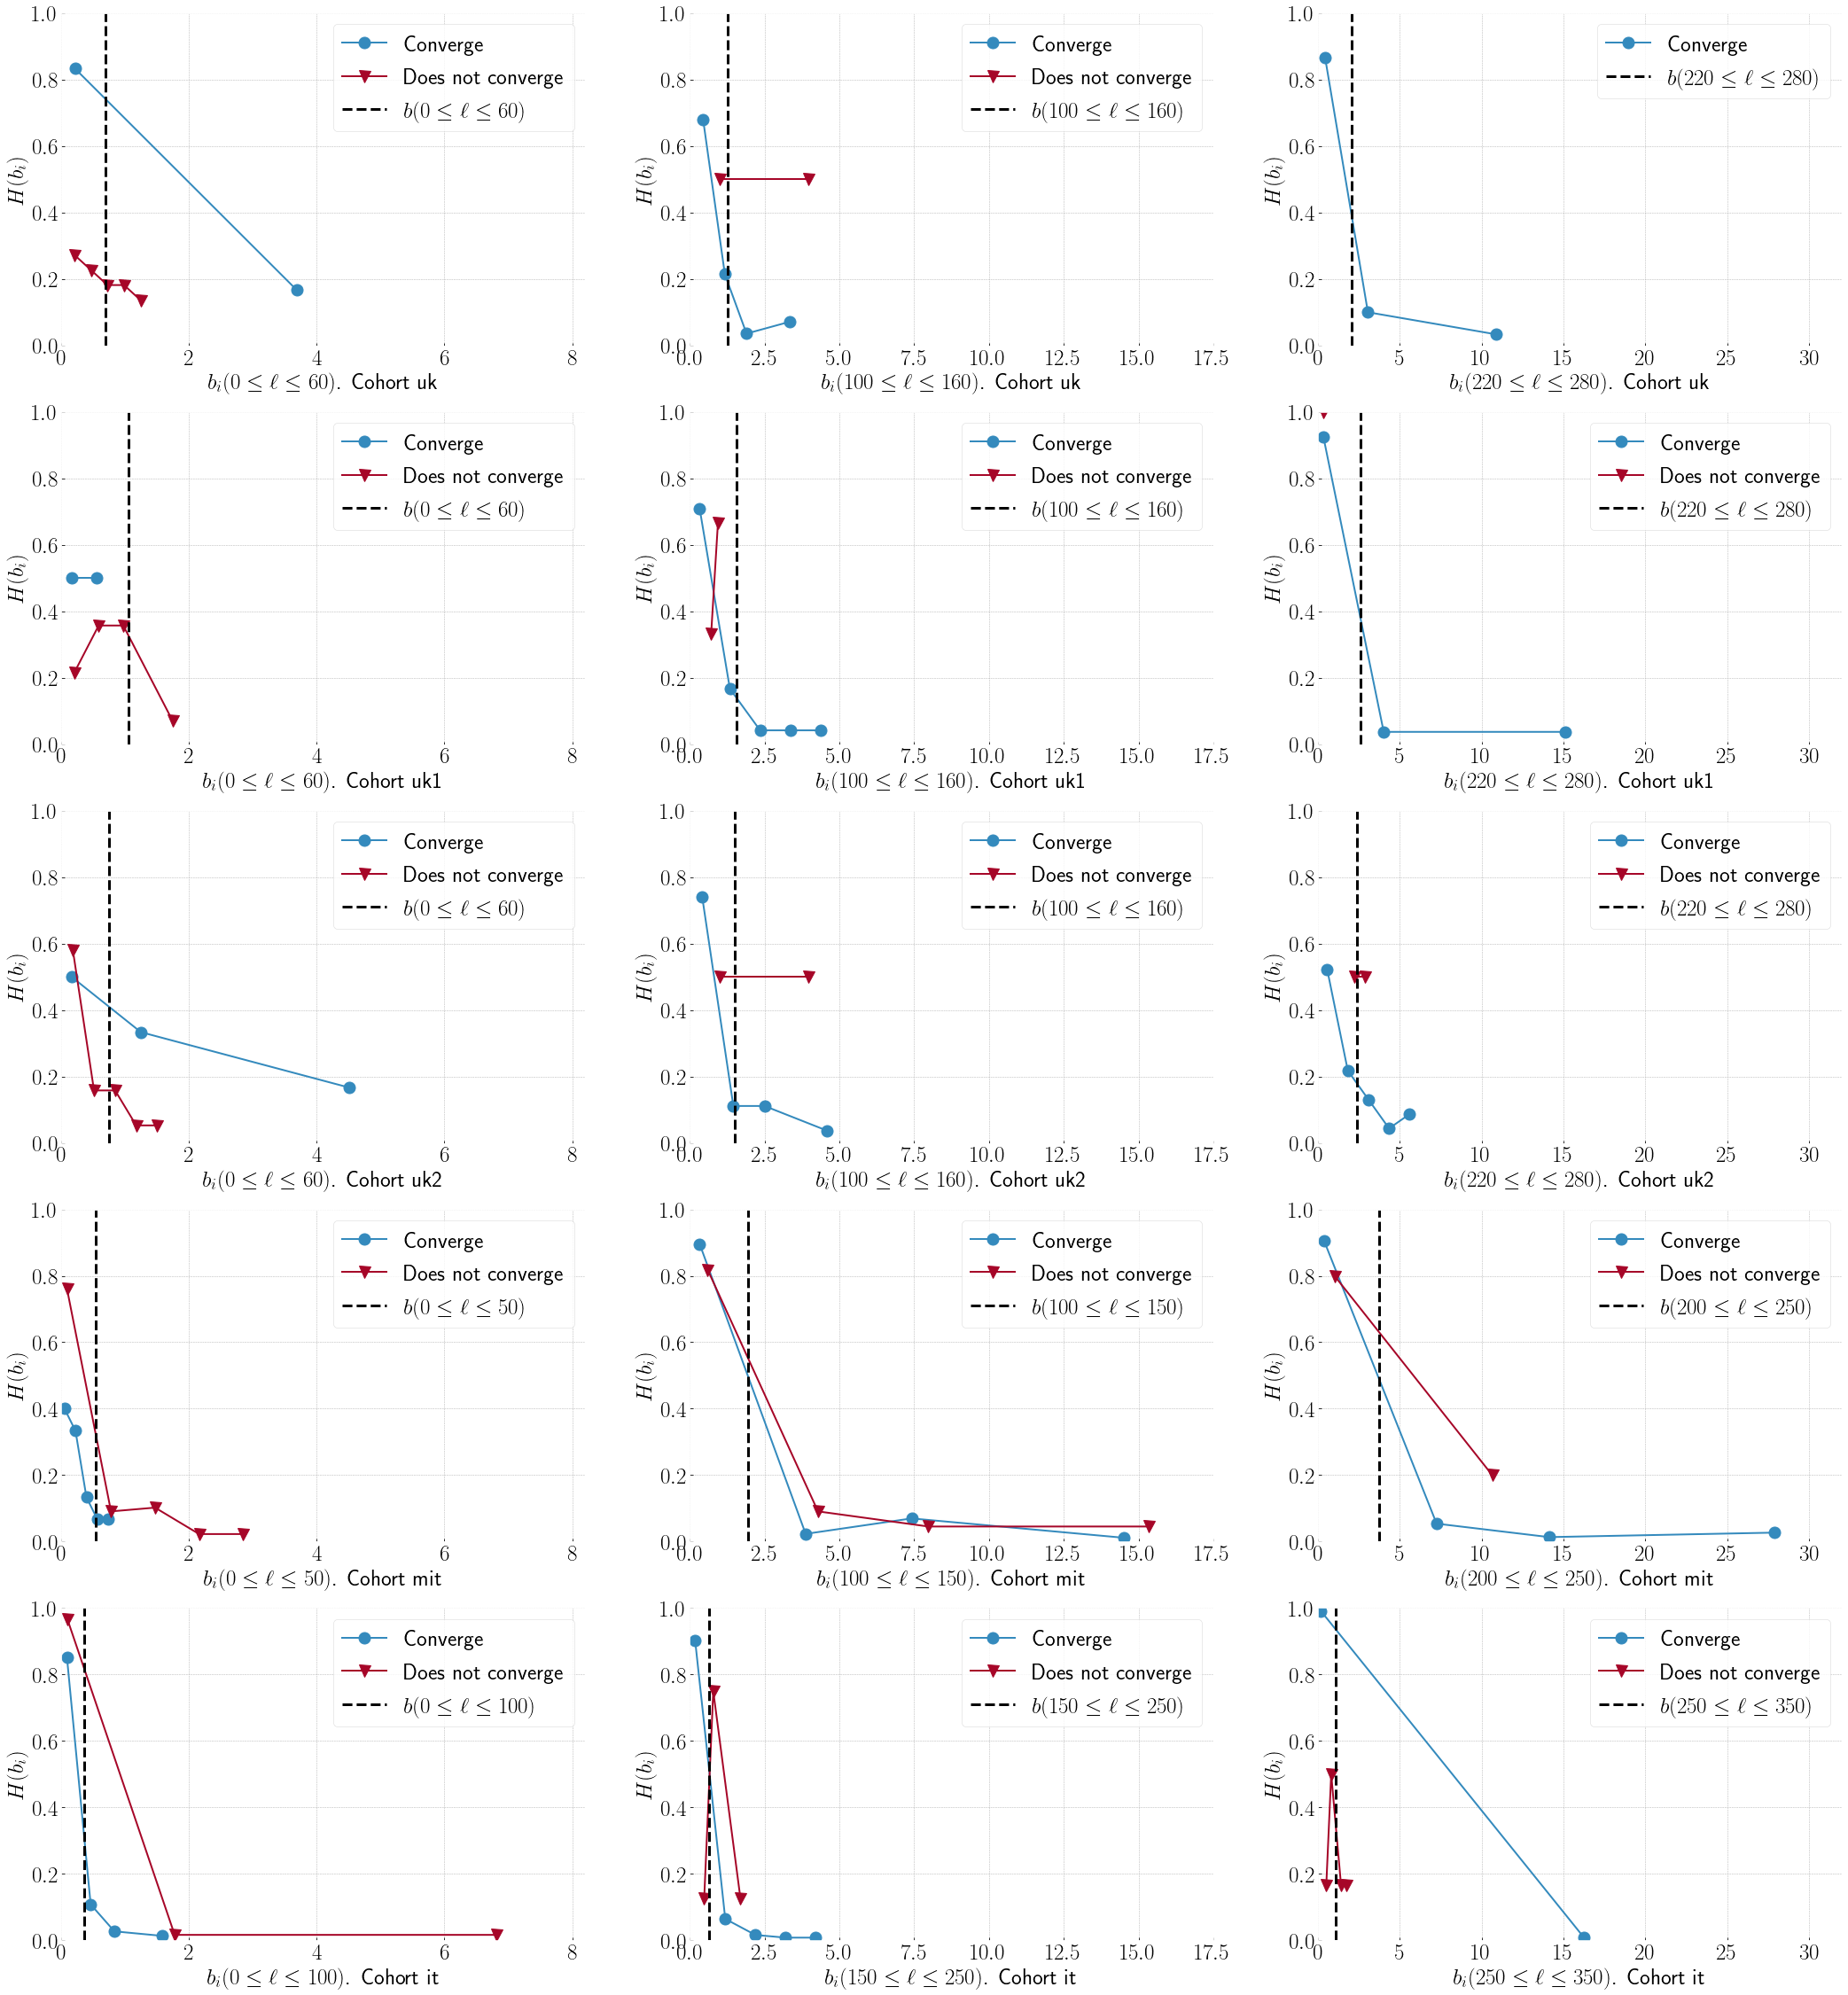

In [71]:
plt.figure(figsize=(12*3, 8*5))
p = 1
for c in fig1.keys():
    for lamb in fig1[c].keys():
        plt.subplot(5, 3, p)
        plt.xlabel(fr'$b_i({limits[c][lamb][0]} \leq \ell \leq {limits[c][lamb][1]})$. Cohort {c}')
        plt.ylabel(r'$H(b_i)$')
        plt.ylim(0, 1)
        if lamb == 0:
            plt.xlim(0, 8.2)
        elif lamb == 1:
            plt.xlim(0, 17.5)
        else:
            plt.xlim(0, 32)
        m = 0
        for t in ['converge', 'notconverge']:
            if len(bhist[c][lamb][t]) > 0:
                H = histogram(bhist[c][lamb][t], 5, log=False)
                plt.plot(H['label'], H['pmf'], marker=markers[m], markersize=13, ls="solid", lw=2, label=f'{["Converge", "Does not converge"][m]}')
                m += 1
            else:
                continue
        plt.axvline(dashed[c][lamb], ls="dashed", lw=3, c="black", label=fr'$b({limits[c][lamb][0]} \leq \ell \leq {limits[c][lamb][1]})$')
        plt.legend()
        p += 1

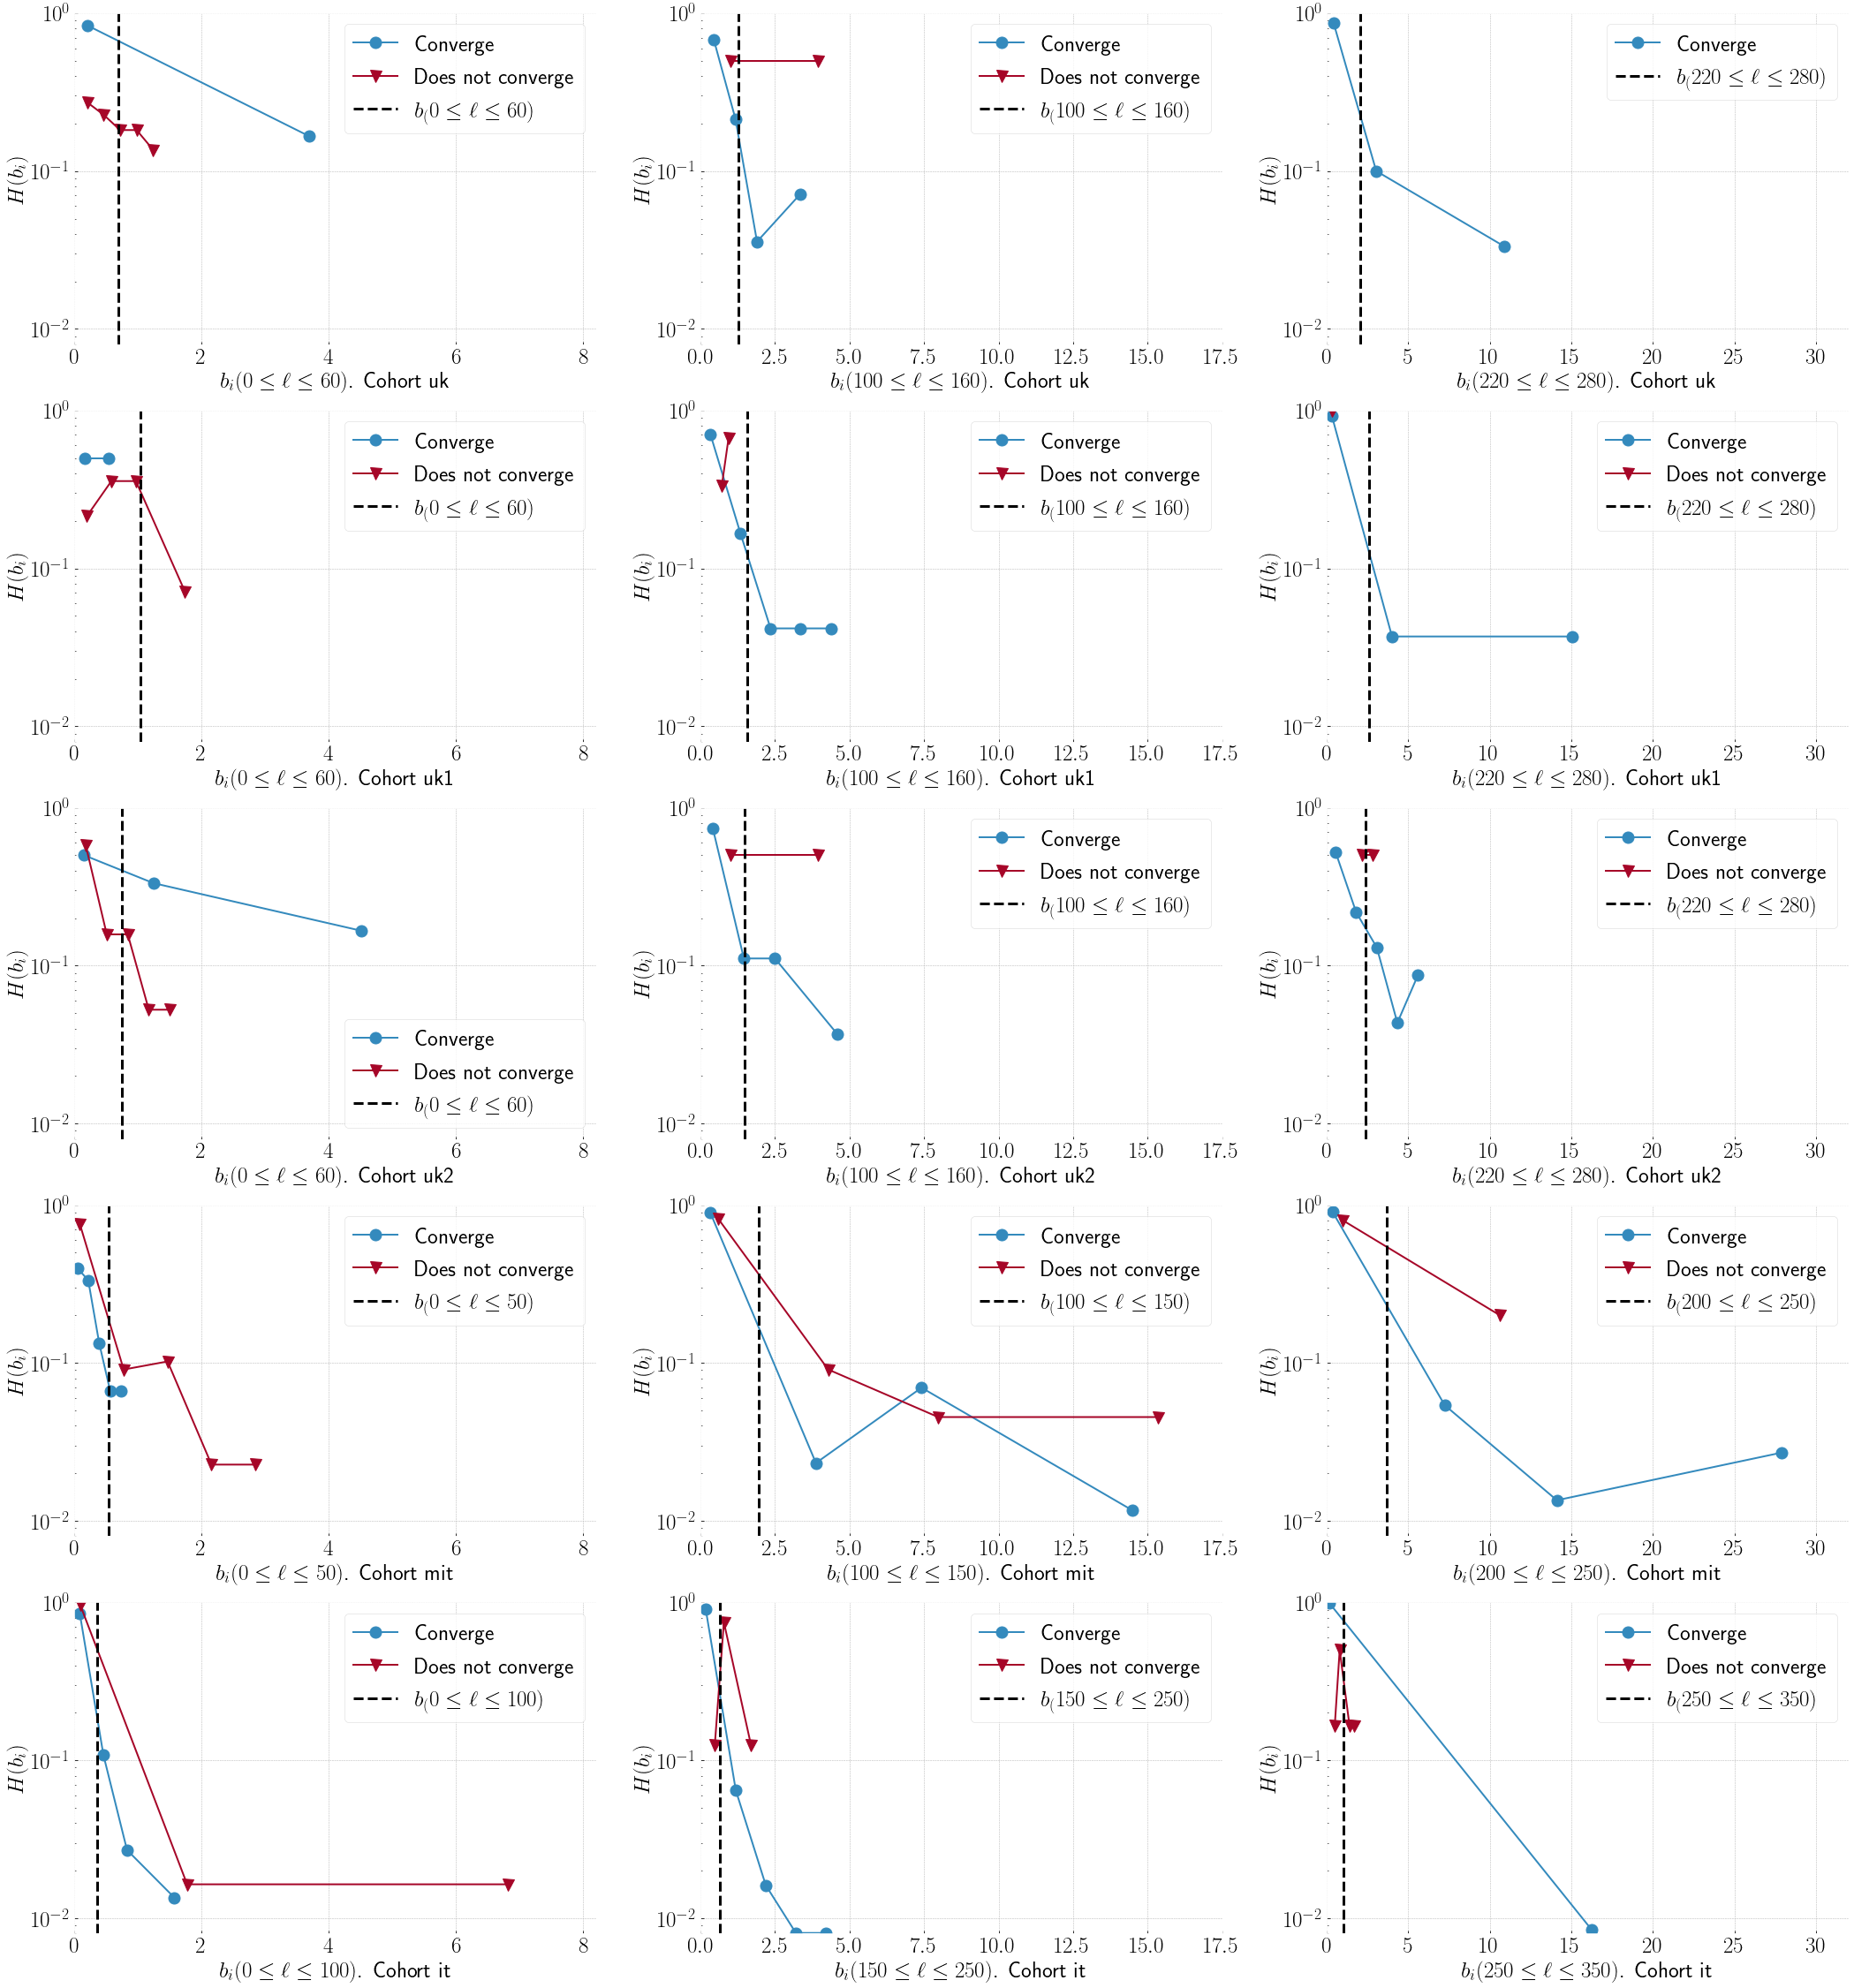

In [72]:
plt.figure(figsize=(12*3, 8*5))
p = 1
for c in fig1.keys():
    for lamb in fig1[c].keys():
        plt.subplot(5, 3, p)
        plt.xlabel(fr'$b_i({limits[c][lamb][0]} \leq \ell \leq {limits[c][lamb][1]})$. Cohort {c}')
        plt.ylabel(r'$H(b_i)$')
        plt.ylim(8*10**(-3), 1)
        if lamb == 0:
            plt.xlim(0, 8.2)
        elif lamb == 1:
            plt.xlim(0, 17.5)
        else:
            plt.xlim(0, 32)
        plt.semilogy()
        m = 0
        for t in ['converge', 'notconverge']:
            if len(bhist[c][lamb][t]) > 0:
                H = histogram(bhist[c][lamb][t], 5, log=False)
                plt.plot(H['label'], H['pmf'], marker=markers[m], markersize=13, ls="solid", lw=2, label=f'{["Converge", "Does not converge"][m]}')
                m += 1
            else:
                continue
        plt.axvline(dashed[c][lamb], ls="dashed", lw=3, c="black", label=fr'$b_({limits[c][lamb][0]} \leq \ell \leq {limits[c][lamb][1]})$')
        plt.legend()
        p += 1

# Global Time

In [73]:
globaltf = dt.datetime.now() - globalt0
print(f'This notebook took {globaltf}')
os.system(f"notify-send 'Notebook done' 'it took {globaltf}'")

This notebook took 0:42:29.416403


0